## **#RYAN SUTEJA _ 23101910084 _ BMB**

In [ ]:
#Import dictionaries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# IBM dataset

In [ ]:
ibm = pd.read_csv('ibm-common-stock-closing-prices.txt',delimiter=',',parse_dates=['Date'])
ibm

Date  IBM common stock closing prices
0                          1962-01-02                           572.00
1                          1962-01-03                           577.00
2                          1962-01-04                           571.25
3                          1962-01-05                           560.00
4                          1962-01-08                           549.50
...                               ...                              ...
1004                       1965-12-28                           502.25
1005                       1965-12-29                           498.00
1006                       1965-12-30                           500.00
1007                       1965-12-31                           499.00
1008  IBM common stock closing prices                              NaN

[1009 rows x 2 columns]

In [ ]:
ibm.drop(ibm.tail(1).index,inplace=True)
ibm

Date  IBM common stock closing prices
0     1962-01-02                           572.00
1     1962-01-03                           577.00
2     1962-01-04                           571.25
3     1962-01-05                           560.00
4     1962-01-08                           549.50
...          ...                              ...
1003  1965-12-27                           500.00
1004  1965-12-28                           502.25
1005  1965-12-29                           498.00
1006  1965-12-30                           500.00
1007  1965-12-31                           499.00

[1008 rows x 2 columns]

In [ ]:
ibm.set_index('Date', inplace=True)
ibm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1962-01-02 to 1965-12-31
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IBM common stock closing prices  1008 non-null   float64
dtypes: float64(1)
memory usage: 15.8+ KB


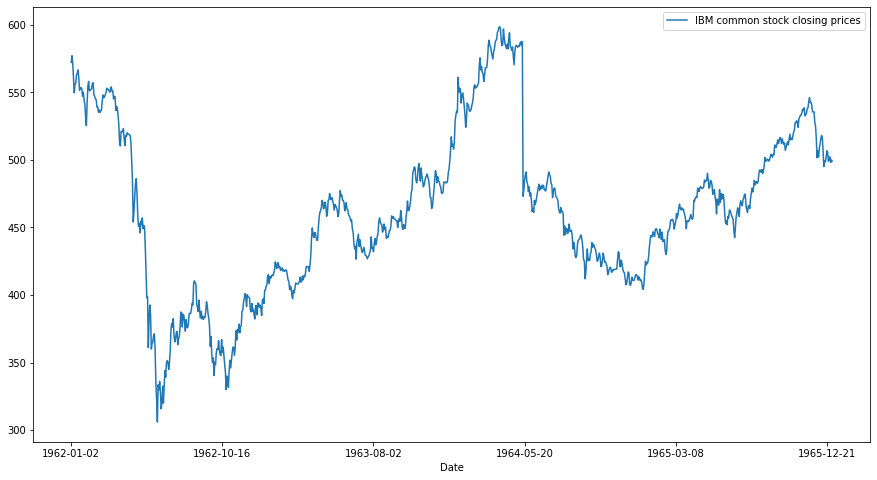

In [ ]:
ibm.plot(figsize=(15,8))
plt.show()

# Holt-winters exponential smoothing with hyper parameter tuning (GRID SEARCH)

In [ ]:
# rmse calculation
from sklearn.metrics import mean_squared_error
def rmse(valid, pred):
    # calculate mse
    rmse=mean_squared_error(valid, pred, squared=False)
    return rmse

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SS

best_rmse = 1e10
best_param = 0

for alpha in np.arange(0.05,1,0.05):
  fit1 = SS(ibm).fit(
      smoothing_level = alpha)
  pred = fit1.forecast(len(ibm))
  pred=np.nan_to_num(pred, nan=0)
  rmse_err = rmse(pred,ibm['IBM common stock closing prices'])
  print('params: ',(alpha),
        ' rmse: %.4f'%rmse_err)
  if rmse_err<best_rmse:
    best_rmse=rmse_err
    best_param=(alpha)
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/

params:  0.05  rmse: 77.7723
params:  0.1  rmse: 74.0599
params:  0.15000000000000002  rmse: 72.2963
params:  0.2  rmse: 71.5497
params:  0.25  rmse: 71.1915
params:  0.3  rmse: 70.9904
params:  0.35000000000000003  rmse: 70.8612
params:  0.4  rmse: 70.7702
params:  0.45  rmse: 70.7024
params:  0.5  rmse: 70.6504
params:  0.55  rmse: 70.6099
params:  0.6000000000000001  rmse: 70.5780
params:  0.6500000000000001  rmse: 70.5524
params:  0.7000000000000001  rmse: 70.5312
params:  0.7500000000000001  rmse: 70.5128
params:  0.8  rmse: 70.4959
params:  0.8500000000000001  rmse: 70.4793
params:  0.9000000000000001  rmse: 70.4617
params:  0.9500000000000001  rmse: 70.4419
Best param:  0.9500000000000001  rmse: 70.4419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

In [ ]:
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

Best param:  0.9500000000000001  rmse: 70.4419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


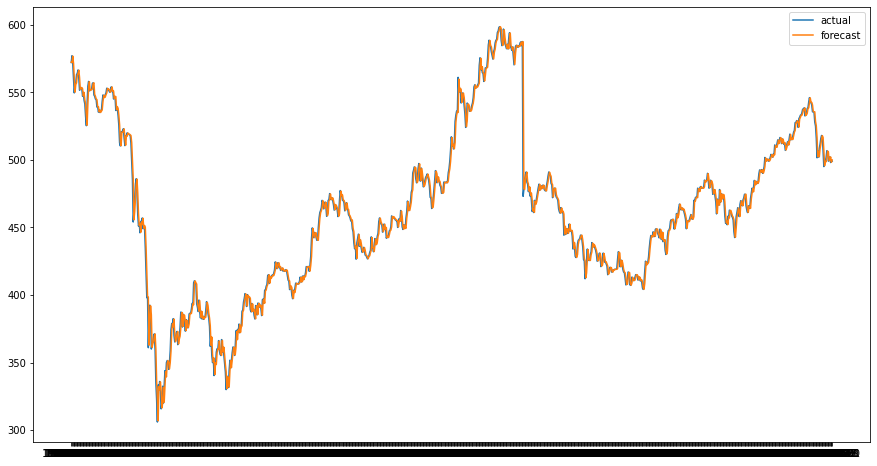

In [ ]:
fit1=SS(ibm['IBM common stock closing prices']).fit(smoothing_level=best_param)
forecast=fit1.fittedvalues

plt.figure(figsize=(15,8))
plt.plot(ibm.index,ibm.values,label='actual')
plt.plot(ibm.index,forecast,label='forecast')
plt.legend(loc='best')
plt.show()

#Holt-winters DOUBLE exponential smoothing with hyper parameter tuning (GRID SEARCH) in IBM dataset

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

best_rmse = 1e10
best_param = 0

for alpha in np.arange(0.05,1,0.05):
  for beta in np.arange(0.05,1,0.05):
    fit1 = ES(ibm).fit(
        smoothing_level = alpha,
        smoothing_slope = beta)
    pred = fit1.forecast(len(ibm))
    pred=np.nan_to_num(pred, nan=0)
    rmse_err = rmse(pred,ibm['IBM common stock closing prices'])
    print('params: ',(alpha, beta),
          ' rmse: %.4f'%rmse_err)
    if rmse_err<best_rmse:
      best_rmse=rmse_err
      best_param=(alpha,beta)
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.05, 0.05)  rmse: 77.7723
params:  (0.05, 0.1)  rmse: 77.7723
params:  (0.05, 0.15000000000000002)  rmse: 77.7723
params:  (0.05, 0.2)  rmse: 77.7723
params:  (0.05, 0.25)  rmse: 77.7723
params:  (0.05, 0.3)  rmse: 77.7723
params:  (0.05, 0.35000000000000003)  rmse: 77.7723
params:  (0.05, 0.4)  rmse: 77.7723
params:  (0.05, 0.45)  rmse: 77.7723
params:  (0.05, 0.5)  rmse: 77.7723
params:  (0.05, 0.55)  rmse: 77.7723
params:  (0.05, 0.6000000000000001)  rmse: 77.7723
params:  (0.05, 0.6500000000000001)  rmse: 77.7723
params:  (0.05, 0.7000000000000001)  rmse: 77.7723
params:  (0.05, 0.7500000000000001)  rmse: 77.7723
params:  (0.05, 0.8)  rmse: 77.7723
params:  (0.05, 0.8500000000000001)  rmse: 77.7723
params:  (0.05, 0.9000000000000001)  rmse: 77.7723


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.05, 0.9500000000000001)  rmse: 77.7723
params:  (0.1, 0.05)  rmse: 74.0599
params:  (0.1, 0.1)  rmse: 74.0599
params:  (0.1, 0.15000000000000002)  rmse: 74.0599
params:  (0.1, 0.2)  rmse: 74.0599
params:  (0.1, 0.25)  rmse: 74.0599
params:  (0.1, 0.3)  rmse: 74.0599
params:  (0.1, 0.35000000000000003)  rmse: 74.0599
params:  (0.1, 0.4)  rmse: 74.0599
params:  (0.1, 0.45)  rmse: 74.0599
params:  (0.1, 0.5)  rmse: 74.0599
params:  (0.1, 0.55)  rmse: 74.0599
params:  (0.1, 0.6000000000000001)  rmse: 74.0599
params:  (0.1, 0.6500000000000001)  rmse: 74.0599
params:  (0.1, 0.7000000000000001)  rmse: 74.0599
params:  (0.1, 0.7500000000000001)  rmse: 74.0599
params:  (0.1, 0.8)  rmse: 74.0599
params:  (0.1, 0.8500000000000001)  rmse: 74.0599
params:  (0.1, 0.9000000000000001)  rmse: 74.0599
params:  (0.1, 0.9500000000000001)  rmse: 74.0599


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.15000000000000002, 0.05)  rmse: 72.2963
params:  (0.15000000000000002, 0.1)  rmse: 72.2963
params:  (0.15000000000000002, 0.15000000000000002)  rmse: 72.2963
params:  (0.15000000000000002, 0.2)  rmse: 72.2963
params:  (0.15000000000000002, 0.25)  rmse: 72.2963
params:  (0.15000000000000002, 0.3)  rmse: 72.2963
params:  (0.15000000000000002, 0.35000000000000003)  rmse: 72.2963
params:  (0.15000000000000002, 0.4)  rmse: 72.2963
params:  (0.15000000000000002, 0.45)  rmse: 72.2963
params:  (0.15000000000000002, 0.5)  rmse: 72.2963
params:  (0.15000000000000002, 0.55)  rmse: 72.2963
params:  (0.15000000000000002, 0.6000000000000001)  rmse: 72.2963
params:  (0.15000000000000002, 0.6500000000000001)  rmse: 72.2963
params:  (0.15000000000000002, 0.7000000000000001)  rmse: 72.2963
params:  (0.15000000000000002, 0.7500000000000001)  rmse: 72.2963
params:  (0.15000000000000002, 0.8)  rmse: 72.2963
params:  (0.15000000000000002, 0.8500000000000001)  rmse: 72.2963
params:  (0.1500000000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.15000000000000002, 0.9500000000000001)  rmse: 72.2963
params:  (0.2, 0.05)  rmse: 71.5497
params:  (0.2, 0.1)  rmse: 71.5497
params:  (0.2, 0.15000000000000002)  rmse: 71.5497
params:  (0.2, 0.2)  rmse: 71.5497
params:  (0.2, 0.25)  rmse: 71.5497
params:  (0.2, 0.3)  rmse: 71.5497
params:  (0.2, 0.35000000000000003)  rmse: 71.5497
params:  (0.2, 0.4)  rmse: 71.5497
params:  (0.2, 0.45)  rmse: 71.5497
params:  (0.2, 0.5)  rmse: 71.5497
params:  (0.2, 0.55)  rmse: 71.5497
params:  (0.2, 0.6000000000000001)  rmse: 71.5497
params:  (0.2, 0.6500000000000001)  rmse: 71.5497
params:  (0.2, 0.7000000000000001)  rmse: 71.5497
params:  (0.2, 0.7500000000000001)  rmse: 71.5497
params:  (0.2, 0.8)  rmse: 71.5497
params:  (0.2, 0.8500000000000001)  rmse: 71.5497
params:  (0.2, 0.9000000000000001)  rmse: 71.5497
params:  (0.2, 0.9500000000000001)  rmse: 71.5497


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.25, 0.05)  rmse: 71.1915
params:  (0.25, 0.1)  rmse: 71.1915
params:  (0.25, 0.15000000000000002)  rmse: 71.1915
params:  (0.25, 0.2)  rmse: 71.1915
params:  (0.25, 0.25)  rmse: 71.1915
params:  (0.25, 0.3)  rmse: 71.1915
params:  (0.25, 0.35000000000000003)  rmse: 71.1915
params:  (0.25, 0.4)  rmse: 71.1915
params:  (0.25, 0.45)  rmse: 71.1915
params:  (0.25, 0.5)  rmse: 71.1915
params:  (0.25, 0.55)  rmse: 71.1915
params:  (0.25, 0.6000000000000001)  rmse: 71.1915
params:  (0.25, 0.6500000000000001)  rmse: 71.1915
params:  (0.25, 0.7000000000000001)  rmse: 71.1915
params:  (0.25, 0.7500000000000001)  rmse: 71.1915
params:  (0.25, 0.8)  rmse: 71.1915
params:  (0.25, 0.8500000000000001)  rmse: 71.1915
params:  (0.25, 0.9000000000000001)  rmse: 71.1915
params:  (0.25, 0.9500000000000001)  rmse: 71.1915


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.3, 0.05)  rmse: 70.9904
params:  (0.3, 0.1)  rmse: 70.9904
params:  (0.3, 0.15000000000000002)  rmse: 70.9904
params:  (0.3, 0.2)  rmse: 70.9904
params:  (0.3, 0.25)  rmse: 70.9904
params:  (0.3, 0.3)  rmse: 70.9904
params:  (0.3, 0.35000000000000003)  rmse: 70.9904
params:  (0.3, 0.4)  rmse: 70.9904
params:  (0.3, 0.45)  rmse: 70.9904
params:  (0.3, 0.5)  rmse: 70.9904
params:  (0.3, 0.55)  rmse: 70.9904
params:  (0.3, 0.6000000000000001)  rmse: 70.9904
params:  (0.3, 0.6500000000000001)  rmse: 70.9904
params:  (0.3, 0.7000000000000001)  rmse: 70.9904
params:  (0.3, 0.7500000000000001)  rmse: 70.9904
params:  (0.3, 0.8)  rmse: 70.9904
params:  (0.3, 0.8500000000000001)  rmse: 70.9904
params:  (0.3, 0.9000000000000001)  rmse: 70.9904
params:  (0.3, 0.9500000000000001)  rmse: 70.9904
params:  (0.35000000000000003, 0.05)  rmse: 70.8612


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.35000000000000003, 0.1)  rmse: 70.8612
params:  (0.35000000000000003, 0.15000000000000002)  rmse: 70.8612
params:  (0.35000000000000003, 0.2)  rmse: 70.8612
params:  (0.35000000000000003, 0.25)  rmse: 70.8612
params:  (0.35000000000000003, 0.3)  rmse: 70.8612
params:  (0.35000000000000003, 0.35000000000000003)  rmse: 70.8612
params:  (0.35000000000000003, 0.4)  rmse: 70.8612
params:  (0.35000000000000003, 0.45)  rmse: 70.8612
params:  (0.35000000000000003, 0.5)  rmse: 70.8612
params:  (0.35000000000000003, 0.55)  rmse: 70.8612
params:  (0.35000000000000003, 0.6000000000000001)  rmse: 70.8612
params:  (0.35000000000000003, 0.6500000000000001)  rmse: 70.8612
params:  (0.35000000000000003, 0.7000000000000001)  rmse: 70.8612
params:  (0.35000000000000003, 0.7500000000000001)  rmse: 70.8612
params:  (0.35000000000000003, 0.8)  rmse: 70.8612
params:  (0.35000000000000003, 0.8500000000000001)  rmse: 70.8612
params:  (0.35000000000000003, 0.9000000000000001)  rmse: 70.8612
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.4, 0.2)  rmse: 70.7702
params:  (0.4, 0.25)  rmse: 70.7702
params:  (0.4, 0.3)  rmse: 70.7702
params:  (0.4, 0.35000000000000003)  rmse: 70.7702
params:  (0.4, 0.4)  rmse: 70.7702
params:  (0.4, 0.45)  rmse: 70.7702
params:  (0.4, 0.5)  rmse: 70.7702
params:  (0.4, 0.55)  rmse: 70.7702
params:  (0.4, 0.6000000000000001)  rmse: 70.7702
params:  (0.4, 0.6500000000000001)  rmse: 70.7702
params:  (0.4, 0.7000000000000001)  rmse: 70.7702
params:  (0.4, 0.7500000000000001)  rmse: 70.7702
params:  (0.4, 0.8)  rmse: 70.7702
params:  (0.4, 0.8500000000000001)  rmse: 70.7702
params:  (0.4, 0.9000000000000001)  rmse: 70.7702
params:  (0.4, 0.9500000000000001)  rmse: 70.7702
params:  (0.45, 0.05)  rmse: 70.7024
params:  (0.45, 0.1)  rmse: 70.7024


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.45, 0.15000000000000002)  rmse: 70.7024
params:  (0.45, 0.2)  rmse: 70.7024
params:  (0.45, 0.25)  rmse: 70.7024
params:  (0.45, 0.3)  rmse: 70.7024
params:  (0.45, 0.35000000000000003)  rmse: 70.7024
params:  (0.45, 0.4)  rmse: 70.7024
params:  (0.45, 0.45)  rmse: 70.7024
params:  (0.45, 0.5)  rmse: 70.7024
params:  (0.45, 0.55)  rmse: 70.7024
params:  (0.45, 0.6000000000000001)  rmse: 70.7024
params:  (0.45, 0.6500000000000001)  rmse: 70.7024
params:  (0.45, 0.7000000000000001)  rmse: 70.7024
params:  (0.45, 0.7500000000000001)  rmse: 70.7024
params:  (0.45, 0.8)  rmse: 70.7024
params:  (0.45, 0.8500000000000001)  rmse: 70.7024
params:  (0.45, 0.9000000000000001)  rmse: 70.7024
params:  (0.45, 0.9500000000000001)  rmse: 70.7024
params:  (0.5, 0.05)  rmse: 70.6504
params:  (0.5, 0.1)  rmse: 70.6504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.5, 0.15000000000000002)  rmse: 70.6504
params:  (0.5, 0.2)  rmse: 70.6504
params:  (0.5, 0.25)  rmse: 70.6504
params:  (0.5, 0.3)  rmse: 70.6504
params:  (0.5, 0.35000000000000003)  rmse: 70.6504
params:  (0.5, 0.4)  rmse: 70.6504
params:  (0.5, 0.45)  rmse: 70.6504
params:  (0.5, 0.5)  rmse: 70.6504
params:  (0.5, 0.55)  rmse: 70.6504
params:  (0.5, 0.6000000000000001)  rmse: 70.6504
params:  (0.5, 0.6500000000000001)  rmse: 70.6504
params:  (0.5, 0.7000000000000001)  rmse: 70.6504
params:  (0.5, 0.7500000000000001)  rmse: 70.6504
params:  (0.5, 0.8)  rmse: 70.6504
params:  (0.5, 0.8500000000000001)  rmse: 70.6504
params:  (0.5, 0.9000000000000001)  rmse: 70.6504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.5, 0.9500000000000001)  rmse: 70.6504
params:  (0.55, 0.05)  rmse: 70.6099
params:  (0.55, 0.1)  rmse: 70.6099
params:  (0.55, 0.15000000000000002)  rmse: 70.6099
params:  (0.55, 0.2)  rmse: 70.6099
params:  (0.55, 0.25)  rmse: 70.6099
params:  (0.55, 0.3)  rmse: 70.6099
params:  (0.55, 0.35000000000000003)  rmse: 70.6099
params:  (0.55, 0.4)  rmse: 70.6099
params:  (0.55, 0.45)  rmse: 70.6099
params:  (0.55, 0.5)  rmse: 70.6099
params:  (0.55, 0.55)  rmse: 70.6099
params:  (0.55, 0.6000000000000001)  rmse: 70.6099
params:  (0.55, 0.6500000000000001)  rmse: 70.6099
params:  (0.55, 0.7000000000000001)  rmse: 70.6099
params:  (0.55, 0.7500000000000001)  rmse: 70.6099
params:  (0.55, 0.8)  rmse: 70.6099
params:  (0.55, 0.8500000000000001)  rmse: 70.6099
params:  (0.55, 0.9000000000000001)  rmse: 70.6099


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.55, 0.9500000000000001)  rmse: 70.6099
params:  (0.6000000000000001, 0.05)  rmse: 70.5780
params:  (0.6000000000000001, 0.1)  rmse: 70.5780
params:  (0.6000000000000001, 0.15000000000000002)  rmse: 70.5780
params:  (0.6000000000000001, 0.2)  rmse: 70.5780
params:  (0.6000000000000001, 0.25)  rmse: 70.5780
params:  (0.6000000000000001, 0.3)  rmse: 70.5780
params:  (0.6000000000000001, 0.35000000000000003)  rmse: 70.5780
params:  (0.6000000000000001, 0.4)  rmse: 70.5780
params:  (0.6000000000000001, 0.45)  rmse: 70.5780
params:  (0.6000000000000001, 0.5)  rmse: 70.5780
params:  (0.6000000000000001, 0.55)  rmse: 70.5780
params:  (0.6000000000000001, 0.6000000000000001)  rmse: 70.5780
params:  (0.6000000000000001, 0.6500000000000001)  rmse: 70.5780
params:  (0.6000000000000001, 0.7000000000000001)  rmse: 70.5780
params:  (0.6000000000000001, 0.7500000000000001)  rmse: 70.5780
params:  (0.6000000000000001, 0.8)  rmse: 70.5780
params:  (0.6000000000000001, 0.8500000000000001)  rm

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.6500000000000001, 0.05)  rmse: 70.5524
params:  (0.6500000000000001, 0.1)  rmse: 70.5524
params:  (0.6500000000000001, 0.15000000000000002)  rmse: 70.5524
params:  (0.6500000000000001, 0.2)  rmse: 70.5524
params:  (0.6500000000000001, 0.25)  rmse: 70.5524
params:  (0.6500000000000001, 0.3)  rmse: 70.5524
params:  (0.6500000000000001, 0.35000000000000003)  rmse: 70.5524
params:  (0.6500000000000001, 0.4)  rmse: 70.5524
params:  (0.6500000000000001, 0.45)  rmse: 70.5524
params:  (0.6500000000000001, 0.5)  rmse: 70.5524
params:  (0.6500000000000001, 0.55)  rmse: 70.5524
params:  (0.6500000000000001, 0.6000000000000001)  rmse: 70.5524
params:  (0.6500000000000001, 0.6500000000000001)  rmse: 70.5524
params:  (0.6500000000000001, 0.7000000000000001)  rmse: 70.5524
params:  (0.6500000000000001, 0.7500000000000001)  rmse: 70.5524
params:  (0.6500000000000001, 0.8)  rmse: 70.5524
params:  (0.6500000000000001, 0.8500000000000001)  rmse: 70.5524
params:  (0.6500000000000001, 0.9000000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.7000000000000001, 0.1)  rmse: 70.5312
params:  (0.7000000000000001, 0.15000000000000002)  rmse: 70.5312
params:  (0.7000000000000001, 0.2)  rmse: 70.5312
params:  (0.7000000000000001, 0.25)  rmse: 70.5312
params:  (0.7000000000000001, 0.3)  rmse: 70.5312
params:  (0.7000000000000001, 0.35000000000000003)  rmse: 70.5312
params:  (0.7000000000000001, 0.4)  rmse: 70.5312
params:  (0.7000000000000001, 0.45)  rmse: 70.5312
params:  (0.7000000000000001, 0.5)  rmse: 70.5312
params:  (0.7000000000000001, 0.55)  rmse: 70.5312
params:  (0.7000000000000001, 0.6000000000000001)  rmse: 70.5312
params:  (0.7000000000000001, 0.6500000000000001)  rmse: 70.5312
params:  (0.7000000000000001, 0.7000000000000001)  rmse: 70.5312
params:  (0.7000000000000001, 0.7500000000000001)  rmse: 70.5312
params:  (0.7000000000000001, 0.8)  rmse: 70.5312
params:  (0.7000000000000001, 0.8500000000000001)  rmse: 70.5312
params:  (0.7000000000000001, 0.9000000000000001)  rmse: 70.5312
params:  (0.7000000000000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.7500000000000001, 0.05)  rmse: 70.5128
params:  (0.7500000000000001, 0.1)  rmse: 70.5128
params:  (0.7500000000000001, 0.15000000000000002)  rmse: 70.5128
params:  (0.7500000000000001, 0.2)  rmse: 70.5128
params:  (0.7500000000000001, 0.25)  rmse: 70.5128
params:  (0.7500000000000001, 0.3)  rmse: 70.5128
params:  (0.7500000000000001, 0.35000000000000003)  rmse: 70.5128
params:  (0.7500000000000001, 0.4)  rmse: 70.5128
params:  (0.7500000000000001, 0.45)  rmse: 70.5128
params:  (0.7500000000000001, 0.5)  rmse: 70.5128
params:  (0.7500000000000001, 0.55)  rmse: 70.5128
params:  (0.7500000000000001, 0.6000000000000001)  rmse: 70.5128
params:  (0.7500000000000001, 0.6500000000000001)  rmse: 70.5128
params:  (0.7500000000000001, 0.7000000000000001)  rmse: 70.5128
params:  (0.7500000000000001, 0.7500000000000001)  rmse: 70.5128
params:  (0.7500000000000001, 0.8)  rmse: 70.5128
params:  (0.7500000000000001, 0.8500000000000001)  rmse: 70.5128


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.7500000000000001, 0.9000000000000001)  rmse: 70.5128
params:  (0.7500000000000001, 0.9500000000000001)  rmse: 70.5128
params:  (0.8, 0.05)  rmse: 70.4959
params:  (0.8, 0.1)  rmse: 70.4959
params:  (0.8, 0.15000000000000002)  rmse: 70.4959
params:  (0.8, 0.2)  rmse: 70.4959
params:  (0.8, 0.25)  rmse: 70.4959
params:  (0.8, 0.3)  rmse: 70.4959
params:  (0.8, 0.35000000000000003)  rmse: 70.4959
params:  (0.8, 0.4)  rmse: 70.4959
params:  (0.8, 0.45)  rmse: 70.4959
params:  (0.8, 0.5)  rmse: 70.4959
params:  (0.8, 0.55)  rmse: 70.4959
params:  (0.8, 0.6000000000000001)  rmse: 70.4959
params:  (0.8, 0.6500000000000001)  rmse: 70.4959
params:  (0.8, 0.7000000000000001)  rmse: 70.4959
params:  (0.8, 0.7500000000000001)  rmse: 70.4959
params:  (0.8, 0.8)  rmse: 70.4959


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.8, 0.8500000000000001)  rmse: 70.4959
params:  (0.8, 0.9000000000000001)  rmse: 70.4959
params:  (0.8, 0.9500000000000001)  rmse: 70.4959
params:  (0.8500000000000001, 0.05)  rmse: 70.4793
params:  (0.8500000000000001, 0.1)  rmse: 70.4793
params:  (0.8500000000000001, 0.15000000000000002)  rmse: 70.4793
params:  (0.8500000000000001, 0.2)  rmse: 70.4793
params:  (0.8500000000000001, 0.25)  rmse: 70.4793
params:  (0.8500000000000001, 0.3)  rmse: 70.4793
params:  (0.8500000000000001, 0.35000000000000003)  rmse: 70.4793
params:  (0.8500000000000001, 0.4)  rmse: 70.4793
params:  (0.8500000000000001, 0.45)  rmse: 70.4793
params:  (0.8500000000000001, 0.5)  rmse: 70.4793
params:  (0.8500000000000001, 0.55)  rmse: 70.4793
params:  (0.8500000000000001, 0.6000000000000001)  rmse: 70.4793
params:  (0.8500000000000001, 0.6500000000000001)  rmse: 70.4793
params:  (0.8500000000000001, 0.7000000000000001)  rmse: 70.4793
params:  (0.8500000000000001, 0.7500000000000001)  rmse: 70.4793


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.8500000000000001, 0.8)  rmse: 70.4793
params:  (0.8500000000000001, 0.8500000000000001)  rmse: 70.4793
params:  (0.8500000000000001, 0.9000000000000001)  rmse: 70.4793
params:  (0.8500000000000001, 0.9500000000000001)  rmse: 70.4793
params:  (0.9000000000000001, 0.05)  rmse: 70.4617
params:  (0.9000000000000001, 0.1)  rmse: 70.4617
params:  (0.9000000000000001, 0.15000000000000002)  rmse: 70.4617
params:  (0.9000000000000001, 0.2)  rmse: 70.4617
params:  (0.9000000000000001, 0.25)  rmse: 70.4617
params:  (0.9000000000000001, 0.3)  rmse: 70.4617
params:  (0.9000000000000001, 0.35000000000000003)  rmse: 70.4617
params:  (0.9000000000000001, 0.4)  rmse: 70.4617
params:  (0.9000000000000001, 0.45)  rmse: 70.4617
params:  (0.9000000000000001, 0.5)  rmse: 70.4617
params:  (0.9000000000000001, 0.55)  rmse: 70.4617
params:  (0.9000000000000001, 0.6000000000000001)  rmse: 70.4617
params:  (0.9000000000000001, 0.6500000000000001)  rmse: 70.4617
params:  (0.9000000000000001, 0.7000000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

params:  (0.9000000000000001, 0.8)  rmse: 70.4617
params:  (0.9000000000000001, 0.8500000000000001)  rmse: 70.4617
params:  (0.9000000000000001, 0.9000000000000001)  rmse: 70.4617
params:  (0.9000000000000001, 0.9500000000000001)  rmse: 70.4617
params:  (0.9500000000000001, 0.05)  rmse: 70.4419
params:  (0.9500000000000001, 0.1)  rmse: 70.4419
params:  (0.9500000000000001, 0.15000000000000002)  rmse: 70.4419
params:  (0.9500000000000001, 0.2)  rmse: 70.4419
params:  (0.9500000000000001, 0.25)  rmse: 70.4419
params:  (0.9500000000000001, 0.3)  rmse: 70.4419
params:  (0.9500000000000001, 0.35000000000000003)  rmse: 70.4419
params:  (0.9500000000000001, 0.4)  rmse: 70.4419
params:  (0.9500000000000001, 0.45)  rmse: 70.4419
params:  (0.9500000000000001, 0.5)  rmse: 70.4419
params:  (0.9500000000000001, 0.55)  rmse: 70.4419
params:  (0.9500000000000001, 0.6000000000000001)  rmse: 70.4419
params:  (0.9500000000000001, 0.6500000000000001)  rmse: 70.4419
params:  (0.9500000000000001, 0.7000000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dis

In [ ]:
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

Best param:  (0.9500000000000001, 0.05)  rmse: 70.4419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


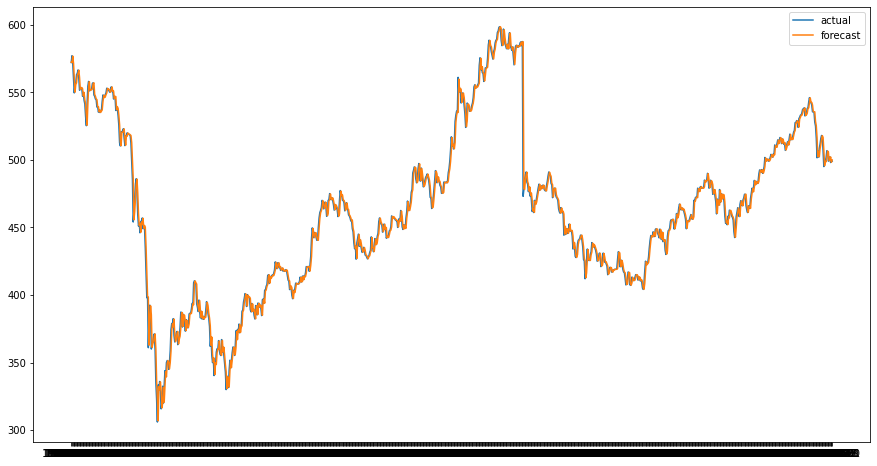

In [ ]:
fit1=ES(ibm).fit(
    smoothing_level=best_param[0],
    smoothing_slope=best_param[1])

forecast=fit1.fittedvalues

plt.figure(figsize=(15,8))
plt.plot(ibm.index,ibm.values,label='actual')
plt.plot(ibm.index,forecast,label='forecast')
plt.legend(loc='best')
plt.show()

#Beer dataset

In [ ]:
beer = pd.read_csv('quarterly-beer-production-in-aus-March 1956-June 1994.txt',delimiter=',')
beer

Quarter  Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0                                               1956Q1                                              284.4                         
1                                               1956Q2                                              212.8                         
2                                               1956Q3                                              226.9                         
3                                               1956Q4                                              308.4                         
4                                               1957Q1                                              262.0                         
..                                                 ...                                                ...                         
150                                             1993Q3                                              411.0                         
151                                             1993Q4                                              512.0                         
152                                             1994Q1                                              449.0                         
153                                             1994Q2                                              382.0                         
154  Quarterly beer production in Australia: megali...                                                NaN                         

[155 rows x 2 columns]

In [ ]:
beer.drop(beer.tail(1).index,inplace=True)
beer

Quarter  Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0    1956Q1                                              284.4                         
1    1956Q2                                              212.8                         
2    1956Q3                                              226.9                         
3    1956Q4                                              308.4                         
4    1957Q1                                              262.0                         
..      ...                                                ...                         
149  1993Q2                                              420.0                         
150  1993Q3                                              411.0                         
151  1993Q4                                              512.0                         
152  1994Q1                                              449.0                         
153  1994Q2                                              382.0                         

[154 rows x 2 columns]

In [ ]:
beer.set_index('Quarter', inplace=True)
beer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 1956Q1 to 1994Q2
Data columns (total 1 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Quarterly beer production in Australia: megalitres. March 1956 ? June 1994  154 non-null    float64
dtypes: float64(1)
memory usage: 2.4+ KB


# Holt-winters DOUBLE exponential smoothing with hyper parameter tuning (GRID SEARCH) in beer dataset

In [ ]:
train_beer = beer.iloc[:-12]
test_beer = beer.iloc[-12:]

In [ ]:
# rmse calculation
from sklearn.metrics import mean_squared_error
def rmse(valid, pred):
    # calculate mse
    rmse=mean_squared_error(valid, pred, squared=False)
    return rmse

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

best_rmse = 1e10
best_param = 0

for alpha in np.arange(0.05,1,0.05):
  for beta in np.arange(0.05,1,0.05):
    fit1 = ES(train_beer,seasonal='mul',trend='mul',damped=True,seasonal_periods=12).fit(
        smoothing_level = alpha,
        smoothing_slope = beta)
    pred = fit1.forecast(len(test_beer))
    pred=np.nan_to_num(pred, nan=0)
    rmse_err = rmse(pred,test_beer['Quarterly beer production in Australia: megalitres. March 1956 ? June 1994'])
    print('params: ',(alpha, beta),
          ' rmse: %.4f'%rmse_err)
    if rmse_err<best_rmse:
      best_rmse=rmse_err
      best_param=(alpha,beta)
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

params:  (0.05, 0.05)  rmse: 40.8997


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,


params:  (0.05, 0.1)  rmse: 40.7400
params:  (0.05, 0.15000000000000002)  rmse: 40.7400
params:  (0.05, 0.2)  rmse: 40.7400
params:  (0.05, 0.25)  rmse: 40.7400
params:  (0.05, 0.3)  rmse: 40.7400
params:  (0.05, 0.35000000000000003)  rmse: 40.7400
params:  (0.05, 0.4)  rmse: 40.7400
params:  (0.05, 0.45)  rmse: 40.7400
params:  (0.05, 0.5)  rmse: 40.7400


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.55)  rmse: 40.7400
params:  (0.05, 0.6000000000000001)  rmse: 40.7400
params:  (0.05, 0.6500000000000001)  rmse: 40.7400
params:  (0.05, 0.7000000000000001)  rmse: 40.7400
params:  (0.05, 0.7500000000000001)  rmse: 40.7400
params:  (0.05, 0.8)  rmse: 40.7400
params:  (0.05, 0.8500000000000001)  rmse: 40.7400
params:  (0.05, 0.9000000000000001)  rmse: 40.7400


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.9500000000000001)  rmse: 40.7400
params:  (0.1, 0.05)  rmse: 36.3529
params:  (0.1, 0.1)  rmse: 39.1137
params:  (0.1, 0.15000000000000002)  rmse: 42.3906


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.1, 0.2)  rmse: 42.3906
params:  (0.1, 0.25)  rmse: 42.3906
params:  (0.1, 0.3)  rmse: 42.3906
params:  (0.1, 0.35000000000000003)  rmse: 42.3906
params:  (0.1, 0.4)  rmse: 42.3906
params:  (0.1, 0.45)  rmse: 42.3906
params:  (0.1, 0.5)  rmse: 42.3906
params:  (0.1, 0.55)  rmse: 42.3906


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.6000000000000001)  rmse: 42.3906
params:  (0.1, 0.6500000000000001)  rmse: 42.3906
params:  (0.1, 0.7000000000000001)  rmse: 42.3906
params:  (0.1, 0.7500000000000001)  rmse: 42.3906
params:  (0.1, 0.8)  rmse: 42.3906
params:  (0.1, 0.8500000000000001)  rmse: 42.3906
params:  (0.1, 0.9000000000000001)  rmse: 42.3906
params:  (0.1, 0.9500000000000001)  rmse: 42.3906


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.05)  rmse: 36.2936
params:  (0.15000000000000002, 0.1)  rmse: 41.0645
params:  (0.15000000000000002, 0.15000000000000002)  rmse: 42.4828


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.15000000000000002, 0.2)  rmse: 42.3248
params:  (0.15000000000000002, 0.25)  rmse: 42.3248
params:  (0.15000000000000002, 0.3)  rmse: 42.3248
params:  (0.15000000000000002, 0.35000000000000003)  rmse: 42.3248
params:  (0.15000000000000002, 0.4)  rmse: 42.3248
params:  (0.15000000000000002, 0.45)  rmse: 42.3248
params:  (0.15000000000000002, 0.5)  rmse: 42.3248
params:  (0.15000000000000002, 0.55)  rmse: 42.3248


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.6000000000000001)  rmse: 42.3248
params:  (0.15000000000000002, 0.6500000000000001)  rmse: 42.3248
params:  (0.15000000000000002, 0.7000000000000001)  rmse: 42.3248
params:  (0.15000000000000002, 0.7500000000000001)  rmse: 42.3248
params:  (0.15000000000000002, 0.8)  rmse: 42.3248
params:  (0.15000000000000002, 0.8500000000000001)  rmse: 42.3248
params:  (0.15000000000000002, 0.9000000000000001)  rmse: 42.3248
params:  (0.15000000000000002, 0.9500000000000001)  rmse: 42.3248


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.2, 0.05)  rmse: 36.8745
params:  (0.2, 0.1)  rmse: 39.1488
params:  (0.2, 0.15000000000000002)  rmse: 37.9945


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.2, 0.2)  rmse: 35.0938
params:  (0.2, 0.25)  rmse: 41.6362
params:  (0.2, 0.3)  rmse: 41.6362
params:  (0.2, 0.35000000000000003)  rmse: 41.6362
params:  (0.2, 0.4)  rmse: 41.6362
params:  (0.2, 0.45)  rmse: 41.6362
params:  (0.2, 0.5)  rmse: 41.6362
params:  (0.2, 0.55)  rmse: 41.6362


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.2, 0.6000000000000001)  rmse: 41.6362
params:  (0.2, 0.6500000000000001)  rmse: 41.6362
params:  (0.2, 0.7000000000000001)  rmse: 41.6362
params:  (0.2, 0.7500000000000001)  rmse: 41.6362
params:  (0.2, 0.8)  rmse: 41.6362
params:  (0.2, 0.8500000000000001)  rmse: 41.6362
params:  (0.2, 0.9000000000000001)  rmse: 41.6362
params:  (0.2, 0.9500000000000001)  rmse: 41.6362


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.25, 0.05)  rmse: 36.0498
params:  (0.25, 0.1)  rmse: 36.6277
params:  (0.25, 0.15000000000000002)  rmse: 34.3858


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,


params:  (0.25, 0.2)  rmse: 31.5764
params:  (0.25, 0.25)  rmse: 29.5546
params:  (0.25, 0.3)  rmse: 40.6094
params:  (0.25, 0.35000000000000003)  rmse: 40.6094
params:  (0.25, 0.4)  rmse: 40.6094
params:  (0.25, 0.45)  rmse: 40.6094
params:  (0.25, 0.5)  rmse: 40.6094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.55)  rmse: 40.6094
params:  (0.25, 0.6000000000000001)  rmse: 40.6094
params:  (0.25, 0.6500000000000001)  rmse: 40.6094
params:  (0.25, 0.7000000000000001)  rmse: 40.6094
params:  (0.25, 0.7500000000000001)  rmse: 40.6094
params:  (0.25, 0.8)  rmse: 40.6094
params:  (0.25, 0.8500000000000001)  rmse: 40.6094
params:  (0.25, 0.9000000000000001)  rmse: 40.6094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.9500000000000001)  rmse: 40.6094
params:  (0.3, 0.05)  rmse: 34.8883
params:  (0.3, 0.1)  rmse: 34.3709


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.15000000000000002)  rmse: 31.7497
params:  (0.3, 0.2)  rmse: 29.2587
params:  (0.3, 0.25)  rmse: 27.7307


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.3)  rmse: 26.9268
params:  (0.3, 0.35000000000000003)  rmse: 39.5151
params:  (0.3, 0.4)  rmse: 39.5151
params:  (0.3, 0.45)  rmse: 39.5151
params:  (0.3, 0.5)  rmse: 39.5151
params:  (0.3, 0.55)  rmse: 39.5151
params:  (0.3, 0.6000000000000001)  rmse: 39.5151
params:  (0.3, 0.6500000000000001)  rmse: 39.5151
params:  (0.3, 0.7000000000000001)  rmse: 39.5151


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.7500000000000001)  rmse: 39.5151
params:  (0.3, 0.8)  rmse: 39.5151
params:  (0.3, 0.8500000000000001)  rmse: 39.5151
params:  (0.3, 0.9000000000000001)  rmse: 39.5151
params:  (0.3, 0.9500000000000001)  rmse: 39.5151
params:  (0.35000000000000003, 0.05)  rmse: 33.7060


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.1)  rmse: 32.4930
params:  (0.35000000000000003, 0.15000000000000002)  rmse: 29.7811
params:  (0.35000000000000003, 0.2)  rmse: 27.6378


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.35000000000000003, 0.25)  rmse: 26.5251
params:  (0.35000000000000003, 0.3)  rmse: 26.0530
params:  (0.35000000000000003, 0.35000000000000003)  rmse: 25.8971
params:  (0.35000000000000003, 0.4)  rmse: 38.5058
params:  (0.35000000000000003, 0.45)  rmse: 38.5058


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.35000000000000003, 0.5)  rmse: 38.5058
params:  (0.35000000000000003, 0.55)  rmse: 38.5058
params:  (0.35000000000000003, 0.6000000000000001)  rmse: 38.5058
params:  (0.35000000000000003, 0.6500000000000001)  rmse: 38.5058
params:  (0.35000000000000003, 0.7000000000000001)  rmse: 38.5058
params:  (0.35000000000000003, 0.7500000000000001)  rmse: 38.5058
params:  (0.35000000000000003, 0.8)  rmse: 38.5058
params:  (0.35000000000000003, 0.8500000000000001)  rmse: 38.5058
params:  (0.35000000000000003, 0.9000000000000001)  rmse: 38.5058
params:  (0.35000000000000003, 0.9500000000000001)  rmse: 38.5058
params:  (0.4, 0.05)  rmse: 32.6077
params:  (0.4, 0.1)  rmse: 30.9409
params:  (0.4, 0.15000000000000002)  rmse: 28.2659


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.4, 0.2)  rmse: 26.4842
params:  (0.4, 0.25)  rmse: 25.7891
params:  (0.4, 0.3)  rmse: 25.7180


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.4, 0.35000000000000003)  rmse: 26.0111
params:  (0.4, 0.4)  rmse: 26.6232
params:  (0.4, 0.45)  rmse: 37.6497
params:  (0.4, 0.5)  rmse: 37.6497
params:  (0.4, 0.55)  rmse: 37.6497
params:  (0.4, 0.6000000000000001)  rmse: 37.6497


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.4, 0.6500000000000001)  rmse: 37.6497
params:  (0.4, 0.7000000000000001)  rmse: 37.6497
params:  (0.4, 0.7500000000000001)  rmse: 37.6497
params:  (0.4, 0.8)  rmse: 37.6497
params:  (0.4, 0.8500000000000001)  rmse: 37.6497
params:  (0.4, 0.9000000000000001)  rmse: 37.6497
params:  (0.4, 0.9500000000000001)  rmse: 37.6497


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.05)  rmse: 31.6227
params:  (0.45, 0.1)  rmse: 31.5266
params:  (0.45, 0.15000000000000002)  rmse: 31.5266
params:  (0.45, 0.2)  rmse: 31.5266
params:  (0.45, 0.25)  rmse: 31.5266


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.3)  rmse: 31.5266
params:  (0.45, 0.35000000000000003)  rmse: 31.5265
params:  (0.45, 0.4)  rmse: 31.5265
params:  (0.45, 0.45)  rmse: 31.5265
params:  (0.45, 0.5)  rmse: 36.9673
params:  (0.45, 0.55)  rmse: 36.9673
params:  (0.45, 0.6000000000000001)  rmse: 36.9673
params:  (0.45, 0.6500000000000001)  rmse: 36.9673
params:  (0.45, 0.7000000000000001)  rmse: 36.9673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.7500000000000001)  rmse: 36.9673
params:  (0.45, 0.8)  rmse: 36.9673
params:  (0.45, 0.8500000000000001)  rmse: 36.9673
params:  (0.45, 0.9000000000000001)  rmse: 36.9673
params:  (0.45, 0.9500000000000001)  rmse: 36.9673
params:  (0.5, 0.05)  rmse: 30.9508
params:  (0.5, 0.1)  rmse: 30.9508


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.15000000000000002)  rmse: 30.9508
params:  (0.5, 0.2)  rmse: 30.9508
params:  (0.5, 0.25)  rmse: 30.9508
params:  (0.5, 0.3)  rmse: 30.9508
params:  (0.5, 0.35000000000000003)  rmse: 30.9508


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.4)  rmse: 30.9508
params:  (0.5, 0.45)  rmse: 30.9508
params:  (0.5, 0.5)  rmse: 30.9508
params:  (0.5, 0.55)  rmse: 36.4563
params:  (0.5, 0.6000000000000001)  rmse: 36.4563
params:  (0.5, 0.6500000000000001)  rmse: 36.4563
params:  (0.5, 0.7000000000000001)  rmse: 36.4563


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.7500000000000001)  rmse: 36.4563
params:  (0.5, 0.8)  rmse: 36.4563
params:  (0.5, 0.8500000000000001)  rmse: 36.4563
params:  (0.5, 0.9000000000000001)  rmse: 36.4563
params:  (0.5, 0.9500000000000001)  rmse: 36.4563
params:  (0.55, 0.05)  rmse: 30.4320


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.1)  rmse: 30.4320
params:  (0.55, 0.15000000000000002)  rmse: 30.4320
params:  (0.55, 0.2)  rmse: 30.4320
params:  (0.55, 0.25)  rmse: 30.4321


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.3)  rmse: 30.4321
params:  (0.55, 0.35000000000000003)  rmse: 30.4320
params:  (0.55, 0.4)  rmse: 30.4320
params:  (0.55, 0.45)  rmse: 30.4321


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.5)  rmse: 30.4322
params:  (0.55, 0.55)  rmse: 30.4319
params:  (0.55, 0.6000000000000001)  rmse: 36.1053
params:  (0.55, 0.6500000000000001)  rmse: 36.1053
params:  (0.55, 0.7000000000000001)  rmse: 36.1053
params:  (0.55, 0.7500000000000001)  rmse: 36.1053
params:  (0.55, 0.8)  rmse: 36.1053


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.8500000000000001)  rmse: 36.1053
params:  (0.55, 0.9000000000000001)  rmse: 36.1053
params:  (0.55, 0.9500000000000001)  rmse: 36.1053
params:  (0.6000000000000001, 0.05)  rmse: 29.9795
params:  (0.6000000000000001, 0.1)  rmse: 29.9796
params:  (0.6000000000000001, 0.15000000000000002)  rmse: 29.9793


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.2)  rmse: 29.9796
params:  (0.6000000000000001, 0.25)  rmse: 29.9795
params:  (0.6000000000000001, 0.3)  rmse: 29.9794
params:  (0.6000000000000001, 0.35000000000000003)  rmse: 29.9795
params:  (0.6000000000000001, 0.4)  rmse: 29.9797


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.45)  rmse: 29.9795
params:  (0.6000000000000001, 0.5)  rmse: 29.9794
params:  (0.6000000000000001, 0.55)  rmse: 29.9795
params:  (0.6000000000000001, 0.6000000000000001)  rmse: 29.9796
params:  (0.6000000000000001, 0.6500000000000001)  rmse: 35.9012


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.7000000000000001)  rmse: 35.9012
params:  (0.6000000000000001, 0.7500000000000001)  rmse: 35.9012
params:  (0.6000000000000001, 0.8)  rmse: 35.9012
params:  (0.6000000000000001, 0.8500000000000001)  rmse: 35.9012
params:  (0.6000000000000001, 0.9000000000000001)  rmse: 35.9012
params:  (0.6000000000000001, 0.9500000000000001)  rmse: 35.9012
params:  (0.6500000000000001, 0.05)  rmse: 29.6025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.1)  rmse: 29.6025
params:  (0.6500000000000001, 0.15000000000000002)  rmse: 29.6025
params:  (0.6500000000000001, 0.2)  rmse: 29.6025
params:  (0.6500000000000001, 0.25)  rmse: 29.6025
params:  (0.6500000000000001, 0.3)  rmse: 29.6025
params:  (0.6500000000000001, 0.35000000000000003)  rmse: 29.6025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.4)  rmse: 29.6025
params:  (0.6500000000000001, 0.45)  rmse: 29.6025
params:  (0.6500000000000001, 0.5)  rmse: 29.6025
params:  (0.6500000000000001, 0.55)  rmse: 29.6025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.6000000000000001)  rmse: 29.6025
params:  (0.6500000000000001, 0.6500000000000001)  rmse: 29.6025
params:  (0.6500000000000001, 0.7000000000000001)  rmse: 35.8332
params:  (0.6500000000000001, 0.7500000000000001)  rmse: 35.8332
params:  (0.6500000000000001, 0.8)  rmse: 35.8332
params:  (0.6500000000000001, 0.8500000000000001)  rmse: 35.8332
params:  (0.6500000000000001, 0.9000000000000001)  rmse: 35.8332


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.9500000000000001)  rmse: 35.8332
params:  (0.7000000000000001, 0.05)  rmse: 29.3117
params:  (0.7000000000000001, 0.1)  rmse: 29.3117
params:  (0.7000000000000001, 0.15000000000000002)  rmse: 29.3117
params:  (0.7000000000000001, 0.2)  rmse: 29.3115


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.25)  rmse: 29.3115
params:  (0.7000000000000001, 0.3)  rmse: 29.3114
params:  (0.7000000000000001, 0.35000000000000003)  rmse: 29.3112
params:  (0.7000000000000001, 0.4)  rmse: 29.3114
params:  (0.7000000000000001, 0.45)  rmse: 29.3113


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.5)  rmse: 29.3113
params:  (0.7000000000000001, 0.55)  rmse: 29.3116
params:  (0.7000000000000001, 0.6000000000000001)  rmse: 29.3116
params:  (0.7000000000000001, 0.6500000000000001)  rmse: 29.3116


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.7000000000000001)  rmse: 29.3120
params:  (0.7000000000000001, 0.7500000000000001)  rmse: 35.8939
params:  (0.7000000000000001, 0.8)  rmse: 35.8939
params:  (0.7000000000000001, 0.8500000000000001)  rmse: 35.8939
params:  (0.7000000000000001, 0.9000000000000001)  rmse: 35.8939
params:  (0.7000000000000001, 0.9500000000000001)  rmse: 35.8939
params:  (0.7500000000000001, 0.05)  rmse: 29.1184


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.1)  rmse: 29.1184
params:  (0.7500000000000001, 0.15000000000000002)  rmse: 29.1183
params:  (0.7500000000000001, 0.2)  rmse: 29.1182
params:  (0.7500000000000001, 0.25)  rmse: 29.1183
params:  (0.7500000000000001, 0.3)  rmse: 29.1185


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.35000000000000003)  rmse: 29.1183
params:  (0.7500000000000001, 0.4)  rmse: 29.1183
params:  (0.7500000000000001, 0.45)  rmse: 29.1184
params:  (0.7500000000000001, 0.5)  rmse: 29.1182
params:  (0.7500000000000001, 0.55)  rmse: 29.1183


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.6000000000000001)  rmse: 29.1183
params:  (0.7500000000000001, 0.6500000000000001)  rmse: 29.1188
params:  (0.7500000000000001, 0.7000000000000001)  rmse: 29.1184
params:  (0.7500000000000001, 0.7500000000000001)  rmse: 29.1181
params:  (0.7500000000000001, 0.8)  rmse: 36.0797
params:  (0.7500000000000001, 0.8500000000000001)  rmse: 36.0797
params:  (0.7500000000000001, 0.9000000000000001)  rmse: 36.0797
params:  (0.7500000000000001, 0.9500000000000001)  rmse: 36.0797
params:  (0.8, 0.05)  rmse: 29.0361
params:  (0.8, 0.1)  rmse: 29.0362
params:  (0.8, 0.15000000000000002)  rmse: 29.0363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.2)  rmse: 29.0362
params:  (0.8, 0.25)  rmse: 29.0357
params:  (0.8, 0.3)  rmse: 29.0364
params:  (0.8, 0.35000000000000003)  rmse: 29.0365
params:  (0.8, 0.4)  rmse: 29.0364


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.45)  rmse: 29.0359
params:  (0.8, 0.5)  rmse: 29.0359
params:  (0.8, 0.55)  rmse: 29.0358
params:  (0.8, 0.6000000000000001)  rmse: 29.0357
params:  (0.8, 0.6500000000000001)  rmse: 29.0355


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.7000000000000001)  rmse: 29.0353
params:  (0.8, 0.7500000000000001)  rmse: 29.0350
params:  (0.8, 0.8)  rmse: 29.0350
params:  (0.8, 0.8500000000000001)  rmse: 36.3907
params:  (0.8, 0.9000000000000001)  rmse: 36.3907
params:  (0.8, 0.9500000000000001)  rmse: 36.3907


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.05)  rmse: 29.0818
params:  (0.8500000000000001, 0.1)  rmse: 29.0818
params:  (0.8500000000000001, 0.15000000000000002)  rmse: 29.0818
params:  (0.8500000000000001, 0.2)  rmse: 29.0818
params:  (0.8500000000000001, 0.25)  rmse: 29.0818
params:  (0.8500000000000001, 0.3)  rmse: 29.0818
params:  (0.8500000000000001, 0.35000000000000003)  rmse: 29.0818
params:  (0.8500000000000001, 0.4)  rmse: 29.0818
params:  (0.8500000000000001, 0.45)  rmse: 29.0818
params:  (0.8500000000000001, 0.5)  rmse: 29.0818
params:  (0.8500000000000001, 0.55)  rmse: 29.0818


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.6000000000000001)  rmse: 29.0818
params:  (0.8500000000000001, 0.6500000000000001)  rmse: 29.0818
params:  (0.8500000000000001, 0.7000000000000001)  rmse: 29.0818
params:  (0.8500000000000001, 0.7500000000000001)  rmse: 29.0818
params:  (0.8500000000000001, 0.8)  rmse: 29.0818
params:  (0.8500000000000001, 0.8500000000000001)  rmse: 29.0818


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.9000000000000001)  rmse: 36.8305
params:  (0.8500000000000001, 0.9500000000000001)  rmse: 36.8305
params:  (0.9000000000000001, 0.05)  rmse: 29.2739
params:  (0.9000000000000001, 0.1)  rmse: 29.2741
params:  (0.9000000000000001, 0.15000000000000002)  rmse: 29.2742
params:  (0.9000000000000001, 0.2)  rmse: 29.2741
params:  (0.9000000000000001, 0.25)  rmse: 29.2739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.3)  rmse: 29.2740
params:  (0.9000000000000001, 0.35000000000000003)  rmse: 29.2741
params:  (0.9000000000000001, 0.4)  rmse: 29.2740
params:  (0.9000000000000001, 0.45)  rmse: 29.2739
params:  (0.9000000000000001, 0.5)  rmse: 29.2739
params:  (0.9000000000000001, 0.55)  rmse: 29.2734


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.6000000000000001)  rmse: 29.2740
params:  (0.9000000000000001, 0.6500000000000001)  rmse: 29.2740
params:  (0.9000000000000001, 0.7000000000000001)  rmse: 29.2741
params:  (0.9000000000000001, 0.7500000000000001)  rmse: 29.2750
params:  (0.9000000000000001, 0.8)  rmse: 29.2742


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.8500000000000001)  rmse: 29.2747
params:  (0.9000000000000001, 0.9000000000000001)  rmse: 29.2741
params:  (0.9000000000000001, 0.9500000000000001)  rmse: 37.4058
params:  (0.9500000000000001, 0.05)  rmse: 29.6384
params:  (0.9500000000000001, 0.1)  rmse: 29.6384
params:  (0.9500000000000001, 0.15000000000000002)  rmse: 29.6384
params:  (0.9500000000000001, 0.2)  rmse: 29.6384


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.25)  rmse: 29.6384
params:  (0.9500000000000001, 0.3)  rmse: 29.6384
params:  (0.9500000000000001, 0.35000000000000003)  rmse: 29.6384
params:  (0.9500000000000001, 0.4)  rmse: 29.6384
params:  (0.9500000000000001, 0.45)  rmse: 29.6384
params:  (0.9500000000000001, 0.5)  rmse: 29.6384
params:  (0.9500000000000001, 0.55)  rmse: 29.6384


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.6000000000000001)  rmse: 29.6384
params:  (0.9500000000000001, 0.6500000000000001)  rmse: 29.6384
params:  (0.9500000000000001, 0.7000000000000001)  rmse: 29.6384
params:  (0.9500000000000001, 0.7500000000000001)  rmse: 29.6384
params:  (0.9500000000000001, 0.8)  rmse: 29.6384
params:  (0.9500000000000001, 0.8500000000000001)  rmse: 29.6384
params:  (0.9500000000000001, 0.9000000000000001)  rmse: 29.6384
params:  (0.9500000000000001, 0.9500000000000001)  rmse: 29.6384
Best param:  (0.4, 0.3)  rmse: 25.7180


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

In [ ]:
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

Best param:  (0.4, 0.3)  rmse: 25.7180


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


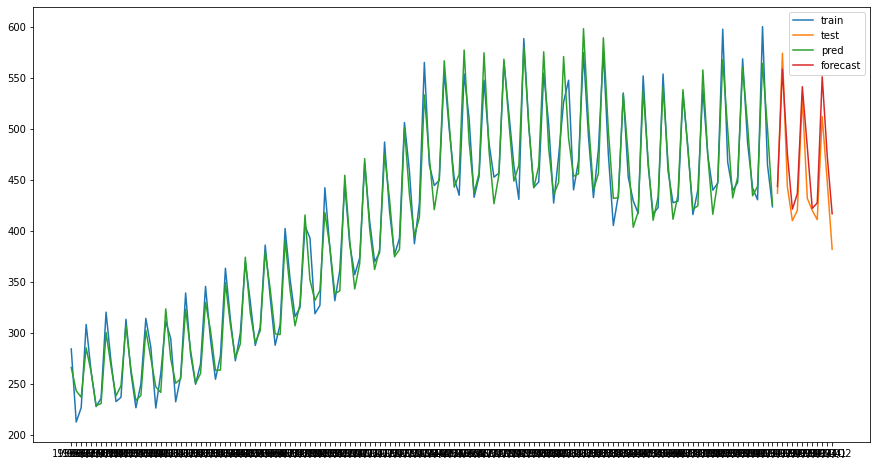

In [ ]:
fit1=ES(train_beer['Quarterly beer production in Australia: megalitres. March 1956 ? June 1994'],seasonal='mul',trend='mul',damped=True,seasonal_periods=12).fit(
    smoothing_level=best_param[0],
    smoothing_slope=best_param[1])
pred=fit1.fittedvalues
forecast=fit1.forecast(len(test_beer))

plt.figure(figsize=(15,8))
plt.plot(train_beer.index,train_beer.values,label='train')
plt.plot(test_beer.index,test_beer.values,label='test')
plt.plot(train_beer.index,pred,label='pred')
plt.plot(test_beer.index,forecast,label='forecast')
plt.legend(loc='best')
plt.show()

# Holt-winters TRIPLE exponential smoothing with hyper parameter tuning (GRID SEARCH) in beer dataset

In [ ]:
train_beer = beer.iloc[:-12]
test_beer = beer.iloc[-12:]

In [ ]:
# rmse calculation
from sklearn.metrics import mean_squared_error
def rmse(valid, pred):
    # calculate mse
    rmse=mean_squared_error(valid, pred, squared=False)
    return rmse

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

best_rmse = 1e10
best_param = 0

for alpha in np.arange(0.05,1,0.05):
  for beta in np.arange(0.05,1,0.05):
    for gamma in np.arange(0.05,1,0.05):
      fit1 = ES(train_beer,seasonal='mul',trend='mul',damped=True,seasonal_periods=12).fit(
          smoothing_level = alpha,
          smoothing_slope = beta,
          smoothing_seasonal = gamma)
      pred = fit1.forecast(len(test_beer))
      pred=np.nan_to_num(pred, nan=0)
      rmse_err = rmse(pred,test_beer['Quarterly beer production in Australia: megalitres. March 1956 ? June 1994'])
      print('params: ',(alpha, beta,gamma),
            ' rmse: %.4f'%rmse_err)
      if rmse_err<best_rmse:
        best_rmse=rmse_err
        best_param=(alpha,beta,gamma)
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.05, 0.05, 0.05)  rmse: 31.5195
params:  (0.05, 0.05, 0.1)  rmse: 31.5044
params:  (0.05, 0.05, 0.15000000000000002)  rmse: 31.5954
params:  (0.05, 0.05, 0.2)  rmse: 31.8045


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.05, 0.05, 0.25)  rmse: 32.1720
params:  (0.05, 0.05, 0.3)  rmse: 32.7056
params:  (0.05, 0.05, 0.35000000000000003)  rmse: 33.3829
params:  (0.05, 0.05, 0.4)  rmse: 34.1748


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.05, 0.05, 0.45)  rmse: 35.0553
params:  (0.05, 0.05, 0.5)  rmse: 36.0030
params:  (0.05, 0.05, 0.55)  rmse: 36.9987
params:  (0.05, 0.05, 0.6000000000000001)  rmse: 38.0253


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.05, 0.05, 0.6500000000000001)  rmse: 39.0660
params:  (0.05, 0.05, 0.7000000000000001)  rmse: 40.1047
params:  (0.05, 0.05, 0.7500000000000001)  rmse: 41.1260
params:  (0.05, 0.05, 0.8)  rmse: 42.1155


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.05, 0.05, 0.8500000000000001)  rmse: 43.0597
params:  (0.05, 0.05, 0.9000000000000001)  rmse: 43.9463
params:  (0.05, 0.05, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.1, 0.05)  rmse: 35.3680
params:  (0.05, 0.1, 0.1)  rmse: 33.3582
params:  (0.05, 0.1, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.1, 0.2)  rmse: 32.5459
params:  (0.05, 0.1, 0.25)  rmse: 32.6198


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.1, 0.3)  rmse: 32.8141
params:  (0.05, 0.1, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.1, 0.4)  rmse: 33.4634
params:  (0.05, 0.1, 0.45)  rmse: 33.9072
params:  (0.05, 0.1, 0.5)  rmse: 34.4261
params:  (0.05, 0.1, 0.55)  rmse: 35.0144
params:  (0.05, 0.1, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.1, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.1, 0.7000000000000001)  rmse: 37.1037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.1, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.1, 0.8)  rmse: 38.6485
params:  (0.05, 0.1, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.1, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.1, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.15000000000000002, 0.05)  rmse: 35.3680
params:  (0.05, 0.15000000000000002, 0.1)  rmse: 33.3582
params:  (0.05, 0.15000000000000002, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.15000000000000002, 0.2)  rmse: 32.5459
params:  (0.05, 0.15000000000000002, 0.25)  rmse: 32.6198
params:  (0.05, 0.15000000000000002, 0.3)  rmse: 32.8141


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.15000000000000002, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.15000000000000002, 0.4)  rmse: 33.4634
params:  (0.05, 0.15000000000000002, 0.45)  rmse: 33.9072
params:  (0.05, 0.15000000000000002, 0.5)  rmse: 34.4261
params:  (0.05, 0.15000000000000002, 0.55)  rmse: 35.0144
params:  (0.05, 0.15000000000000002, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.15000000000000002, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.15000000000000002, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.15000000000000002, 0.7500000000000001)  rmse: 37.8693


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.15000000000000002, 0.8)  rmse: 38.6485
params:  (0.05, 0.15000000000000002, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.15000000000000002, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.15000000000000002, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.2, 0.05)  rmse: 35.3680
params:  (0.05, 0.2, 0.1)  rmse: 33.3582
params:  (0.05, 0.2, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.2, 0.2)  rmse: 32.5459
params:  (0.05, 0.2, 0.25)  rmse: 32.6198
params:  (0.05, 0.2, 0.3)  rmse: 32.8141


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.2, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.2, 0.4)  rmse: 33.4634
params:  (0.05, 0.2, 0.45)  rmse: 33.9072
params:  (0.05, 0.2, 0.5)  rmse: 34.4261
params:  (0.05, 0.2, 0.55)  rmse: 35.0144
params:  (0.05, 0.2, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.2, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.2, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.2, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.2, 0.8)  rmse: 38.6485
params:  (0.05, 0.2, 0.8500000000000001)  rmse: 39.4288


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.2, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.2, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.25, 0.05)  rmse: 35.3680
params:  (0.05, 0.25, 0.1)  rmse: 33.3582
params:  (0.05, 0.25, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.25, 0.2)  rmse: 32.5459
params:  (0.05, 0.25, 0.25)  rmse: 32.6198
params:  (0.05, 0.25, 0.3)  rmse: 32.8141
params:  (0.05, 0.25, 0.35000000000000003)  rmse: 33.0981


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.25, 0.4)  rmse: 33.4634
params:  (0.05, 0.25, 0.45)  rmse: 33.9072
params:  (0.05, 0.25, 0.5)  rmse: 34.4261
params:  (0.05, 0.25, 0.55)  rmse: 35.0144
params:  (0.05, 0.25, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.25, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.25, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.25, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.25, 0.8)  rmse: 38.6485
params:  (0.05, 0.25, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.25, 0.9000000000000001)  rmse: 40.1989


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.25, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.3, 0.05)  rmse: 35.3680
params:  (0.05, 0.3, 0.1)  rmse: 33.3582
params:  (0.05, 0.3, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.3, 0.2)  rmse: 32.5459
params:  (0.05, 0.3, 0.25)  rmse: 32.6198
params:  (0.05, 0.3, 0.3)  rmse: 32.8141
params:  (0.05, 0.3, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.3, 0.4)  rmse: 33.4634
params:  (0.05, 0.3, 0.45)  rmse: 33.9072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.3, 0.5)  rmse: 34.4261
params:  (0.05, 0.3, 0.55)  rmse: 35.0144
params:  (0.05, 0.3, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.3, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.3, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.3, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.3, 0.8)  rmse: 38.6485
params:  (0.05, 0.3, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.3, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.3, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.35000000000000003, 0.05)  rmse: 35.3680
params:  (0.05, 0.35000000000000003, 0.1)  rmse: 33.3582


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.35000000000000003, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.35000000000000003, 0.2)  rmse: 32.5459
params:  (0.05, 0.35000000000000003, 0.25)  rmse: 32.6198
params:  (0.05, 0.35000000000000003, 0.3)  rmse: 32.8141
params:  (0.05, 0.35000000000000003, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.35000000000000003, 0.4)  rmse: 33.4634
params:  (0.05, 0.35000000000000003, 0.45)  rmse: 33.9072
params:  (0.05, 0.35000000000000003, 0.5)  rmse: 34.4261
params:  (0.05, 0.35000000000000003, 0.55)  rmse: 35.0144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.35000000000000003, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.35000000000000003, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.35000000000000003, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.35000000000000003, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.35000000000000003, 0.8)  rmse: 38.6485
params:  (0.05, 0.35000000000000003, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.35000000000000003, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.35000000000000003, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.4, 0.05)  rmse: 35.3680
params:  (0.05, 0.4, 0.1)  rmse: 33.3582
params:  (0.05, 0.4, 0.15000000000000002)  rmse: 32.6925


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.4, 0.2)  rmse: 32.5459
params:  (0.05, 0.4, 0.25)  rmse: 32.6198
params:  (0.05, 0.4, 0.3)  rmse: 32.8141
params:  (0.05, 0.4, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.4, 0.4)  rmse: 33.4634
params:  (0.05, 0.4, 0.45)  rmse: 33.9072
params:  (0.05, 0.4, 0.5)  rmse: 34.4261
params:  (0.05, 0.4, 0.55)  rmse: 35.0144
params:  (0.05, 0.4, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.4, 0.6500000000000001)  rmse: 36.3643


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.4, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.4, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.4, 0.8)  rmse: 38.6485
params:  (0.05, 0.4, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.4, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.4, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.45, 0.05)  rmse: 35.3680
params:  (0.05, 0.45, 0.1)  rmse: 33.3582


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.45, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.45, 0.2)  rmse: 32.5459
params:  (0.05, 0.45, 0.25)  rmse: 32.6198
params:  (0.05, 0.45, 0.3)  rmse: 32.8141
params:  (0.05, 0.45, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.45, 0.4)  rmse: 33.4634
params:  (0.05, 0.45, 0.45)  rmse: 33.9072
params:  (0.05, 0.45, 0.5)  rmse: 34.4261
params:  (0.05, 0.45, 0.55)  rmse: 35.0144
params:  (0.05, 0.45, 0.6000000000000001)  rmse: 35.6639


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.45, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.45, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.45, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.45, 0.8)  rmse: 38.6485
params:  (0.05, 0.45, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.45, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.45, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.5, 0.05)  rmse: 35.3680
params:  (0.05, 0.5, 0.1)  rmse: 33.3582


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.5, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.5, 0.2)  rmse: 32.5459
params:  (0.05, 0.5, 0.25)  rmse: 32.6198
params:  (0.05, 0.5, 0.3)  rmse: 32.8141
params:  (0.05, 0.5, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.5, 0.4)  rmse: 33.4634
params:  (0.05, 0.5, 0.45)  rmse: 33.9072
params:  (0.05, 0.5, 0.5)  rmse: 34.4261
params:  (0.05, 0.5, 0.55)  rmse: 35.0144
params:  (0.05, 0.5, 0.6000000000000001)  rmse: 35.6639


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.5, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.5, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.5, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.5, 0.8)  rmse: 38.6485
params:  (0.05, 0.5, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.5, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.5, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.55, 0.05)  rmse: 35.3680
params:  (0.05, 0.55, 0.1)  rmse: 33.3582
params:  (0.05, 0.55, 0.15000000000000002)  rmse: 32.6925


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.55, 0.2)  rmse: 32.5459
params:  (0.05, 0.55, 0.25)  rmse: 32.6198
params:  (0.05, 0.55, 0.3)  rmse: 32.8141
params:  (0.05, 0.55, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.55, 0.4)  rmse: 33.4634
params:  (0.05, 0.55, 0.45)  rmse: 33.9072
params:  (0.05, 0.55, 0.5)  rmse: 34.4261
params:  (0.05, 0.55, 0.55)  rmse: 35.0144
params:  (0.05, 0.55, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.55, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.55, 0.7000000000000001)  rmse: 37.1037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.55, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.55, 0.8)  rmse: 38.6485
params:  (0.05, 0.55, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.55, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.55, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.6000000000000001, 0.05)  rmse: 35.3680
params:  (0.05, 0.6000000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.6000000000000001, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.6000000000000001, 0.2)  rmse: 32.5459


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.6000000000000001, 0.25)  rmse: 32.6198
params:  (0.05, 0.6000000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.6000000000000001, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.6000000000000001, 0.4)  rmse: 33.4634
params:  (0.05, 0.6000000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.6000000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.6000000000000001, 0.55)  rmse: 35.0144
params:  (0.05, 0.6000000000000001, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.6000000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.6000000000000001, 0.7000000000000001)  rmse: 37.1037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.6000000000000001, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.6000000000000001, 0.8)  rmse: 38.6485
params:  (0.05, 0.6000000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.6000000000000001, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.6000000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.6500000000000001, 0.05)  rmse: 35.3680
params:  (0.05, 0.6500000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.6500000000000001, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.6500000000000001, 0.2)  rmse: 32.5459
params:  (0.05, 0.6500000000000001, 0.25)  rmse: 32.6198


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.6500000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.6500000000000001, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.6500000000000001, 0.4)  rmse: 33.4634
params:  (0.05, 0.6500000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.6500000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.6500000000000001, 0.55)  rmse: 35.0144
params:  (0.05, 0.6500000000000001, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.6500000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.6500000000000001, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.6500000000000001, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.6500000000000001, 0.8)  rmse: 38.6485


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.6500000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.6500000000000001, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.6500000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.7000000000000001, 0.05)  rmse: 35.3680
params:  (0.05, 0.7000000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.7000000000000001, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.7000000000000001, 0.2)  rmse: 32.5459
params:  (0.05, 0.7000000000000001, 0.25)  rmse: 32.6198
params:  (0.05, 0.7000000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.7000000000000001, 0.35000000000000003)  rmse: 33.0981


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.7000000000000001, 0.4)  rmse: 33.4634
params:  (0.05, 0.7000000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.7000000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.7000000000000001, 0.55)  rmse: 35.0144
params:  (0.05, 0.7000000000000001, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.7000000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.7000000000000001, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.7000000000000001, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.7000000000000001, 0.8)  rmse: 38.6485
params:  (0.05, 0.7000000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.7000000000000001, 0.9000000000000001)  rmse: 40.1989


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.7000000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.7500000000000001, 0.05)  rmse: 35.3680
params:  (0.05, 0.7500000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.7500000000000001, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.7500000000000001, 0.2)  rmse: 32.5459
params:  (0.05, 0.7500000000000001, 0.25)  rmse: 32.6198
params:  (0.05, 0.7500000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.7500000000000001, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.7500000000000001, 0.4)  rmse: 33.4634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.7500000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.7500000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.7500000000000001, 0.55)  rmse: 35.0144
params:  (0.05, 0.7500000000000001, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.7500000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.7500000000000001, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.7500000000000001, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.7500000000000001, 0.8)  rmse: 38.6485
params:  (0.05, 0.7500000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.7500000000000001, 0.9000000000000001)  rmse: 40.1989


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.7500000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.8, 0.05)  rmse: 35.3680
params:  (0.05, 0.8, 0.1)  rmse: 33.3582
params:  (0.05, 0.8, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.8, 0.2)  rmse: 32.5459
params:  (0.05, 0.8, 0.25)  rmse: 32.6198
params:  (0.05, 0.8, 0.3)  rmse: 32.8141
params:  (0.05, 0.8, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.8, 0.4)  rmse: 33.4634
params:  (0.05, 0.8, 0.45)  rmse: 33.9072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.8, 0.5)  rmse: 34.4261
params:  (0.05, 0.8, 0.55)  rmse: 35.0144
params:  (0.05, 0.8, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.8, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.8, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.8, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.8, 0.8)  rmse: 38.6485
params:  (0.05, 0.8, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.8, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.8, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.8500000000000001, 0.05)  rmse: 35.3680


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.8500000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.8500000000000001, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.8500000000000001, 0.2)  rmse: 32.5459
params:  (0.05, 0.8500000000000001, 0.25)  rmse: 32.6198
params:  (0.05, 0.8500000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.8500000000000001, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.8500000000000001, 0.4)  rmse: 33.4634
params:  (0.05, 0.8500000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.8500000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.8500000000000001, 0.55)  rmse: 35.0144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.8500000000000001, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.8500000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.8500000000000001, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.8500000000000001, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.8500000000000001, 0.8)  rmse: 38.6485
params:  (0.05, 0.8500000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.8500000000000001, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.8500000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.9000000000000001, 0.05)  rmse: 35.3680


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.9000000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.9000000000000001, 0.15000000000000002)  rmse: 32.6925
params:  (0.05, 0.9000000000000001, 0.2)  rmse: 32.5459
params:  (0.05, 0.9000000000000001, 0.25)  rmse: 32.6198
params:  (0.05, 0.9000000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.9000000000000001, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.9000000000000001, 0.4)  rmse: 33.4634
params:  (0.05, 0.9000000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.9000000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.9000000000000001, 0.55)  rmse: 35.0144
params:  (0.05, 0.9000000000000001, 0.6000000000000001)  rmse: 35.6639


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.9000000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.9000000000000001, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.9000000000000001, 0.7500000000000001)  rmse: 37.8693
params:  (0.05, 0.9000000000000001, 0.8)  rmse: 38.6485
params:  (0.05, 0.9000000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.9000000000000001, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.9000000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.05, 0.9500000000000001, 0.05)  rmse: 35.3680
params:  (0.05, 0.9500000000000001, 0.1)  rmse: 33.3582
params:  (0.05, 0.9500000000000001, 0.15000000000000002)  rmse: 32.6925


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.05, 0.9500000000000001, 0.2)  rmse: 32.5459
params:  (0.05, 0.9500000000000001, 0.25)  rmse: 32.6198
params:  (0.05, 0.9500000000000001, 0.3)  rmse: 32.8141
params:  (0.05, 0.9500000000000001, 0.35000000000000003)  rmse: 33.0981
params:  (0.05, 0.9500000000000001, 0.4)  rmse: 33.4634
params:  (0.05, 0.9500000000000001, 0.45)  rmse: 33.9072
params:  (0.05, 0.9500000000000001, 0.5)  rmse: 34.4261
params:  (0.05, 0.9500000000000001, 0.55)  rmse: 35.0144
params:  (0.05, 0.9500000000000001, 0.6000000000000001)  rmse: 35.6639
params:  (0.05, 0.9500000000000001, 0.6500000000000001)  rmse: 36.3643
params:  (0.05, 0.9500000000000001, 0.7000000000000001)  rmse: 37.1037
params:  (0.05, 0.9500000000000001, 0.7500000000000001)  rmse: 37.8693


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.05, 0.9500000000000001, 0.8)  rmse: 38.6485
params:  (0.05, 0.9500000000000001, 0.8500000000000001)  rmse: 39.4288
params:  (0.05, 0.9500000000000001, 0.9000000000000001)  rmse: 40.1989
params:  (0.05, 0.9500000000000001, 0.9500000000000001)  rmse: 40.9493
params:  (0.1, 0.05, 0.05)  rmse: 33.9408
params:  (0.1, 0.05, 0.1)  rmse: 34.4702
params:  (0.1, 0.05, 0.15000000000000002)  rmse: 34.8870


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.1, 0.05, 0.2)  rmse: 35.2385
params:  (0.1, 0.05, 0.25)  rmse: 35.5896
params:  (0.1, 0.05, 0.3)  rmse: 35.9761
params:  (0.1, 0.05, 0.35000000000000003)  rmse: 36.4072
params:  (0.1, 0.05, 0.4)  rmse: 36.8822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.1, 0.05, 0.45)  rmse: 37.3991
params:  (0.1, 0.05, 0.5)  rmse: 37.9548
params:  (0.1, 0.05, 0.55)  rmse: 38.5453
params:  (0.1, 0.05, 0.6000000000000001)  rmse: 39.1643
params:  (0.1, 0.05, 0.6500000000000001)  rmse: 39.8037


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.1, 0.05, 0.7000000000000001)  rmse: 40.4539
params:  (0.1, 0.05, 0.7500000000000001)  rmse: 41.1040
params:  (0.1, 0.05, 0.8)  rmse: 41.7429
params:  (0.1, 0.05, 0.8500000000000001)  rmse: 42.3609
params:  (0.1, 0.05, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.05, 0.9500000000000001)  rmse: 40.8215


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.1, 0.1, 0.05)  rmse: 39.4373
params:  (0.1, 0.1, 0.1)  rmse: 39.6545
params:  (0.1, 0.1, 0.15000000000000002)  rmse: 39.7594
params:  (0.1, 0.1, 0.2)  rmse: 39.8104
params:  (0.1, 0.1, 0.25)  rmse: 39.8732


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.1, 0.1, 0.3)  rmse: 39.9796
params:  (0.1, 0.1, 0.35000000000000003)  rmse: 40.1354
params:  (0.1, 0.1, 0.4)  rmse: 40.3386
params:  (0.1, 0.1, 0.45)  rmse: 40.5871
params:  (0.1, 0.1, 0.5)  rmse: 40.8784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.1, 0.1, 0.55)  rmse: 41.2082
params:  (0.1, 0.1, 0.6000000000000001)  rmse: 41.5697
params:  (0.1, 0.1, 0.6500000000000001)  rmse: 41.9540
params:  (0.1, 0.1, 0.7000000000000001)  rmse: 42.3505
params:  (0.1, 0.1, 0.7500000000000001)  rmse: 42.7471
params:  (0.1, 0.1, 0.8)  rmse: 43.1327


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.1, 0.1, 0.8500000000000001)  rmse: 43.4966
params:  (0.1, 0.1, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.1, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.15000000000000002, 0.05)  rmse: 36.9855
params:  (0.1, 0.15000000000000002, 0.1)  rmse: 34.8558
params:  (0.1, 0.15000000000000002, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.15000000000000002, 0.2)  rmse: 33.8935
params:  (0.1, 0.15000000000000002, 0.25)  rmse: 33.9231
params:  (0.1, 0.15000000000000002, 0.3)  rmse: 34.0732
params:  (0.1, 0.15000000000000002, 0.35000000000000003)  rmse: 34.3042


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.15000000000000002, 0.4)  rmse: 34.6029
params:  (0.1, 0.15000000000000002, 0.45)  rmse: 34.9651
params:  (0.1, 0.15000000000000002, 0.5)  rmse: 35.3879
params:  (0.1, 0.15000000000000002, 0.55)  rmse: 35.8674
params:  (0.1, 0.15000000000000002, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.15000000000000002, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.15000000000000002, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.15000000000000002, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.15000000000000002, 0.8)  rmse: 38.8671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.15000000000000002, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.15000000000000002, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.15000000000000002, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.2, 0.05)  rmse: 36.9855
params:  (0.1, 0.2, 0.1)  rmse: 34.8558
params:  (0.1, 0.2, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.2, 0.2)  rmse: 33.8935
params:  (0.1, 0.2, 0.25)  rmse: 33.9231
params:  (0.1, 0.2, 0.3)  rmse: 34.0732
params:  (0.1, 0.2, 0.35000000000000003)  rmse: 34.3042
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

 (0.1, 0.2, 0.4)  rmse: 34.6029
params:  (0.1, 0.2, 0.45)  rmse: 34.9651
params:  (0.1, 0.2, 0.5)  rmse: 35.3879
params:  (0.1, 0.2, 0.55)  rmse: 35.8674
params:  (0.1, 0.2, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.2, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.2, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.2, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.2, 0.8)  rmse: 38.8671
params:  (0.1, 0.2, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.2, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.2, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.25, 0.05)  rmse: 36.9855


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.25, 0.1)  rmse: 34.8558
params:  (0.1, 0.25, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.25, 0.2)  rmse: 33.8935
params:  (0.1, 0.25, 0.25)  rmse: 33.9231
params:  (0.1, 0.25, 0.3)  rmse: 34.0732
params:  (0.1, 0.25, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.25, 0.4)  rmse: 34.6029
params:  (0.1, 0.25, 0.45)  rmse: 34.9651
params:  (0.1, 0.25, 0.5)  rmse: 35.3879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.25, 0.55)  rmse: 35.8674
params:  (0.1, 0.25, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.25, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.25, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.25, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.25, 0.8)  rmse: 38.8671
params:  (0.1, 0.25, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.25, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.25, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.3, 0.05)  rmse: 36.9855
params:  (0.1, 0.3, 0.1)  rmse: 34.8558
params:  (0.1, 0.3, 0.15000000000000002)  rmse: 34.0990


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.3, 0.2)  rmse: 33.8935
params:  (0.1, 0.3, 0.25)  rmse: 33.9231
params:  (0.1, 0.3, 0.3)  rmse: 34.0732
params:  (0.1, 0.3, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.3, 0.4)  rmse: 34.6029
params:  (0.1, 0.3, 0.45)  rmse: 34.9651
params:  (0.1, 0.3, 0.5)  rmse: 35.3879
params:  (0.1, 0.3, 0.55)  rmse: 35.8674
params:  (0.1, 0.3, 0.6000000000000001)  rmse: 36.3982


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.3, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.3, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.3, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.3, 0.8)  rmse: 38.8671
params:  (0.1, 0.3, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.3, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.3, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.35000000000000003, 0.05)  rmse: 36.9855
params:  (0.1, 0.35000000000000003, 0.1)  rmse: 34.8558


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.35000000000000003, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.35000000000000003, 0.2)  rmse: 33.8935
params:  (0.1, 0.35000000000000003, 0.25)  rmse: 33.9231
params:  (0.1, 0.35000000000000003, 0.3)  rmse: 34.0732
params:  (0.1, 0.35000000000000003, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.35000000000000003, 0.4)  rmse: 34.6029
params:  (0.1, 0.35000000000000003, 0.45)  rmse: 34.9651
params:  (0.1, 0.35000000000000003, 0.5)  rmse: 35.3879
params:  (0.1, 0.35000000000000003, 0.55)  rmse: 35.8674
params:  (0.1, 0.35000000000000003, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.35000000000000003, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.35000000000000003, 0.7000000000000001)  rmse: 37.5822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.35000000000000003, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.35000000000000003, 0.8)  rmse: 38.8671
params:  (0.1, 0.35000000000000003, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.35000000000000003, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.35000000000000003, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.4, 0.05)  rmse: 36.9855
params:  (0.1, 0.4, 0.1)  rmse: 34.8558
params:  (0.1, 0.4, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.4, 0.2)  rmse: 33.8935
params:  (0.1, 0.4, 0.25)  rmse: 33.9231


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.4, 0.3)  rmse: 34.0732
params:  (0.1, 0.4, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.4, 0.4)  rmse: 34.6029
params:  (0.1, 0.4, 0.45)  rmse: 34.9651
params:  (0.1, 0.4, 0.5)  rmse: 35.3879
params:  (0.1, 0.4, 0.55)  rmse: 35.8674
params:  (0.1, 0.4, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.4, 0.6500000000000001)  rmse: 36.9727


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.4, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.4, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.4, 0.8)  rmse: 38.8671
params:  (0.1, 0.4, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.4, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.4, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.45, 0.05)  rmse: 36.9855
params:  (0.1, 0.45, 0.1)  rmse: 34.8558


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.45, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.45, 0.2)  rmse: 33.8935
params:  (0.1, 0.45, 0.25)  rmse: 33.9231
params:  (0.1, 0.45, 0.3)  rmse: 34.0732
params:  (0.1, 0.45, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.45, 0.4)  rmse: 34.6029
params:  (0.1, 0.45, 0.45)  rmse: 34.9651
params:  (0.1, 0.45, 0.5)  rmse: 35.3879
params:  (0.1, 0.45, 0.55)  rmse: 35.8674
params:  (0.1, 0.45, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.45, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.45, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.45, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.45, 0.8)  rmse: 38.8671
params:  (0.1, 0.45, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.45, 0.9000000000000001)  rmse: 40.1767


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.45, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.5, 0.05)  rmse: 36.9855
params:  (0.1, 0.5, 0.1)  rmse: 34.8558
params:  (0.1, 0.5, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.5, 0.2)  rmse: 33.8935
params:  (0.1, 0.5, 0.25)  rmse: 33.9231
params:  (0.1, 0.5, 0.3)  rmse: 34.0732
params:  (0.1, 0.5, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.5, 0.4)  rmse: 34.6029
params:  (0.1, 0.5, 0.45)  rmse: 34.9651
params:  (0.1, 0.5, 0.5)  rmse: 35.3879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.5, 0.55)  rmse: 35.8674
params:  (0.1, 0.5, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.5, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.5, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.5, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.5, 0.8)  rmse: 38.8671
params:  (0.1, 0.5, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.5, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.5, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.55, 0.05)  rmse: 36.9855
params:  (0.1, 0.55, 0.1)  rmse: 34.8558


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.55, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.55, 0.2)  rmse: 33.8935
params:  (0.1, 0.55, 0.25)  rmse: 33.9231
params:  (0.1, 0.55, 0.3)  rmse: 34.0732
params:  (0.1, 0.55, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.55, 0.4)  rmse: 34.6029
params:  (0.1, 0.55, 0.45)  rmse: 34.9651
params:  (0.1, 0.55, 0.5)  rmse: 35.3879
params:  (0.1, 0.55, 0.55)  rmse: 35.8674
params:  (0.1, 0.55, 0.6000000000000001)  rmse: 36.3982


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.55, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.55, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.55, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.55, 0.8)  rmse: 38.8671
params:  (0.1, 0.55, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.55, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.55, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.6000000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.6000000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.6000000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.6000000000000001, 0.2)  rmse: 33.8935
params:  (0.1, 0.6000000000000001, 0.25)  rmse: 33.9231
params:  (0.1, 0.6000000000000001, 0.3)  rmse: 34.0732
params:  (0.1, 0.6000000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.6000000000000001, 0.4)  rmse: 34.6029
params:  (0.1, 0.6000000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.6000000000000001, 0.5)  rmse: 35.3879
params:  (0.1, 0.6000000000000001, 0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.6000000000000001, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.6000000000000001, 0.8)  rmse: 38.8671
params:  (0.1, 0.6000000000000001, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.6000000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.6000000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.6500000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.6500000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.6500000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.6500000000000001, 0.2)  rmse: 33.8935


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.6500000000000001, 0.25)  rmse: 33.9231
params:  (0.1, 0.6500000000000001, 0.3)  rmse: 34.0732
params:  (0.1, 0.6500000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.6500000000000001, 0.4)  rmse: 34.6029
params:  (0.1, 0.6500000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.6500000000000001, 0.5)  rmse: 35.3879
params:  (0.1, 0.6500000000000001, 0.55)  rmse: 35.8674
params:  (0.1, 0.6500000000000001, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.6500000000000001, 0.6500000000000001)  rmse: 36.9727


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.6500000000000001, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.6500000000000001, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.6500000000000001, 0.8)  rmse: 38.8671
params:  (0.1, 0.6500000000000001, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.6500000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.6500000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.7000000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.7000000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.7000000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.7000000000000001, 0.2)  rmse: 33.8935
params:  (0.1, 0.7000000000000001, 0.25)  rmse: 33.9231
params:  (0.1, 0.7000000000000001, 0.3)  rmse: 34.0732
params:  (0.1, 0.7000000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.7000000000000001, 0.4)  rmse: 34.6029
params:  (0.1, 0.7000000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.7000000000000001, 0.5)  rmse: 35.3879
params:  (

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.7000000000000001, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.7000000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.7000000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.7500000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.7500000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.7500000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.7500000000000001, 0.2)  rmse: 33.8935
params:  (0.1, 0.7500000000000001, 0.25)  rmse: 33.9231
params:  (0.1, 0.7500000000000001, 0.3)  rmse: 34.0732


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.7500000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.7500000000000001, 0.4)  rmse: 34.6029
params:  (0.1, 0.7500000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.7500000000000001, 0.5)  rmse: 35.3879
params:  (0.1, 0.7500000000000001, 0.55)  rmse: 35.8674
params:  (0.1, 0.7500000000000001, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.7500000000000001, 0.6500000000000001)  rmse: 36.9727


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.7500000000000001, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.7500000000000001, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.7500000000000001, 0.8)  rmse: 38.8671
params:  (0.1, 0.7500000000000001, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.7500000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.7500000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.8, 0.05)  rmse: 36.9855
params:  (0.1, 0.8, 0.1)  rmse: 34.8558


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.8, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.8, 0.2)  rmse: 33.8935
params:  (0.1, 0.8, 0.25)  rmse: 33.9231
params:  (0.1, 0.8, 0.3)  rmse: 34.0732
params:  (0.1, 0.8, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.8, 0.4)  rmse: 34.6029
params:  (0.1, 0.8, 0.45)  rmse: 34.9651
params:  (0.1, 0.8, 0.5)  rmse: 35.3879


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.8, 0.55)  rmse: 35.8674
params:  (0.1, 0.8, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.8, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.8, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.8, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.8, 0.8)  rmse: 38.8671
params:  (0.1, 0.8, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.8, 0.9000000000000001)  rmse: 40.1767


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.8, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.8500000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.8500000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.8500000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.8500000000000001, 0.2)  rmse: 33.8935
params:  (0.1, 0.8500000000000001, 0.25)  rmse: 33.9231
params:  (0.1, 0.8500000000000001, 0.3)  rmse: 34.0732
params:  (0.1, 0.8500000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.8500000000000001, 0.4)  rmse: 34.6029


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.8500000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.8500000000000001, 0.5)  rmse: 35.3879
params:  (0.1, 0.8500000000000001, 0.55)  rmse: 35.8674
params:  (0.1, 0.8500000000000001, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.8500000000000001, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.8500000000000001, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.8500000000000001, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.8500000000000001, 0.8)  rmse: 38.8671
params:  (0.1, 0.8500000000000001, 0.8500000000000001)  rmse: 39.5231


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.8500000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.8500000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.9000000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.9000000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.9000000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.9000000000000001, 0.2)  rmse: 33.8935
params:  (0.1, 0.9000000000000001, 0.25)  rmse: 33.9231
params:  (0.1, 0.9000000000000001, 0.3)  rmse: 34.0732
params:  (0.1, 0.9000000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.9000000000000001, 0.4)  rmse: 34.6029


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.1, 0.9000000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.9000000000000001, 0.5)  rmse: 35.3879
params:  (0.1, 0.9000000000000001, 0.55)  rmse: 35.8674
params:  (0.1, 0.9000000000000001, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.9000000000000001, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.9000000000000001, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.9000000000000001, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.9000000000000001, 0.8)  rmse: 38.8671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.9000000000000001, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.9000000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.9000000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.1, 0.9500000000000001, 0.05)  rmse: 36.9855
params:  (0.1, 0.9500000000000001, 0.1)  rmse: 34.8558
params:  (0.1, 0.9500000000000001, 0.15000000000000002)  rmse: 34.0990
params:  (0.1, 0.9500000000000001, 0.2)  rmse: 33.8935
params:  (0.1, 0.9500000000000001, 0.25)  rmse: 33.9231


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.9500000000000001, 0.3)  rmse: 34.0732
params:  (0.1, 0.9500000000000001, 0.35000000000000003)  rmse: 34.3042
params:  (0.1, 0.9500000000000001, 0.4)  rmse: 34.6029
params:  (0.1, 0.9500000000000001, 0.45)  rmse: 34.9651
params:  (0.1, 0.9500000000000001, 0.5)  rmse: 35.3879
params:  (0.1, 0.9500000000000001, 0.55)  rmse: 35.8674
params:  (0.1, 0.9500000000000001, 0.6000000000000001)  rmse: 36.3982
params:  (0.1, 0.9500000000000001, 0.6500000000000001)  rmse: 36.9727
params:  (0.1, 0.9500000000000001, 0.7000000000000001)  rmse: 37.5822
params:  (0.1, 0.9500000000000001, 0.7500000000000001)  rmse: 38.2169
params:  (0.1, 0.9500000000000001, 0.8)  rmse: 38.8671


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.1, 0.9500000000000001, 0.8500000000000001)  rmse: 39.5231
params:  (0.1, 0.9500000000000001, 0.9000000000000001)  rmse: 40.1767
params:  (0.1, 0.9500000000000001, 0.9500000000000001)  rmse: 40.8215
params:  (0.15000000000000002, 0.05, 0.05)  rmse: 36.7001
params:  (0.15000000000000002, 0.05, 0.1)  rmse: 36.7887


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.15000000000000002, 0.05, 0.15000000000000002)  rmse: 36.7696
params:  (0.15000000000000002, 0.05, 0.2)  rmse: 36.6931
params:  (0.15000000000000002, 0.05, 0.25)  rmse: 36.6207
params:  (0.15000000000000002, 0.05, 0.3)  rmse: 36.5880
params:  (0.15000000000000002, 0.05, 0.35000000000000003)  rmse: 36.6107
params:  (0.15000000000000002, 0.05, 0.4)  rmse: 36.6997


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.15000000000000002, 0.05, 0.45)  rmse: 36.8652
params:  (0.15000000000000002, 0.05, 0.5)  rmse: 37.1162
params:  (0.15000000000000002, 0.05, 0.55)  rmse: 37.4585
params:  (0.15000000000000002, 0.05, 0.6000000000000001)  rmse: 37.8940
params:  (0.15000000000000002, 0.05, 0.6500000000000001)  rmse: 38.4210


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.15000000000000002, 0.05, 0.7000000000000001)  rmse: 39.0337
params:  (0.15000000000000002, 0.05, 0.7500000000000001)  rmse: 39.7242
params:  (0.15000000000000002, 0.05, 0.8)  rmse: 40.4818
params:  (0.15000000000000002, 0.05, 0.8500000000000001)  rmse: 38.8065


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.15000000000000002, 0.05, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.05, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.1, 0.05)  rmse: 40.7907
params:  (0.15000000000000002, 0.1, 0.1)  rmse: 40.4279
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


 (0.15000000000000002, 0.1, 0.15000000000000002)  rmse: 39.9710
params:  (0.15000000000000002, 0.1, 0.2)  rmse: 39.4862
params:  (0.15000000000000002, 0.1, 0.25)  rmse: 39.0430
params:  (0.15000000000000002, 0.1, 0.3)  rmse: 38.6762


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.15000000000000002, 0.1, 0.35000000000000003)  rmse: 38.4004
params:  (0.15000000000000002, 0.1, 0.4)  rmse: 38.2270
params:  (0.15000000000000002, 0.1, 0.45)  rmse: 38.1684
params:  (0.15000000000000002, 0.1, 0.5)  rmse: 38.2359


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.15000000000000002, 0.1, 0.55)  rmse: 38.4355
params:  (0.15000000000000002, 0.1, 0.6000000000000001)  rmse: 38.7689
params:  (0.15000000000000002, 0.1, 0.6500000000000001)  rmse: 39.2330
params:  (0.15000000000000002, 0.1, 0.7000000000000001)  rmse: 39.8196
params:  (0.15000000000000002, 0.1, 0.7500000000000001)  rmse: 40.5166


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.15000000000000002, 0.1, 0.8)  rmse: 41.3083
params:  (0.15000000000000002, 0.1, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.1, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.1, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.15000000000000002, 0.05)  rmse: 41.8214
params:  (0.15000000000000002, 0.15000000000000002, 0.1)  rmse: 41.0768
params:  (0.15000000000000002, 0.15000000000000002, 0.15000000000000002)  rmse: 40.2469
params:  (0.15000000000000002, 0.15000000000000002, 0.2)  rmse: 39.4145
params:  (0.15000000000000002, 0.15000000000000002, 0.25)  rmse: 38.6630
params:  (0.15000000000000002, 0.15000000000000002, 0.3)  rmse: 38.0357
params:  (0.15000000000000002, 0.15000000000000002, 0.35000000000000003)  rmse: 37.5522
params:  (0.15000000000000002, 0.15000000000000002, 0.4)  rmse: 37.2272
params:  (0.15000000000000002, 0.15000000000000002, 0.45)  rmse: 37.0748


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.15000000000000002, 0.15000000000000002, 0.5)  rmse: 37.1051
params:  (0.15000000000000002, 0.15000000000000002, 0.55)  rmse: 37.3228
params:  (0.15000000000000002, 0.15000000000000002, 0.6000000000000001)  rmse: 37.7267
params:  (0.15000000000000002, 0.15000000000000002, 0.6500000000000001)  rmse: 38.3101
params:  (0.15000000000000002, 0.15000000000000002, 0.7000000000000001)  rmse: 39.0600
params:  (0.15000000000000002, 0.15000000000000002, 0.7500000000000001)  rmse: 39.9562
params:  (0.15000000000000002, 0.15000000000000002, 0.8)  rmse: 40.9717


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.15000000000000002, 0.15000000000000002, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.15000000000000002, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.15000000000000002, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.2, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.2, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.2, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.2, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.2, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.2, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.2, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.2, 0.4) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 rmse: 34.3822
params:  (0.15000000000000002, 0.2, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.2, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.2, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.2, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.2, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.2, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.2, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.2, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.2, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.2, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.2, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.25, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.25, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.25, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.25, 0.2)  rmse: 34.2744
params:  (0.15000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.25, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.25, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.25, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.25, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.25, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.25, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.25, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.25, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.3, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.3, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.3, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.3, 0.2)  rmse: 34.2744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.3, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.3, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.3, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.3, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.3, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.3, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.3, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.3, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.3, 0.6500000000000001)  rmse: 36.1238


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.3, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.3, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.3, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.3, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.3, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.3, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.35000000000000003, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.35000000000000003, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.35000000000000003, 0.15000000000000002)  rmse: 34.5340


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.35000000000000003, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.35000000000000003, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.35000000000000003, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.35000000000000003, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.35000000000000003, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.35000000000000003, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.35000000000000003, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.35000000000000003, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.35000000000000003, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.35000000000000003, 0.6500000000000001)  rmse: 36.1238


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.35000000000000003, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.35000000000000003, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.35000000000000003, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.35000000000000003, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.35000000000000003, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.35000000000000003, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.4, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.4, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.4, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.4, 0.2)  rmse: 34.2744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.4, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.4, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.4, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.4, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.4, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.4, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.4, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.4, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.4, 0.6500000000000001)  rmse: 36.1238


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.4, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.4, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.4, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.4, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.4, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.4, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.45, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.45, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.45, 0.15000000000000002)  rmse: 34.5340


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.45, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.45, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.45, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.45, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.45, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.45, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.45, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.45, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.45, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.45, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.45, 0.7000000000000001)  rmse: 36.7012


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.45, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.45, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.45, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.45, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.45, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.5, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.5, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.5, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.5, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.5, 0.25)  rmse: 34.1915


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.5, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.5, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.5, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.5, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.5, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.5, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.5, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.5, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.5, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.5, 0.7500000000000001)  rmse: 37.3457


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.5, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.5, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.5, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.5, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.55, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.55, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.55, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.55, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.55, 0.25)  rmse: 34.1915


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.55, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.55, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.55, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.55, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.55, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.55, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.55, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.55, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.55, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.55, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.55, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.55, 0.8500000000000001)  rmse: 38.8065


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.55, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.55, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.6000000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.6000000000000001, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.6000000000000001, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.6000000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.6000000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.6000000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.6000000000000001, 0.35000000000000003)  rmse: 34.2565


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.6000000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.6000000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.6000000000000001, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.6000000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.6000000000000001, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.6000000000000001, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.6000000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.6000000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.6000000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.6000000000000001, 0.8500000000000001)  rmse: 38.8065


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.6000000000000001, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.6000000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.6500000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.6500000000000001, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.6500000000000001, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.6500000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.6500000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.6500000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.6500000000000001, 0.35000000000000003)  rmse: 34.2565


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.6500000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.6500000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.6500000000000001, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.6500000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.6500000000000001, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.6500000000000001, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.6500000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.6500000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.6500000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.6500000000000001, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.6500000000000001, 0.9000000000000001)  rmse: 39.6074


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.6500000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.7000000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.7000000000000001, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.7000000000000001, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.7000000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.7000000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.7000000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.7000000000000001, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.7000000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.7000000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.7000000000000001, 0.5)  rmse: 34.8455


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.7000000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.7000000000000001, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.7000000000000001, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.7000000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.7000000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.7000000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.7000000000000001, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.7000000000000001, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.7000000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.7500000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.7500000000000001, 0.1)  rmse: 35.2573


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.7500000000000001, 0.15000000000000002)  rmse: 34.5340
params:  (0.15000000000000002, 0.7500000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.7500000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.7500000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.7500000000000001, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.7500000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.7500000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.7500000000000001, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.7500000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.7500000000000001, 0.6000000000000001)  rmse: 35.6196


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.7500000000000001, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.7500000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.7500000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.7500000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.7500000000000001, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.7500000000000001, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.7500000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.8, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.8, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.8, 0.15000000000000002)  rmse: 34.5340


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.8, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.8, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.8, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.8, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.8, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.8, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.8, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.8, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.8, 0.6000000000000001)  rmse: 35.6196
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.15000000000000002, 0.8, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.8, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.8, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.8, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.8, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.8, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.8, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.8500000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.8500000000000001, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.8500000000000001, 0.15000000000000002)  rmse: 34.5340


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.8500000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.8500000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.8500000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.8500000000000001, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.8500000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.8500000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.8500000000000001, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.8500000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.8500000000000001, 0.6000000000000001)  rmse: 35.6196


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.8500000000000001, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.8500000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.8500000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.8500000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.8500000000000001, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.8500000000000001, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.8500000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.9000000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.9000000000000001, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.9000000000000001, 0.15000000000000002)  rmse: 34.5340


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.9000000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.9000000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.9000000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.9000000000000001, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.9000000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.9000000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.9000000000000001, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.9000000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.9000000000000001, 0.6000000000000001)  rmse: 35.6196
params:  (0.15000000000000002, 0.9000000000000001, 0.6500000000000001)  rmse: 36.1238


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.15000000000000002, 0.9000000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.9000000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.9000000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.9000000000000001, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.9000000000000001, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.9000000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.15000000000000002, 0.9500000000000001, 0.05)  rmse: 37.2310
params:  (0.15000000000000002, 0.9500000000000001, 0.1)  rmse: 35.2573
params:  (0.15000000000000002, 0.9500000000000001, 0.15000000000000002)  rmse: 34.5340
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.15000000000000002, 0.9500000000000001, 0.2)  rmse: 34.2744
params:  (0.15000000000000002, 0.9500000000000001, 0.25)  rmse: 34.1915
params:  (0.15000000000000002, 0.9500000000000001, 0.3)  rmse: 34.1931
params:  (0.15000000000000002, 0.9500000000000001, 0.35000000000000003)  rmse: 34.2565
params:  (0.15000000000000002, 0.9500000000000001, 0.4)  rmse: 34.3822
params:  (0.15000000000000002, 0.9500000000000001, 0.45)  rmse: 34.5765
params:  (0.15000000000000002, 0.9500000000000001, 0.5)  rmse: 34.8455
params:  (0.15000000000000002, 0.9500000000000001, 0.55)  rmse: 35.1929
params:  (0.15000000000000002, 0.9500000000000001, 0.6000000000000001)  rmse: 35.6196


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.15000000000000002, 0.9500000000000001, 0.6500000000000001)  rmse: 36.1238
params:  (0.15000000000000002, 0.9500000000000001, 0.7000000000000001)  rmse: 36.7012
params:  (0.15000000000000002, 0.9500000000000001, 0.7500000000000001)  rmse: 37.3457
params:  (0.15000000000000002, 0.9500000000000001, 0.8)  rmse: 38.0500
params:  (0.15000000000000002, 0.9500000000000001, 0.8500000000000001)  rmse: 38.8065
params:  (0.15000000000000002, 0.9500000000000001, 0.9000000000000001)  rmse: 39.6074
params:  (0.15000000000000002, 0.9500000000000001, 0.9500000000000001)  rmse: 40.4462
params:  (0.2, 0.05, 0.05)  rmse: 36.7545
params:  (0.2, 0.05, 0.1)  rmse: 36.5687
params:  (0.2, 0.05, 0.15000000000000002)  rmse: 36.2877
params:  (0.2, 0.05, 0.2)  rmse: 35.9519
params:  (0.2, 0.05, 0.25)  rmse: 35.6121
params:  (0.2, 0.05, 0.3)  rmse: 35.2983
params:  (0.2, 0.05, 0.35000000000000003)  rmse: 35.0310


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.05, 0.4)  rmse: 34.8332
params:  (0.2, 0.05, 0.45)  rmse: 34.7308
params:  (0.2, 0.05, 0.5)  rmse: 34.7484
params:  (0.2, 0.05, 0.55)  rmse: 34.9062
params:  (0.2, 0.05, 0.6000000000000001)  rmse: 35.2188
params:  (0.2, 0.05, 0.6500000000000001)  rmse: 35.6966
params:  (0.2, 0.05, 0.7000000000000001)  rmse: 36.3462


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.05, 0.7500000000000001)  rmse: 37.1719
params:  (0.2, 0.05, 0.8)  rmse: 38.1741
params:  (0.2, 0.05, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.05, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.05, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.1, 0.05)  rmse: 38.6290
params:  (0.2, 0.1, 0.1)  rmse: 38.0628
params:  (0.2, 0.1, 0.15000000000000002)  rmse: 37.4095


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.2, 0.1, 0.2)  rmse: 36.7138
params:  (0.2, 0.1, 0.25)  rmse: 36.0306
params:  (0.2, 0.1, 0.3)  rmse: 35.3951
params:  (0.2, 0.1, 0.35000000000000003)  rmse: 34.8377
params:  (0.2, 0.1, 0.4)  rmse: 34.3947
params:  (0.2, 0.1, 0.45)  rmse: 34.1042


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.1, 0.5)  rmse: 33.9993
params:  (0.2, 0.1, 0.55)  rmse: 34.1042
params:  (0.2, 0.1, 0.6000000000000001)  rmse: 34.4359
params:  (0.2, 0.1, 0.6500000000000001)  rmse: 35.0080
params:  (0.2, 0.1, 0.7000000000000001)  rmse: 35.8330
params:  (0.2, 0.1, 0.7500000000000001)  rmse: 36.9195


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.1, 0.8)  rmse: 38.2682
params:  (0.2, 0.1, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.1, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.1, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.15000000000000002, 0.05)  rmse: 37.2719
params:  (0.2, 0.15000000000000002, 0.1)  rmse: 36.5441
params:  (0.2, 0.15000000000000002, 0.15000000000000002)  rmse: 35.7265


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.15000000000000002, 0.2)  rmse: 34.8454
params:  (0.2, 0.15000000000000002, 0.25)  rmse: 33.9542
params:  (0.2, 0.15000000000000002, 0.3)  rmse: 33.1054
params:  (0.2, 0.15000000000000002, 0.35000000000000003)  rmse: 32.3577
params:  (0.2, 0.15000000000000002, 0.4)  rmse: 31.7731


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.15000000000000002, 0.45)  rmse: 31.4045
params:  (0.2, 0.15000000000000002, 0.5)  rmse: 31.2867
params:  (0.2, 0.15000000000000002, 0.55)  rmse: 31.4368
params:  (0.2, 0.15000000000000002, 0.6000000000000001)  rmse: 31.8613
params:  (0.2, 0.15000000000000002, 0.6500000000000001)  rmse: 32.5630
params:  (0.2, 0.15000000000000002, 0.7000000000000001)  rmse: 33.5383
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

 (0.2, 0.15000000000000002, 0.7500000000000001)  rmse: 34.7493
params:  (0.2, 0.15000000000000002, 0.8)  rmse: 35.9851
params:  (0.2, 0.15000000000000002, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.15000000000000002, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.15000000000000002, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.2, 0.05)  rmse: 34.4435
params:  (0.2, 0.2, 0.1)  rmse: 33.8595


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.2, 0.15000000000000002)  rmse: 33.1664
params:  (0.2, 0.2, 0.2)  rmse: 32.3387
params:  (0.2, 0.2, 0.25)  rmse: 31.4200
params:  (0.2, 0.2, 0.3)  rmse: 30.4939
params:  (0.2, 0.2, 0.35000000000000003)  rmse: 29.6674
params:  (0.2, 0.2, 0.4)  rmse: 29.0433
params:  (0.2, 0.2, 0.45)  rmse: 28.6950


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.2, 0.5)  rmse: 28.6557
params:  (0.2, 0.2, 0.55)  rmse: 28.9241
params:  (0.2, 0.2, 0.6000000000000001)  rmse: 29.4848
params:  (0.2, 0.2, 0.6500000000000001)  rmse: 30.3245
params:  (0.2, 0.2, 0.7000000000000001)  rmse: 31.3946
params:  (0.2, 0.2, 0.7500000000000001)  rmse: 32.6133


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.2, 0.2, 0.8)  rmse: 33.9521
params:  (0.2, 0.2, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.2, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.2, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.25, 0.05)  rmse: 36.7453
params:  (0.2, 0.25, 0.1)  rmse: 34.9007
params:  (0.2, 0.25, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.25, 0.2)  rmse: 33.9084
params:  (0.2, 0.25, 0.25)  rmse: 33.7181
params:  (0.2, 0.25, 0.3)  rmse: 33.5701
params:  (0.2, 0.25, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.25, 0.4)  rmse: 33.3998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.25, 0.45)  rmse: 33.4106
params:  (0.2, 0.25, 0.5)  rmse: 33.5076
params:  (0.2, 0.25, 0.55)  rmse: 33.7034
params:  (0.2, 0.25, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.25, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.25, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.25, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.25, 0.8)  rmse: 36.3917
params:  (0.2, 0.25, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.25, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.25, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.3, 0.05)  rmse: 36.7453
params:  (0.2, 0.3, 0.1)  rmse: 34.9007
params:  (0.2, 0.3, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.3, 0.2)  rmse: 33.9084
params:  (0.2, 0.3, 0.25)  rmse: 33.7181
params:  (0.2, 0.3, 0.3)  rmse: 33.5701
params:  (0.2, 0.3, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.3, 0.4)  rmse: 33.3998
params:  (0.2, 0.3, 0.45)  rmse: 33.4106
params:  (0.2, 0.3, 0.5)  rmse: 33.5076
params:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.3, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.3, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.3, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.3, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.3, 0.8)  rmse: 36.3917
params:  (0.2, 0.3, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.3, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.3, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.35000000000000003, 0.05)  rmse: 36.7453
params:  (0.2, 0.35000000000000003, 0.1)  rmse: 34.9007
params:  (0.2, 0.35000000000000003, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.35000000000000003, 0.2)  rmse: 33.9084
params:  (0.2, 0.35000000000000003, 0.25)  rmse: 33.7181
params:  (0.2, 0.35000000000000003, 0.3)  rmse: 33.5701
params:  (0.2, 0.35000000000000003, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.35000000000000003, 0.4)  rmse: 33.3998
params:  (0.2, 0.35000000000000003, 0.45)  rmse: 33.4106
params:  (0.2, 0.35000000000000003, 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.35000000000000003, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.35000000000000003, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.35000000000000003, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.35000000000000003, 0.8)  rmse: 36.3917
params:  (0.2, 0.35000000000000003, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.35000000000000003, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.35000000000000003, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.4, 0.05)  rmse: 36.7453
params:  (0.2, 0.4, 0.1)  rmse: 34.9007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.4, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.4, 0.2)  rmse: 33.9084
params:  (0.2, 0.4, 0.25)  rmse: 33.7181
params:  (0.2, 0.4, 0.3)  rmse: 33.5701
params:  (0.2, 0.4, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.4, 0.4)  rmse: 33.3998
params:  (0.2, 0.4, 0.45)  rmse: 33.4106
params:  (0.2, 0.4, 0.5)  rmse: 33.5076
params:  (0.2, 0.4, 0.55)  rmse: 33.7034
params:  (0.2, 0.4, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.4, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.4, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.4, 0.7500000000000001)  rmse: 35.6166


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.4, 0.8)  rmse: 36.3917
params:  (0.2, 0.4, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.4, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.4, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.45, 0.05)  rmse: 36.7453
params:  (0.2, 0.45, 0.1)  rmse: 34.9007
params:  (0.2, 0.45, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.45, 0.2)  rmse: 33.9084


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.2, 0.45, 0.25)  rmse: 33.7181
params:  (0.2, 0.45, 0.3)  rmse: 33.5701
params:  (0.2, 0.45, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.45, 0.4)  rmse: 33.3998
params:  (0.2, 0.45, 0.45)  rmse: 33.4106
params:  (0.2, 0.45, 0.5)  rmse: 33.5076
params:  (0.2, 0.45, 0.55)  rmse: 33.7034
params:  (0.2, 0.45, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.45, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.45, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.45, 0.7500000000000001)  rmse: 35.6166


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.45, 0.8)  rmse: 36.3917
params:  (0.2, 0.45, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.45, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.45, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.5, 0.05)  rmse: 36.7453
params:  (0.2, 0.5, 0.1)  rmse: 34.9007
params:  (0.2, 0.5, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.5, 0.2)  rmse: 33.9084
params:  (0.2, 0.5, 0.25)  rmse: 33.7181
params:  (0.2, 0.5, 0.3)  rmse: 33.5701


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.5, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.5, 0.4)  rmse: 33.3998
params:  (0.2, 0.5, 0.45)  rmse: 33.4106
params:  (0.2, 0.5, 0.5)  rmse: 33.5076
params:  (0.2, 0.5, 0.55)  rmse: 33.7034
params:  (0.2, 0.5, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.5, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.5, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.5, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.5, 0.8)  rmse: 36.3917


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.5, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.5, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.5, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.55, 0.05)  rmse: 36.7453
params:  (0.2, 0.55, 0.1)  rmse: 34.9007
params:  (0.2, 0.55, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.55, 0.2)  rmse: 33.9084
params:  (0.2, 0.55, 0.25)  rmse: 33.7181
params:  (0.2, 0.55, 0.3)  rmse: 33.5701
params:  (0.2, 0.55, 0.35000000000000003)  rmse: 33.4591


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.55, 0.4)  rmse: 33.3998
params:  (0.2, 0.55, 0.45)  rmse: 33.4106
params:  (0.2, 0.55, 0.5)  rmse: 33.5076
params:  (0.2, 0.55, 0.55)  rmse: 33.7034
params:  (0.2, 0.55, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.55, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.55, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.55, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.55, 0.8)  rmse: 36.3917
params:  (0.2, 0.55, 0.8500000000000001)  rmse: 37.2854


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.55, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.55, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.6000000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.6000000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.6000000000000001, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.6000000000000001, 0.2)  rmse: 33.9084
params:  (0.2, 0.6000000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.6000000000000001, 0.3)  rmse: 33.5701
params:  (0.2, 0.6000000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.6000000000000001, 0.4)  rmse: 33.3998
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.2, 0.6000000000000001, 0.45)  rmse: 33.4106
params:  (0.2, 0.6000000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.6000000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.6000000000000001, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.6000000000000001, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.6000000000000001, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.6000000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.6000000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.6000000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.6000000000000001, 0.9000000000000001) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

 rmse: 38.2961
params:  (0.2, 0.6000000000000001, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.6500000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.6500000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.6500000000000001, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.6500000000000001, 0.2)  rmse: 33.9084
params:  (0.2, 0.6500000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.6500000000000001, 0.3)  rmse: 33.5701


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.2, 0.6500000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.6500000000000001, 0.4)  rmse: 33.3998
params:  (0.2, 0.6500000000000001, 0.45)  rmse: 33.4106
params:  (0.2, 0.6500000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.6500000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.6500000000000001, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.6500000000000001, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.6500000000000001, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.6500000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.6500000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.6500000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.6500000000000001, 0.9000000000000001) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

 rmse: 38.2961
params:  (0.2, 0.6500000000000001, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.7000000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.7000000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.7000000000000001, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.7000000000000001, 0.2)  rmse: 33.9084
params:  (0.2, 0.7000000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.7000000000000001, 0.3)  rmse: 33.5701
params:  (0.2, 0.7000000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.7000000000000001, 0.4)  rmse: 33.3998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.7000000000000001, 0.45)  rmse: 33.4106
params:  (0.2, 0.7000000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.7000000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.7000000000000001, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.7000000000000001, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.7000000000000001, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.7000000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.7000000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.7000000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.7000000000000001, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.7000000000000001, 0.9500000000000001) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 rmse: 39.4226
params:  (0.2, 0.7500000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.7500000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.7500000000000001, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.7500000000000001, 0.2)  rmse: 33.9084
params:  (0.2, 0.7500000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.7500000000000001, 0.3)  rmse: 33.5701
params:  (0.2, 0.7500000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.7500000000000001, 0.4)  rmse: 33.3998
params:  (0.2, 0.7500000000000001, 0.45)  rmse: 33.4106


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.7500000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.7500000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.7500000000000001, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.7500000000000001, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.7500000000000001, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.7500000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.7500000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.7500000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.7500000000000001, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.7500000000000001, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.8, 0.05)  rmse: 36.7453


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.8, 0.1)  rmse: 34.9007
params:  (0.2, 0.8, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.8, 0.2)  rmse: 33.9084
params:  (0.2, 0.8, 0.25)  rmse: 33.7181
params:  (0.2, 0.8, 0.3)  rmse: 33.5701
params:  (0.2, 0.8, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.8, 0.4)  rmse: 33.3998
params:  (0.2, 0.8, 0.45)  rmse: 33.4106
params:  (0.2, 0.8, 0.5)  rmse: 33.5076
params:  (0.2, 0.8, 0.55)  rmse: 33.7034


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.8, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.8, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.8, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.8, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.8, 0.8)  rmse: 36.3917
params:  (0.2, 0.8, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.8, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.8, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.8500000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.8500000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.8500000000000001, 0.15000000000000002)  rmse: 34.2136


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.2, 0.8500000000000001, 0.2)  rmse: 33.9084
params:  (0.2, 0.8500000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.8500000000000001, 0.3)  rmse: 33.5701
params:  (0.2, 0.8500000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.8500000000000001, 0.4)  rmse: 33.3998
params:  (0.2, 0.8500000000000001, 0.45)  rmse: 33.4106
params:  (0.2, 0.8500000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.8500000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.8500000000000001, 0.6000000000000001)  rmse: 34.0073


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.8500000000000001, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.8500000000000001, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.8500000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.8500000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.8500000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.8500000000000001, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.8500000000000001, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.9000000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.9000000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.9000000000000001, 0.15000000000000002)  rmse: 34.2136


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.2, 0.9000000000000001, 0.2)  rmse: 33.9084
params:  (0.2, 0.9000000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.9000000000000001, 0.3)  rmse: 33.5701
params:  (0.2, 0.9000000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.9000000000000001, 0.4)  rmse: 33.3998
params:  (0.2, 0.9000000000000001, 0.45)  rmse: 33.4106
params:  (0.2, 0.9000000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.9000000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.9000000000000001, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.9000000000000001, 0.6500000000000001)  rmse: 34.4253


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.9000000000000001, 0.7000000000000001)  rmse: 34.9612
params:  (0.2, 0.9000000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.9000000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.9000000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.9000000000000001, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.9000000000000001, 0.9500000000000001)  rmse: 39.4226
params:  (0.2, 0.9500000000000001, 0.05)  rmse: 36.7453
params:  (0.2, 0.9500000000000001, 0.1)  rmse: 34.9007
params:  (0.2, 0.9500000000000001, 0.15000000000000002)  rmse: 34.2136
params:  (0.2, 0.9500000000000001, 0.2)  rmse: 33.9084


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.9500000000000001, 0.25)  rmse: 33.7181
params:  (0.2, 0.9500000000000001, 0.3)  rmse: 33.5701
params:  (0.2, 0.9500000000000001, 0.35000000000000003)  rmse: 33.4591
params:  (0.2, 0.9500000000000001, 0.4)  rmse: 33.3998
params:  (0.2, 0.9500000000000001, 0.45)  rmse: 33.4106
params:  (0.2, 0.9500000000000001, 0.5)  rmse: 33.5076
params:  (0.2, 0.9500000000000001, 0.55)  rmse: 33.7034
params:  (0.2, 0.9500000000000001, 0.6000000000000001)  rmse: 34.0073
params:  (0.2, 0.9500000000000001, 0.6500000000000001)  rmse: 34.4253
params:  (0.2, 0.9500000000000001, 0.7000000000000001)  rmse: 34.9612


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.2, 0.9500000000000001, 0.7500000000000001)  rmse: 35.6166
params:  (0.2, 0.9500000000000001, 0.8)  rmse: 36.3917
params:  (0.2, 0.9500000000000001, 0.8500000000000001)  rmse: 37.2854
params:  (0.2, 0.9500000000000001, 0.9000000000000001)  rmse: 38.2961
params:  (0.2, 0.9500000000000001, 0.9500000000000001)  rmse: 39.4226
params:  (0.25, 0.05, 0.05)  rmse: 35.7538
params:  (0.25, 0.05, 0.1)  rmse: 35.4270


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.05, 0.15000000000000002)  rmse: 35.0213
params:  (0.25, 0.05, 0.2)  rmse: 34.5583
params:  (0.25, 0.05, 0.25)  rmse: 34.0654
params:  (0.25, 0.05, 0.3)  rmse: 33.5558
params:  (0.25, 0.05, 0.35000000000000003)  rmse: 33.0469
params:  (0.25, 0.05, 0.4)  rmse: 32.5695


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.05, 0.45)  rmse: 32.1641
params:  (0.25, 0.05, 0.5)  rmse: 31.8719
params:  (0.25, 0.05, 0.55)  rmse: 31.7274
params:  (0.25, 0.05, 0.6000000000000001)  rmse: 31.7566
params:  (0.25, 0.05, 0.6500000000000001)  rmse: 31.9793
params:  (0.25, 0.05, 0.7000000000000001)  rmse: 32.4151


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.05, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.05, 0.8)  rmse: 33.7621
params:  (0.25, 0.05, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.05, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.05, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.1, 0.05)  rmse: 36.0095
params:  (0.25, 0.1, 0.1)  rmse: 35.4127


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.25, 0.1, 0.15000000000000002)  rmse: 34.7453
params:  (0.25, 0.1, 0.2)  rmse: 34.0030
params:  (0.25, 0.1, 0.25)  rmse: 33.1962
params:  (0.25, 0.1, 0.3)  rmse: 32.3391
params:  (0.25, 0.1, 0.35000000000000003)  rmse: 31.4716
params:  (0.25, 0.1, 0.4)  rmse: 30.6571


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.1, 0.45)  rmse: 29.9657
params:  (0.25, 0.1, 0.5)  rmse: 29.4562
params:  (0.25, 0.1, 0.55)  rmse: 29.1655
params:  (0.25, 0.1, 0.6000000000000001)  rmse: 29.1089
params:  (0.25, 0.1, 0.6500000000000001)  rmse: 29.2898
params:  (0.25, 0.1, 0.7000000000000001)  rmse: 29.7121


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.1, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.1, 0.8)  rmse: 33.7621
params:  (0.25, 0.1, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.1, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.1, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.15000000000000002, 0.05)  rmse: 33.6824
params:  (0.25, 0.15000000000000002, 0.1)  rmse: 33.1074


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.15000000000000002, 0.15000000000000002)  rmse: 32.4687
params:  (0.25, 0.15000000000000002, 0.2)  rmse: 31.6877
params:  (0.25, 0.15000000000000002, 0.25)  rmse: 30.7368
params:  (0.25, 0.15000000000000002, 0.3)  rmse: 29.6483
params:  (0.25, 0.15000000000000002, 0.35000000000000003)  rmse: 28.5209
params:  (0.25, 0.15000000000000002, 0.4)  rmse: 27.4902


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.15000000000000002, 0.45)  rmse: 26.6903
params:  (0.25, 0.15000000000000002, 0.5)  rmse: 26.2390
params:  (0.25, 0.15000000000000002, 0.55)  rmse: 26.2810
params:  (0.25, 0.15000000000000002, 0.6000000000000001)  rmse: 27.0702
params:  (0.25, 0.15000000000000002, 0.6500000000000001)  rmse: 28.3803
params:  (0.25, 0.15000000000000002, 0.7000000000000001)  rmse: 29.7307


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.15000000000000002, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.15000000000000002, 0.8)  rmse: 33.7621
params:  (0.25, 0.15000000000000002, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.15000000000000002, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.15000000000000002, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.2, 0.05)  rmse: 30.9969
params:  (0.25, 0.2, 0.1)  rmse: 30.7385


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.2, 0.15000000000000002)  rmse: 30.4498
params:  (0.25, 0.2, 0.2)  rmse: 29.9425
params:  (0.25, 0.2, 0.25)  rmse: 29.1524
params:  (0.25, 0.2, 0.3)  rmse: 28.1631
params:  (0.25, 0.2, 0.35000000000000003)  rmse: 27.1809


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.2, 0.4)  rmse: 26.4433
params:  (0.25, 0.2, 0.45)  rmse: 26.1154
params:  (0.25, 0.2, 0.5)  rmse: 26.2306
params:  (0.25, 0.2, 0.55)  rmse: 26.7220
params:  (0.25, 0.2, 0.6000000000000001)  rmse: 27.4957
params:  (0.25, 0.2, 0.6500000000000001)  rmse: 28.4749


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.2, 0.7000000000000001)  rmse: 29.6283
params:  (0.25, 0.2, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.2, 0.8)  rmse: 33.7621
params:  (0.25, 0.2, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.2, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.2, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.25, 0.05)  rmse: 29.1369


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.25, 0.1)  rmse: 29.3257
params:  (0.25, 0.25, 0.15000000000000002)  rmse: 29.5669
params:  (0.25, 0.25, 0.2)  rmse: 29.5303
params:  (0.25, 0.25, 0.25)  rmse: 29.0889
params:  (0.25, 0.25, 0.3)  rmse: 28.3278


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.25, 0.25, 0.35000000000000003)  rmse: 27.4688
params:  (0.25, 0.25, 0.4)  rmse: 26.7466
params:  (0.25, 0.25, 0.45)  rmse: 26.3236
params:  (0.25, 0.25, 0.5)  rmse: 26.2806
params:  (0.25, 0.25, 0.55)  rmse: 26.6230
params:  (0.25, 0.25, 0.6000000000000001)  rmse: 27.3049


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.25, 0.25, 0.6500000000000001)  rmse: 28.2564
params:  (0.25, 0.25, 0.7000000000000001)  rmse: 29.4334
params:  (0.25, 0.25, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.25, 0.8)  rmse: 33.7621
params:  (0.25, 0.25, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.25, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.25, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.3, 0.05)  rmse: 35.8216
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.25, 0.3, 0.1)  rmse: 34.1007
params:  (0.25, 0.3, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.3, 0.2)  rmse: 33.2007
params:  (0.25, 0.3, 0.25)  rmse: 32.9567
params:  (0.25, 0.3, 0.3)  rmse: 32.6985
params:  (0.25, 0.3, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.3, 0.4)  rmse: 32.1915
params:  (0.25, 0.3, 0.45)  rmse: 32.0004
params:  (0.25, 0.3, 0.5)  rmse: 31.8866
params:  (0.25, 0.3, 0.55)  rmse: 31.8706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.3, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.3, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.3, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.3, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.3, 0.8)  rmse: 33.7621
params:  (0.25, 0.3, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.3, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.3, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.35000000000000003, 0.05)  rmse: 35.8216
params:  (0.25, 0.35000000000000003, 0.1)  rmse: 34.1007
params:  (0.25, 0.35000000000000003, 0.15000000000000002)  rmse: 33.4931


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.25, 0.35000000000000003, 0.2)  rmse: 33.2007
params:  (0.25, 0.35000000000000003, 0.25)  rmse: 32.9567
params:  (0.25, 0.35000000000000003, 0.3)  rmse: 32.6985
params:  (0.25, 0.35000000000000003, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.35000000000000003, 0.4)  rmse: 32.1915
params:  (0.25, 0.35000000000000003, 0.45)  rmse: 32.0004
params:  (0.25, 0.35000000000000003, 0.5)  rmse: 31.8866
params:  (0.25, 0.35000000000000003, 0.55)  rmse: 31.8706
params:  (0.25, 0.35000000000000003, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.35000000000000003, 0.6500000000000001)  rmse: 32.1947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.35000000000000003, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.35000000000000003, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.35000000000000003, 0.8)  rmse: 33.7621
params:  (0.25, 0.35000000000000003, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.35000000000000003, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.35000000000000003, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.4, 0.05)  rmse: 35.8216
params:  (0.25, 0.4, 0.1)  rmse: 34.1007
params:  (0.25, 0.4, 0.15000000000000002)  rmse: 33.4931


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.4, 0.2)  rmse: 33.2007
params:  (0.25, 0.4, 0.25)  rmse: 32.9567
params:  (0.25, 0.4, 0.3)  rmse: 32.6985
params:  (0.25, 0.4, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.4, 0.4)  rmse: 32.1915
params:  (0.25, 0.4, 0.45)  rmse: 32.0004
params:  (0.25, 0.4, 0.5)  rmse: 31.8866
params:  (0.25, 0.4, 0.55)  rmse: 31.8706
params:  (0.25, 0.4, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.4, 0.6500000000000001)  rmse: 32.1947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.4, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.4, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.4, 0.8)  rmse: 33.7621
params:  (0.25, 0.4, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.4, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.4, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.45, 0.05)  rmse: 35.8216
params:  (0.25, 0.45, 0.1)  rmse: 34.1007
params:  (0.25, 0.45, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.45, 0.2)  rmse: 33.2007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.45, 0.25)  rmse: 32.9567
params:  (0.25, 0.45, 0.3)  rmse: 32.6985
params:  (0.25, 0.45, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.45, 0.4)  rmse: 32.1915
params:  (0.25, 0.45, 0.45)  rmse: 32.0004
params:  (0.25, 0.45, 0.5)  rmse: 31.8866
params:  (0.25, 0.45, 0.55)  rmse: 31.8706
params:  (0.25, 0.45, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.45, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.45, 0.7000000000000001)  rmse: 32.5609


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.45, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.45, 0.8)  rmse: 33.7621
params:  (0.25, 0.45, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.45, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.45, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.5, 0.05)  rmse: 35.8216
params:  (0.25, 0.5, 0.1)  rmse: 34.1007
params:  (0.25, 0.5, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.5, 0.2)  rmse: 33.2007
params:  (0.25, 0.5, 0.25)  rmse: 32.9567


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.25, 0.5, 0.3)  rmse: 32.6985
params:  (0.25, 0.5, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.5, 0.4)  rmse: 32.1915
params:  (0.25, 0.5, 0.45)  rmse: 32.0004
params:  (0.25, 0.5, 0.5)  rmse: 31.8866
params:  (0.25, 0.5, 0.55)  rmse: 31.8706
params:  (0.25, 0.5, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.5, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.5, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.5, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.5, 0.8)  rmse: 33.7621


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.25, 0.5, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.5, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.5, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.55, 0.05)  rmse: 35.8216
params:  (0.25, 0.55, 0.1)  rmse: 34.1007
params:  (0.25, 0.55, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.55, 0.2)  rmse: 33.2007
params:  (0.25, 0.55, 0.25)  rmse: 32.9567
params:  (0.25, 0.55, 0.3)  rmse: 32.6985
params:  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

(0.25, 0.55, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.55, 0.4)  rmse: 32.1915
params:  (0.25, 0.55, 0.45)  rmse: 32.0004
params:  (0.25, 0.55, 0.5)  rmse: 31.8866
params:  (0.25, 0.55, 0.55)  rmse: 31.8706
params:  (0.25, 0.55, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.55, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.55, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.55, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.55, 0.8)  rmse: 33.7621


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.55, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.55, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.55, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.6000000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.6000000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.6000000000000001, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.6000000000000001, 0.2)  rmse: 33.2007
params:  (0.25, 0.6000000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.6000000000000001, 0.3)  rmse: 32.6985
params:  (0.25, 0.6000000000000001, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.6000000000000001, 0.4)  rmse: 32.1915
params:  (0.25, 0.6000000000000001, 0.45)  rmse: 32.0004
params:  (0.25, 0.6000000000000001, 0.5)  rmse: 31.8866
params:  (0.25, 0.6000000000000001, 0.55)  rmse: 31.8706
params:  (0.25, 0.6000000000000001, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.6000000000000001, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.6000000000000001,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.6500000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.6500000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.6500000000000001, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.6500000000000001, 0.2)  rmse: 33.2007
params:  (0.25, 0.6500000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.6500000000000001, 0.3)  rmse: 32.6985
params:  (0.25, 0.6500000000000001, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.6500000000000001, 0.4)  rmse: 32.1915
params:  (0.25, 0.6500000000000001, 0.45)  rmse: 32.0004
params:  (0.25, 0.6500000000000001, 0.5)  rmse: 31.8866
params:  (0.25, 0.6500000000000001, 0.55)  rmse: 31.8706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.6500000000000001, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.6500000000000001, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.6500000000000001, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.6500000000000001, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.6500000000000001, 0.8)  rmse: 33.7621
params:  (0.25, 0.6500000000000001, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.6500000000000001, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.6500000000000001, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.7000000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.7000000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.7000000000000001, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.7000000000000001, 0.2)  rmse: 33.2007
params:  (0.25, 0.7000000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.7000000000000001, 0.3)  rmse: 32.6985
params:  (0.25, 0.7000000000000001, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.700

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.25, 0.7000000000000001, 0.8)  rmse: 33.7621
params:  (0.25, 0.7000000000000001, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.7000000000000001, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.7000000000000001, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.7500000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.7500000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.7500000000000001, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.7500000000000001, 0.2)  rmse: 33.2007
params:  (0.25, 0.7500000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.7500000000000001, 0.3)  rmse: 32.6985
params:  (0.25, 0.7500000000000001, 0.35000000000000003)  rmse: 32.4341


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.7500000000000001, 0.4)  rmse: 32.1915
params:  (0.25, 0.7500000000000001, 0.45)  rmse: 32.0004
params:  (0.25, 0.7500000000000001, 0.5)  rmse: 31.8866
params:  (0.25, 0.7500000000000001, 0.55)  rmse: 31.8706
params:  (0.25, 0.7500000000000001, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.7500000000000001, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.7500000000000001, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.7500000000000001, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.7500000000000001, 0.8)  rmse: 33.7621
params:  (0.25, 0.7500000000000001, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.7500000000000001, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.7500000000000001, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.8, 0.05)  rmse: 35.8216
params:  (0.25, 0.8, 0.1)  rmse: 34.1007
params:  (0.25, 0.8, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.8, 0.2)  rmse: 33.2007
params:  (0.25, 0.8, 0.25)  rmse: 32.956

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.25, 0.8, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.8, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.8, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.8, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.8, 0.8)  rmse: 33.7621
params:  (0.25, 0.8, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.8, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.8, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.8500000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.8500000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.8500000000000001, 0.15000000000000002)  rmse: 33.4931


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.8500000000000001, 0.2)  rmse: 33.2007
params:  (0.25, 0.8500000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.8500000000000001, 0.3)  rmse: 32.6985
params:  (0.25, 0.8500000000000001, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.8500000000000001, 0.4)  rmse: 32.1915
params:  (0.25, 0.8500000000000001, 0.45)  rmse: 32.0004
params:  (0.25, 0.8500000000000001, 0.5)  rmse: 31.8866
params:  (0.25, 0.8500000000000001, 0.55)  rmse: 31.8706
params:  (0.25, 0.8500000000000001, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.8500000000000001, 0.6500000000000001)  rmse: 32.1947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.25, 0.8500000000000001, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.8500000000000001, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.8500000000000001, 0.8)  rmse: 33.7621
params:  (0.25, 0.8500000000000001, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.8500000000000001, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.8500000000000001, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.9000000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.9000000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.9000000000000001, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.9000000000000001, 0.2)  rmse: 33.2007


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.9000000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.9000000000000001, 0.3)  rmse: 32.6985
params:  (0.25, 0.9000000000000001, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.9000000000000001, 0.4)  rmse: 32.1915
params:  (0.25, 0.9000000000000001, 0.45)  rmse: 32.0004
params:  (0.25, 0.9000000000000001, 0.5)  rmse: 31.8866
params:  (0.25, 0.9000000000000001, 0.55)  rmse: 31.8706
params:  (0.25, 0.9000000000000001, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.9000000000000001, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.9000000000000001, 0.7000000000000001)  rmse: 32.5609


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.9000000000000001, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.9000000000000001, 0.8)  rmse: 33.7621
params:  (0.25, 0.9000000000000001, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.9000000000000001, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.9000000000000001, 0.9500000000000001)  rmse: 36.9247
params:  (0.25, 0.9500000000000001, 0.05)  rmse: 35.8216
params:  (0.25, 0.9500000000000001, 0.1)  rmse: 34.1007
params:  (0.25, 0.9500000000000001, 0.15000000000000002)  rmse: 33.4931
params:  (0.25, 0.9500000000000001, 0.2)  rmse: 33.2007
params:  (0.25, 0.9500000000000001, 0.25)  rmse: 32.9567
params:  (0.25, 0.9500000000000001, 0.3)  rmse: 32.6985


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.25, 0.9500000000000001, 0.35000000000000003)  rmse: 32.4341
params:  (0.25, 0.9500000000000001, 0.4)  rmse: 32.1915
params:  (0.25, 0.9500000000000001, 0.45)  rmse: 32.0004
params:  (0.25, 0.9500000000000001, 0.5)  rmse: 31.8866
params:  (0.25, 0.9500000000000001, 0.55)  rmse: 31.8706
params:  (0.25, 0.9500000000000001, 0.6000000000000001)  rmse: 31.9687
params:  (0.25, 0.9500000000000001, 0.6500000000000001)  rmse: 32.1947
params:  (0.25, 0.9500000000000001, 0.7000000000000001)  rmse: 32.5609
params:  (0.25, 0.9500000000000001, 0.7500000000000001)  rmse: 33.0793
params:  (0.25, 0.9500000000000001, 0.8)  rmse: 33.7621
params:  (0.25, 0.9500000000000001, 0.8500000000000001)  rmse: 34.6220
params:  (0.25, 0.9500000000000001, 0.9000000000000001)  rmse: 35.6718
params:  (0.25, 0.9500000000000001, 0.9500000000000001)  rmse: 36.9247
params:  (0.3, 0.05, 0.05)  rmse: 34.4781
params:  (0.3, 0.05, 0.1)  rmse: 34.0777
params:  (0.3, 0.05, 0.15000000000000002)  rmse: 33.6296


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.05, 0.2)  rmse: 33.1356
params:  (0.3, 0.05, 0.25)  rmse: 32.5887
params:  (0.3, 0.05, 0.3)  rmse: 31.9710
params:  (0.3, 0.05, 0.35000000000000003)  rmse: 31.2844
params:  (0.3, 0.05, 0.4)  rmse: 30.5596
params:  (0.3, 0.05, 0.45)  rmse: 29.8471
params:  (0.3, 0.05, 0.5)  rmse: 29.2038
params:  (0.3, 0.05, 0.55)  rmse: 28.6800


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.3, 0.05, 0.6000000000000001)  rmse: 28.3102
params:  (0.3, 0.05, 0.6500000000000001)  rmse: 28.1120
params:  (0.3, 0.05, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.05, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.05, 0.8)  rmse: 30.5954
params:  (0.3, 0.05, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.05, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.05, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.1, 0.05)  rmse: 33.6907
params:  (0.3, 0.1, 0.1)  rmse: 33.1232
params:  (0.3, 0.1, 0.15000000000000002)  rmse: 32.5441
params:  (0.3, 0.1, 0.2)  rmse: 31.8915
params:  (0.3, 0.1, 0.25)  rmse: 31.0980
params:  (0.3, 0.1, 0.3)  rmse: 30.1236


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.3, 0.1, 0.35000000000000003)  rmse: 28.9979
params:  (0.3, 0.1, 0.4)  rmse: 27.8118
params:  (0.3, 0.1, 0.45)  rmse: 26.6836
params:  (0.3, 0.1, 0.5)  rmse: 25.7275
params:  (0.3, 0.1, 0.55)  rmse: 25.0344
params:  (0.3, 0.1, 0.6000000000000001)  rmse: 24.7048


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.3, 0.1, 0.6500000000000001)  rmse: 27.4448
params:  (0.3, 0.1, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.1, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.1, 0.8)  rmse: 30.5954
params:  (0.3, 0.1, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.1, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.1, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.15000000000000002, 0.05)  rmse: 31.0201


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.15000000000000002, 0.1)  rmse: 30.6232
params:  (0.3, 0.15000000000000002, 0.15000000000000002)  rmse: 30.3072
params:  (0.3, 0.15000000000000002, 0.2)  rmse: 29.8809
params:  (0.3, 0.15000000000000002, 0.25)  rmse: 29.1835
params:  (0.3, 0.15000000000000002, 0.3)  rmse: 28.1749
params:  (0.3, 0.15000000000000002, 0.35000000000000003)  rmse: 26.9956


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.3, 0.15000000000000002, 0.4)  rmse: 25.9303
params:  (0.3, 0.15000000000000002, 0.45)  rmse: 25.3012
params:  (0.3, 0.15000000000000002, 0.5)  rmse: 25.2409
params:  (0.3, 0.15000000000000002, 0.55)  rmse: 25.6168
params:  (0.3, 0.15000000000000002, 0.6000000000000001)  rmse: 26.3527


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.15000000000000002, 0.6500000000000001)  rmse: 29.4595
params:  (0.3, 0.15000000000000002, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.15000000000000002, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.15000000000000002, 0.8)  rmse: 30.5954
params:  (0.3, 0.15000000000000002, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.15000000000000002, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.15000000000000002, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.2, 0.05)  rmse: 28.6203


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.2, 0.1)  rmse: 28.6902
params:  (0.3, 0.2, 0.15000000000000002)  rmse: 29.0444
params:  (0.3, 0.2, 0.2)  rmse: 29.3192
params:  (0.3, 0.2, 0.25)  rmse: 29.2325
params:  (0.3, 0.2, 0.3)  rmse: 28.7025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.3, 0.2, 0.35000000000000003)  rmse: 27.8606
params:  (0.3, 0.2, 0.4)  rmse: 26.9408
params:  (0.3, 0.2, 0.45)  rmse: 26.1700
params:  (0.3, 0.2, 0.5)  rmse: 25.7185
params:  (0.3, 0.2, 0.55)  rmse: 25.7020


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.2, 0.6000000000000001)  rmse: 26.2298
params:  (0.3, 0.2, 0.6500000000000001)  rmse: 29.4059
params:  (0.3, 0.2, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.2, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.2, 0.8)  rmse: 30.5954
params:  (0.3, 0.2, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.2, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.2, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.25, 0.05)  rmse: 27.1342


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.25, 0.1)  rmse: 27.6990
params:  (0.3, 0.25, 0.15000000000000002)  rmse: 28.7704
params:  (0.3, 0.25, 0.2)  rmse: 29.7350
params:  (0.3, 0.25, 0.25)  rmse: 30.1333
params:  (0.3, 0.25, 0.3)  rmse: 29.8054


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.25, 0.35000000000000003)  rmse: 28.8921
params:  (0.3, 0.25, 0.4)  rmse: 27.7096
params:  (0.3, 0.25, 0.45)  rmse: 26.6014
params:  (0.3, 0.25, 0.5)  rmse: 25.8386
params:  (0.3, 0.25, 0.55)  rmse: 25.6046
params:  (0.3, 0.25, 0.6000000000000001)  rmse: 26.0761


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.25, 0.6500000000000001)  rmse: 29.2324
params:  (0.3, 0.25, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.25, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.25, 0.8)  rmse: 30.5954
params:  (0.3, 0.25, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.25, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.25, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.3, 0.05)  rmse: 26.2115


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.3, 0.3, 0.1)  rmse: 27.0779
params:  (0.3, 0.3, 0.15000000000000002)  rmse: 28.6525
params:  (0.3, 0.3, 0.2)  rmse: 30.1140
params:  (0.3, 0.3, 0.25)  rmse: 30.8734
params:  (0.3, 0.3, 0.3)  rmse: 30.7027


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.3, 0.35000000000000003)  rmse: 29.7337
params:  (0.3, 0.3, 0.4)  rmse: 28.3379
params:  (0.3, 0.3, 0.45)  rmse: 26.9511
params:  (0.3, 0.3, 0.5)  rmse: 25.9307
params:  (0.3, 0.3, 0.55)  rmse: 25.5264


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.3, 0.6000000000000001)  rmse: 26.0046


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.3, 0.3, 0.6500000000000001)  rmse: 29.1999
params:  (0.3, 0.3, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.3, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.3, 0.8)  rmse: 30.5954
params:  (0.3, 0.3, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.3, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.3, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.35000000000000003, 0.05)  rmse: 34.7137
params:  (0.3, 0.35000000000000003, 0.1)  rmse: 33.0874


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.35000000000000003, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.35000000000000003, 0.2)  rmse: 32.3803
params:  (0.3, 0.35000000000000003, 0.25)  rmse: 32.1571
params:  (0.3, 0.35000000000000003, 0.3)  rmse: 31.8552
params:  (0.3, 0.35000000000000003, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.35000000000000003, 0.4)  rmse: 31.0936
params:  (0.3, 0.35000000000000003, 0.45)  rmse: 30.7127
params:  (0.3, 0.35000000000000003, 0.5)  rmse: 30.3798
params:  (0.3, 0.35000000000000003, 0.55)  rmse: 30.1217
params:  (0.3, 0.35000000000000003, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.35000000000000003, 0.6500000000000001)  rmse: 29.9081


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.35000000000000003, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.35000000000000003, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.35000000000000003, 0.8)  rmse: 30.5954
params:  (0.3, 0.35000000000000003, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.35000000000000003, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.35000000000000003, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.4, 0.05)  rmse: 34.7137
params:  (0.3, 0.4, 0.1)  rmse: 33.0874
params:  (0.3, 0.4, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.4, 0.2)  rmse: 32.3803


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.4, 0.25)  rmse: 32.1571
params:  (0.3, 0.4, 0.3)  rmse: 31.8552
params:  (0.3, 0.4, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.4, 0.4)  rmse: 31.0936
params:  (0.3, 0.4, 0.45)  rmse: 30.7127
params:  (0.3, 0.4, 0.5)  rmse: 30.3798
params:  (0.3, 0.4, 0.55)  rmse: 30.1217
params:  (0.3, 0.4, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.4, 0.6500000000000001)  rmse: 29.9081


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.4, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.4, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.4, 0.8)  rmse: 30.5954
params:  (0.3, 0.4, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.4, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.4, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.45, 0.05)  rmse: 34.7137
params:  (0.3, 0.45, 0.1)  rmse: 33.0874
params:  (0.3, 0.45, 0.15000000000000002)  rmse: 32.5932


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.45, 0.2)  rmse: 32.3803
params:  (0.3, 0.45, 0.25)  rmse: 32.1571
params:  (0.3, 0.45, 0.3)  rmse: 31.8552
params:  (0.3, 0.45, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.45, 0.4)  rmse: 31.0936
params:  (0.3, 0.45, 0.45)  rmse: 30.7127
params:  (0.3, 0.45, 0.5)  rmse: 30.3798
params:  (0.3, 0.45, 0.55)  rmse: 30.1217
params:  (0.3, 0.45, 0.6000000000000001)  rmse: 29.9589


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.45, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.45, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.45, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.45, 0.8)  rmse: 30.5954
params:  (0.3, 0.45, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.45, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.45, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.5, 0.05)  rmse: 34.7137
params:  (0.3, 0.5, 0.1)  rmse: 33.0874
params:  (0.3, 0.5, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.5, 0.2)  rmse: 32.3803
params:  (0.3, 0.5, 0.25)  rmse: 32.1571


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.5, 0.3)  rmse: 31.8552
params:  (0.3, 0.5, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.5, 0.4)  rmse: 31.0936
params:  (0.3, 0.5, 0.45)  rmse: 30.7127
params:  (0.3, 0.5, 0.5)  rmse: 30.3798
params:  (0.3, 0.5, 0.55)  rmse: 30.1217
params:  (0.3, 0.5, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.5, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.5, 0.7000000000000001)  rmse: 29.9850


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.5, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.5, 0.8)  rmse: 30.5954
params:  (0.3, 0.5, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.5, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.5, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.55, 0.05)  rmse: 34.7137
params:  (0.3, 0.55, 0.1)  rmse: 33.0874
params:  (0.3, 0.55, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.55, 0.2)  rmse: 32.3803


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.55, 0.25)  rmse: 32.1571
params:  (0.3, 0.55, 0.3)  rmse: 31.8552
params:  (0.3, 0.55, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.55, 0.4)  rmse: 31.0936
params:  (0.3, 0.55, 0.45)  rmse: 30.7127
params:  (0.3, 0.55, 0.5)  rmse: 30.3798
params:  (0.3, 0.55, 0.55)  rmse: 30.1217
params:  (0.3, 0.55, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.55, 0.6500000000000001)  rmse: 29.9081


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.55, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.55, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.55, 0.8)  rmse: 30.5954
params:  (0.3, 0.55, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.55, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.55, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.6000000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.6000000000000001, 0.1)  rmse: 33.0874


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.6000000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.6000000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.6000000000000001, 0.25)  rmse: 32.1571
params:  (0.3, 0.6000000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.6000000000000001, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.6000000000000001, 0.4)  rmse: 31.0936
params:  (0.3, 0.6000000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.6000000000000001, 0.5)  rmse: 30.3798


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.6000000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.6000000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.6000000000000001, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.6000000000000001, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.6000000000000001, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.6000000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.6000000000000001, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.6000000000000001, 0.9000000000000001)  rmse: 31.9773


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.6000000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.6500000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.6500000000000001, 0.1)  rmse: 33.0874
params:  (0.3, 0.6500000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.6500000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.6500000000000001, 0.25)  rmse: 32.1571
params:  (0.3, 0.6500000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.6500000000000001, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.6500000000000001, 0.4)  rmse: 31.0936


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.6500000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.6500000000000001, 0.5)  rmse: 30.3798
params:  (0.3, 0.6500000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.6500000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.6500000000000001, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.6500000000000001, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.6500000000000001, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.6500000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.6500000000000001, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.6500000000000001, 0.9000000000000001)  rmse: 31.9773


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.6500000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.7000000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.7000000000000001, 0.1)  rmse: 33.0874
params:  (0.3, 0.7000000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.7000000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.7000000000000001, 0.25)  rmse: 32.1571
params:  (0.3, 0.7000000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.7000000000000001, 0.35000000000000003)  rmse: 31.4880


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.7000000000000001, 0.4)  rmse: 31.0936
params:  (0.3, 0.7000000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.7000000000000001, 0.5)  rmse: 30.3798
params:  (0.3, 0.7000000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.7000000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.7000000000000001, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.7000000000000001, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.7000000000000001, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.7000000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.7000000000000001, 0.8500000000000001)  rmse: 31.1753


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.7000000000000001, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.7000000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.7500000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.7500000000000001, 0.1)  rmse: 33.0874
params:  (0.3, 0.7500000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.7500000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.7500000000000001, 0.25)  rmse: 32.1571
params:  (0.3, 0.7500000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.7500000000000001, 0.35000000000000003)  rmse: 31.4880


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.7500000000000001, 0.4)  rmse: 31.0936
params:  (0.3, 0.7500000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.7500000000000001, 0.5)  rmse: 30.3798
params:  (0.3, 0.7500000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.7500000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.7500000000000001, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.7500000000000001, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.7500000000000001, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.7500000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.7500000000000001, 0.8500000000000001)  rmse: 31.1753


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.7500000000000001, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.7500000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.8, 0.05)  rmse: 34.7137
params:  (0.3, 0.8, 0.1)  rmse: 33.0874
params:  (0.3, 0.8, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.8, 0.2)  rmse: 32.3803
params:  (0.3, 0.8, 0.25)  rmse: 32.1571
params:  (0.3, 0.8, 0.3)  rmse: 31.8552
params:  (0.3, 0.8, 0.35000000000000003)  rmse: 31.4880


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.8, 0.4)  rmse: 31.0936
params:  (0.3, 0.8, 0.45)  rmse: 30.7127
params:  (0.3, 0.8, 0.5)  rmse: 30.3798
params:  (0.3, 0.8, 0.55)  rmse: 30.1217
params:  (0.3, 0.8, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.8, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.8, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.8, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.8, 0.8)  rmse: 30.5954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.8, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.8, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.8, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.8500000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.8500000000000001, 0.1)  rmse: 33.0874
params:  (0.3, 0.8500000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.8500000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.8500000000000001, 0.25)  rmse: 32.1571
params:  (0.3, 0.8500000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.8500000000000001, 0.35000000000000003)  rmse: 31.4880


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.8500000000000001, 0.4)  rmse: 31.0936
params:  (0.3, 0.8500000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.8500000000000001, 0.5)  rmse: 30.3798
params:  (0.3, 0.8500000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.8500000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.8500000000000001, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.8500000000000001, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.8500000000000001, 0.7500000000000001)  rmse: 30.2072


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.8500000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.8500000000000001, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.8500000000000001, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.8500000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.9000000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.9000000000000001, 0.1)  rmse: 33.0874
params:  (0.3, 0.9000000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.9000000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.9000000000000001, 0.25)  rmse: 32.1571


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.3, 0.9000000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.9000000000000001, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.9000000000000001, 0.4)  rmse: 31.0936
params:  (0.3, 0.9000000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.9000000000000001, 0.5)  rmse: 30.3798
params:  (0.3, 0.9000000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.9000000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.9000000000000001, 0.6500000000000001)  rmse: 29.9081


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.9000000000000001, 0.7000000000000001)  rmse: 29.9850
params:  (0.3, 0.9000000000000001, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.9000000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.9000000000000001, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.9000000000000001, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.9000000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.3, 0.9500000000000001, 0.05)  rmse: 34.7137
params:  (0.3, 0.9500000000000001, 0.1)  rmse: 33.0874
params:  (0.3, 0.9500000000000001, 0.15000000000000002)  rmse: 32.5932
params:  (0.3, 0.9500000000000001, 0.2)  rmse: 32.3803
params:  (0.3, 0.9500000000000001, 0.25)  rmse: 32.1571


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.9500000000000001, 0.3)  rmse: 31.8552
params:  (0.3, 0.9500000000000001, 0.35000000000000003)  rmse: 31.4880
params:  (0.3, 0.9500000000000001, 0.4)  rmse: 31.0936
params:  (0.3, 0.9500000000000001, 0.45)  rmse: 30.7127
params:  (0.3, 0.9500000000000001, 0.5)  rmse: 30.3798
params:  (0.3, 0.9500000000000001, 0.55)  rmse: 30.1217
params:  (0.3, 0.9500000000000001, 0.6000000000000001)  rmse: 29.9589
params:  (0.3, 0.9500000000000001, 0.6500000000000001)  rmse: 29.9081
params:  (0.3, 0.9500000000000001, 0.7000000000000001)  rmse: 29.9850


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.3, 0.9500000000000001, 0.7500000000000001)  rmse: 30.2072
params:  (0.3, 0.9500000000000001, 0.8)  rmse: 30.5954
params:  (0.3, 0.9500000000000001, 0.8500000000000001)  rmse: 31.1753
params:  (0.3, 0.9500000000000001, 0.9000000000000001)  rmse: 31.9773
params:  (0.3, 0.9500000000000001, 0.9500000000000001)  rmse: 33.0365
params:  (0.35000000000000003, 0.05, 0.05)  rmse: 33.2065


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.05, 0.1)  rmse: 32.7542
params:  (0.35000000000000003, 0.05, 0.15000000000000002)  rmse: 32.3038
params:  (0.35000000000000003, 0.05, 0.2)  rmse: 31.8498
params:  (0.35000000000000003, 0.05, 0.25)  rmse: 31.3481
params:  (0.35000000000000003, 0.05, 0.3)  rmse: 30.7358
params:  (0.35000000000000003, 0.05, 0.35000000000000003)  rmse: 29.9854


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.35000000000000003, 0.05, 0.4)  rmse: 29.1168
params:  (0.35000000000000003, 0.05, 0.45)  rmse: 28.1859
params:  (0.35000000000000003, 0.05, 0.5)  rmse: 27.2659
params:  (0.35000000000000003, 0.05, 0.55)  rmse: 26.4311
params:  (0.35000000000000003, 0.05, 0.6000000000000001)  rmse: 25.7388


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.35000000000000003, 0.05, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.05, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.05, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.05, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.05, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.05, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.05, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.1, 0.05)  rmse: 31.7416
params:  (0.35000000000000003, 0.1, 0.1)  rmse: 31.1996
params:  (0.35000000000000003, 0.1, 0.15000000000000002)  rmse: 30.7618
params:  (0.35000000000000003, 0.1, 0.2)  rmse: 30.3340
params:  (0.35000000000000003, 0.1, 0.25)  rmse: 29.7573
params:  (0.35000000000000003, 0.1, 0.3)  rmse: 28.8938
params:  (0.35000000000000003, 0.1, 0.35000000000000003)  rmse: 27.7237


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.35000000000000003, 0.1, 0.4)  rmse: 26.3520
params:  (0.35000000000000003, 0.1, 0.45)  rmse: 24.9745
params:  (0.35000000000000003, 0.1, 0.5)  rmse: 23.8718
params:  (0.35000000000000003, 0.1, 0.55)  rmse: 24.1449
params:  (0.35000000000000003, 0.1, 0.6000000000000001)  rmse: 28.4112
params:  (0.35000000000000003, 0.1, 0.6500000000000001)  rmse: 28.0966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.1, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.1, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.1, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.1, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.1, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.1, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.15000000000000002, 0.05)  rmse: 28.9626


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.35000000000000003, 0.15000000000000002, 0.1)  rmse: 28.6925
params:  (0.35000000000000003, 0.15000000000000002, 0.15000000000000002)  rmse: 28.7783
params:  (0.35000000000000003, 0.15000000000000002, 0.2)  rmse: 28.9901
params:  (0.35000000000000003, 0.15000000000000002, 0.25)  rmse: 29.0293
params:  (0.35000000000000003, 0.15000000000000002, 0.3)  rmse: 28.7050


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.35000000000000003, 0.15000000000000002, 0.35000000000000003)  rmse: 28.0655
params:  (0.35000000000000003, 0.15000000000000002, 0.4)  rmse: 27.3112
params:  (0.35000000000000003, 0.15000000000000002, 0.45)  rmse: 26.6162
params:  (0.35000000000000003, 0.15000000000000002, 0.5)  rmse: 26.1396
params:  (0.35000000000000003, 0.15000000000000002, 0.55)  rmse: 28.7916
params:  (0.35000000000000003, 0.15000000000000002, 0.6000000000000001)  rmse: 28.4112
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.35000000000000003, 0.15000000000000002, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.15000000000000002, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.15000000000000002, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.15000000000000002, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.15000000000000002, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.15000000000000002, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.15000000000000002, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.2, 0.05)  rmse: 26.8190
params:  (0.35000000000000003, 0.2, 0.1)  rmse: 27.0371
params:  (0.35000000000000003, 0.2, 0.15000000000000002)  rmse: 27.9775
params:  (0.35000000000000003, 0.2, 0.2)  rmse: 29.1971
params:  (0.35000000000000003, 0.2, 0.25)  rmse: 30.1666


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.35000000000000003, 0.2, 0.3)  rmse: 30.5007
params:  (0.35000000000000003, 0.2, 0.35000000000000003)  rmse: 30.1031
params:  (0.35000000000000003, 0.2, 0.4)  rmse: 29.1501
params:  (0.35000000000000003, 0.2, 0.45)  rmse: 27.9944
params:  (0.35000000000000003, 0.2, 0.5)  rmse: 29.2175
params:  (0.35000000000000003, 0.2, 0.55)  rmse: 28.7916


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/st

params:  (0.35000000000000003, 0.2, 0.6000000000000001)  rmse: 28.4112
params:  (0.35000000000000003, 0.2, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.2, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.2, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.2, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.2, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.2, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.2, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.25, 0.05)  rmse: 25.5753
params:  (0.35000000000000003, 0.25, 0.1)  rmse: 26.0822
params:  (0.35000000000000003, 0.25, 0.15000000000000002)  rmse: 27.5752
params:  (0.35000000000000003, 0.25, 0.2)  rmse: 29.4156


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.35000000000000003, 0.25, 0.25)  rmse: 30.9366
params:  (0.35000000000000003, 0.25, 0.3)  rmse: 31.6512
params:  (0.35000000000000003, 0.25, 0.35000000000000003)  rmse: 31.3929
params:  (0.35000000000000003, 0.25, 0.4)  rmse: 30.3453
params:  (0.35000000000000003, 0.25, 0.45)  rmse: 28.9573


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/st

params:  (0.35000000000000003, 0.25, 0.5)  rmse: 29.2175
params:  (0.35000000000000003, 0.25, 0.55)  rmse: 28.7916
params:  (0.35000000000000003, 0.25, 0.6000000000000001)  rmse: 28.4112
params:  (0.35000000000000003, 0.25, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.25, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.25, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.25, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.25, 0.8500000000000001)  rmse: 28.0069


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.25, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.25, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.3, 0.05)  rmse: 24.8138
params:  (0.35000000000000003, 0.3, 0.1)  rmse: 25.2949
params:  (0.35000000000000003, 0.3, 0.15000000000000002) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


 rmse: 26.9792
params:  (0.35000000000000003, 0.3, 0.2)  rmse: 29.1711
params:  (0.35000000000000003, 0.3, 0.25)  rmse: 31.1328
params:  (0.35000000000000003, 0.3, 0.3)  rmse: 32.2544
params:  (0.35000000000000003, 0.3, 0.35000000000000003)  rmse: 32.2441
params:  (0.35000000000000003, 0.3, 0.4)  rmse: 31.2329


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/st

params:  (0.35000000000000003, 0.3, 0.45)  rmse: 29.6544
params:  (0.35000000000000003, 0.3, 0.5)  rmse: 29.2175
params:  (0.35000000000000003, 0.3, 0.55)  rmse: 28.7916
params:  (0.35000000000000003, 0.3, 0.6000000000000001)  rmse: 28.4112
params:  (0.35000000000000003, 0.3, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.3, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.3, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.3, 0.8)  rmse: 27.8145


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.3, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.3, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.3, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.35000000000000003, 0.05)  rmse: 24.3268
params:  (0.35000000000000003, 0.35000000000000003, 0.1)  rmse: 24.6056


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.35000000000000003, 0.35000000000000003, 0.15000000000000002)  rmse: 26.2633
params:  (0.35000000000000003, 0.35000000000000003, 0.2)  rmse: 28.6239
params:  (0.35000000000000003, 0.35000000000000003, 0.25)  rmse: 30.9191
params:  (0.35000000000000003, 0.35000000000000003, 0.3)  rmse: 32.4241
params:  (0.35000000000000003, 0.35000000000000003, 0.35000000000000003)  rmse: 32.6996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


params:  (0.35000000000000003, 0.35000000000000003, 0.4)  rmse: 31.7812
params:  (0.35000000000000003, 0.35000000000000003, 0.45)  rmse: 29.6544
params:  (0.35000000000000003, 0.35000000000000003, 0.5)  rmse: 29.2175
params:  (0.35000000000000003, 0.35000000000000003, 0.55)  rmse: 28.7916
params:  (0.35000000000000003, 0.35000000000000003, 0.6000000000000001)  rmse: 28.4112
params:  (0.35000000000000003, 0.35000000000000003, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.35000000000000003, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.35000000000000003, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.35000000000000003, 0.8)  rmse: 27.8145


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.35000000000000003, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.35000000000000003, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.35000000000000003, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.4, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.4, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.4, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.4, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.4, 0.25)  rmse: 31.3996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.4, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.4, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.4, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.4, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.4, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.4, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.4, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.4, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.4, 0.7000000000000001)  rmse: 27.8827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.4, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.4, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.4, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.4, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.4, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.45, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.45, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.45, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.45, 0.2)  rmse: 31.5197


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.45, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.45, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.45, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.45, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.45, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.45, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.45, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.45, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.45, 0.6500000000000001)  rmse: 28.0966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.45, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.45, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.45, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.45, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.45, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.45, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.5, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.5, 0.1)  rmse: 31.9744


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.5, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.5, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.5, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.5, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.5, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.5, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.5, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.5, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.5, 0.55)  rmse: 28.8043


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.5, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.5, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.5, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.5, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.5, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.5, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.5, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.5, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.55, 0.05)  rmse: 33.5692


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.55, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.55, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.55, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.55, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.55, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.55, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.55, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.55, 0.45)  rmse: 29.7705


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.35000000000000003, 0.55, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.55, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.55, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.55, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.55, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.55, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.55, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.55, 0.8500000000000001)  rmse: 28.0069


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.55, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.55, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.6000000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.6000000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.6000000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.6000000000000001, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.6000000000000001, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.6000000000000001, 0.3)  rmse: 31.1431


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.6000000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.6000000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.6000000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.6000000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.6000000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.6000000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.6000000000000001, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.6000000000000001, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.6000000000000001, 0.7500000000000001)  rmse: 27.7821


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.6000000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.6000000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.6000000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.6000000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.6500000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.6500000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.6500000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.6500000000000001, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.6500000000000001, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.6500000000000001, 0.3)  rmse: 31.1431


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.6500000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.6500000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.6500000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.6500000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.6500000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.6500000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.6500000000000001, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.6500000000000001, 0.7000000000000001)  rmse: 27.8827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.6500000000000001, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.6500000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.6500000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.6500000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.6500000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.7000000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.7000000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.7000000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.7000000000000001, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.7000000000000001, 0.25)  rmse: 31.3996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.7000000000000001, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.7000000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.7000000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.7000000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.7000000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.7000000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.7000000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.7000000000000001, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.7000000000000001, 0.7000000000000001)  rmse: 27.8827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.35000000000000003, 0.7000000000000001, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.7000000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.7000000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.7000000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.7000000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.7500000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.7500000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.7500000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.7500000000000001, 0.2)  rmse: 31.5197


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.7500000000000001, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.7500000000000001, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.7500000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.7500000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.7500000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.7500000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.7500000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.7500000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.7500000000000001, 0.6500000000000001)  rmse: 28.0966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.35000000000000003, 0.7500000000000001, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.7500000000000001, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.7500000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.7500000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.7500000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.7500000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.8, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.8, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.8, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.8, 0.2)  rmse: 31.5197


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.35000000000000003, 0.8, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.8, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.8, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.8, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.8, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.8, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.8, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.8, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.8, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.8, 0.7000000000000001)  rmse: 27.8827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.35000000000000003, 0.8, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.8, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.8, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.8, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.8, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.8500000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.8500000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.8500000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.8500000000000001, 0.2)  rmse: 31.5197


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.8500000000000001, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.8500000000000001, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.8500000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.8500000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.8500000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.8500000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.8500000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.8500000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.8500000000000001, 0.6500000000000001)  rmse: 28.0966
params:  (0.35000000000000003, 0.8500000000000001, 0.7000000000000001)  rmse: 27.8827


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.8500000000000001, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.8500000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.8500000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.8500000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.8500000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.9000000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.9000000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.9000000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.9000000000000001, 0.2)  rmse: 31.5197
params:  (0.35000000000000003, 0.9000000000000001, 0.25)  rmse: 31.3996


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.9000000000000001, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.9000000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.9000000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.9000000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.9000000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.9000000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.9000000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.9000000000000001, 0.6500000000000001)  rmse: 28.0966
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.35000000000000003, 0.9000000000000001, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.9000000000000001, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.9000000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.9000000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.9000000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.9000000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.35000000000000003, 0.9500000000000001, 0.05)  rmse: 33.5692
params:  (0.35000000000000003, 0.9500000000000001, 0.1)  rmse: 31.9744
params:  (0.35000000000000003, 0.9500000000000001, 0.15000000000000002)  rmse: 31.5979
params:  (0.35000000000000003, 0.9500000000000001, 0.2)  rmse: 31.5197


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.35000000000000003, 0.9500000000000001, 0.25)  rmse: 31.3996
params:  (0.35000000000000003, 0.9500000000000001, 0.3)  rmse: 31.1431
params:  (0.35000000000000003, 0.9500000000000001, 0.35000000000000003)  rmse: 30.7563
params:  (0.35000000000000003, 0.9500000000000001, 0.4)  rmse: 30.2820
params:  (0.35000000000000003, 0.9500000000000001, 0.45)  rmse: 29.7705
params:  (0.35000000000000003, 0.9500000000000001, 0.5)  rmse: 29.2664
params:  (0.35000000000000003, 0.9500000000000001, 0.55)  rmse: 28.8043
params:  (0.35000000000000003, 0.9500000000000001, 0.6000000000000001)  rmse: 28.4085
params:  (0.35000000000000003, 0.9500000000000001, 0.6500000000000001)  rmse: 28.0966


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.35000000000000003, 0.9500000000000001, 0.7000000000000001)  rmse: 27.8827
params:  (0.35000000000000003, 0.9500000000000001, 0.7500000000000001)  rmse: 27.7821
params:  (0.35000000000000003, 0.9500000000000001, 0.8)  rmse: 27.8145
params:  (0.35000000000000003, 0.9500000000000001, 0.8500000000000001)  rmse: 28.0069
params:  (0.35000000000000003, 0.9500000000000001, 0.9000000000000001)  rmse: 28.3959
params:  (0.35000000000000003, 0.9500000000000001, 0.9500000000000001)  rmse: 29.0286
params:  (0.4, 0.05, 0.05)  rmse: 31.8182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.4, 0.05, 0.1)  rmse: 31.5119
params:  (0.4, 0.05, 0.15000000000000002)  rmse: 31.0594
params:  (0.4, 0.05, 0.2)  rmse: 30.6824
params:  (0.4, 0.05, 0.25)  rmse: 30.3085
params:  (0.4, 0.05, 0.3)  rmse: 29.8212
params:  (0.4, 0.05, 0.35000000000000003)  rmse: 29.1470
params:  (0.4, 0.05, 0.4)  rmse: 28.2801
params:  (0.4, 0.05, 0.45)  rmse: 27.2712
params:  (0.4, 0.05, 0.5)  rmse: 26.2073
params:  (0.4, 0.05, 0.55)  rmse: 25.1914
params:  (0.4, 0.05, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.05, 0.6500000000000001)  rmse: 27.0578


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local

params:  (0.4, 0.05, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.05, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.05, 0.8)  rmse: 26.1585
params:  (0.4, 0.05, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.05, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.05, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.1, 0.05)  rmse: 30.0980
params:  (0.4, 0.1, 0.1)  rmse: 31.4136
params:  (0.4, 0.1, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.1, 0.2)  rmse: 29.0963
params:  (0.4, 0.1, 0.25)  rmse: 28.9463
params:  (0.4, 0.1, 0.3)  rmse: 28.5080
params:  (0.4, 0.1, 0.35000000000000003)  rmse: 29.6862
params:  (0.4, 0.1, 0.4)  rmse: 29.3479
params:  (0.4, 0.1, 0.45)  rmse: 28.9456
params:  (0.4, 0.1, 0.5)  rmse: 28.4861


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/st

params:  (0.4, 0.1, 0.55)  rmse: 27.9944
params:  (0.4, 0.1, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.1, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.1, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.1, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.1, 0.8)  rmse: 26.1585
params:  (0.4, 0.1, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.1, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.1, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.15000000000000002, 0.05)  rmse: 27.3045
params:  (0.4, 0.15000000000000002, 0.1)  rmse: 31.4136
params:  (0.4, 0.15000000000000002, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.15000000000000002, 0.2)  rmse: 30.5700
params:  (0.4, 0.15000000000000002, 0.25)  rmse: 30.2533
params:  (0.4, 0.15000000000000002, 0.3)  rmse: 29.9756
params:  (0.4, 0.15000000000000002, 0.35000000000000003)  rmse: 29.6862
params:  (0.4, 0.15000000000000002, 0.4)  rmse: 29.3479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.4, 0.15000000000000002, 0.45)  rmse: 28.9456
params:  (0.4, 0.15000000000000002, 0.5)  rmse: 28.4861
params:  (0.4, 0.15000000000000002, 0.55)  rmse: 27.9944
params:  (0.4, 0.15000000000000002, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.15000000000000002, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.15000000000000002, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.15000000000000002, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.15000000000000002, 0.8)  rmse: 26.1585
params:  (0.4, 0.15000000000000002, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.15000000000000002, 0.9000000000000001)  rmse: 26.1982


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py

params:  (0.4, 0.15000000000000002, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.2, 0.05)  rmse: 26.1004
params:  (0.4, 0.2, 0.1)  rmse: 31.4136
params:  (0.4, 0.2, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.2, 0.2)  rmse: 30.5700
params:  (0.4, 0.2, 0.25)  rmse: 30.2533
params:  (0.4, 0.2, 0.3)  rmse: 29.9756
params:  (0.4, 0.2, 0.35000000000000003)  rmse: 29.6862


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.2, 0.4)  rmse: 29.3479
params:  (0.4, 0.2, 0.45)  rmse: 28.9456
params:  (0.4, 0.2, 0.5)  rmse: 28.4861
params:  (0.4, 0.2, 0.55)  rmse: 27.9944
params:  (0.4, 0.2, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.2, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.2, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.2, 0.7500000000000001)  rmse: 26.3544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.2, 0.8)  rmse: 26.1585
params:  (0.4, 0.2, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.2, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.2, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.25, 0.05)  rmse: 24.4824
params:  (0.4, 0.25, 0.1)  rmse: 31.4136
params:  (0.4, 0.25, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.25, 0.2)  rmse: 30.5700


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.25, 0.25)  rmse: 30.2533
params:  (0.4, 0.25, 0.3)  rmse: 29.9756
params:  (0.4, 0.25, 0.35000000000000003)  rmse: 29.6862
params:  (0.4, 0.25, 0.4)  rmse: 29.3479
params:  (0.4, 0.25, 0.45)  rmse: 28.9456
params:  (0.4, 0.25, 0.5)  rmse: 28.4861
params:  (0.4, 0.25, 0.55)  rmse: 27.9944
params:  (0.4, 0.25, 0.6000000000000001)  rmse: 27.5347


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.25, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.25, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.25, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.25, 0.8)  rmse: 26.1585
params:  (0.4, 0.25, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.25, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.25, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.3, 0.05)  rmse: 24.1821


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.3, 0.1)  rmse: 31.4136
params:  (0.4, 0.3, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.3, 0.2)  rmse: 30.5700
params:  (0.4, 0.3, 0.25)  rmse: 30.2533
params:  (0.4, 0.3, 0.3)  rmse: 29.9756
params:  (0.4, 0.3, 0.35000000000000003)  rmse: 29.6862
params:  (0.4, 0.3, 0.4)  rmse: 29.3479
params:  (0.4, 0.3, 0.45)  rmse: 28.9456


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.3, 0.5)  rmse: 28.4861
params:  (0.4, 0.3, 0.55)  rmse: 27.9944
params:  (0.4, 0.3, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.3, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.3, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.3, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.3, 0.8)  rmse: 26.1585
params:  (0.4, 0.3, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.3, 0.9000000000000001)  rmse: 26.1982


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.3, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.35000000000000003, 0.05)  rmse: 24.5039
params:  (0.4, 0.35000000000000003, 0.1)  rmse: 31.4136
params:  (0.4, 0.35000000000000003, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.35000000000000003, 0.2)  rmse: 30.5700
params:  (0.4, 0.35000000000000003, 0.25)  rmse: 30.2533
params:  (0.4, 0.35000000000000003, 0.3)  rmse: 29.9756


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.35000000000000003, 0.35000000000000003)  rmse: 29.6862
params:  (0.4, 0.35000000000000003, 0.4)  rmse: 29.3479
params:  (0.4, 0.35000000000000003, 0.45)  rmse: 28.9456
params:  (0.4, 0.35000000000000003, 0.5)  rmse: 28.4861
params:  (0.4, 0.35000000000000003, 0.55)  rmse: 27.9944
params:  (0.4, 0.35000000000000003, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.35000000000000003, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.35000000000000003, 0.7000000000000001)  rmse: 26.6597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.35000000000000003, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.35000000000000003, 0.8)  rmse: 26.1585
params:  (0.4, 0.35000000000000003, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.35000000000000003, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.35000000000000003, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.4, 0.05)  rmse: 25.7404


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.4, 0.1)  rmse: 31.4136
params:  (0.4, 0.4, 0.15000000000000002)  rmse: 30.9642
params:  (0.4, 0.4, 0.2)  rmse: 30.5700
params:  (0.4, 0.4, 0.25)  rmse: 30.2533
params:  (0.4, 0.4, 0.3)  rmse: 29.9756
params:  (0.4, 0.4, 0.35000000000000003)  rmse: 29.6862
params:  (0.4, 0.4, 0.4)  rmse: 29.3479


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.4, 0.45)  rmse: 28.9456
params:  (0.4, 0.4, 0.5)  rmse: 28.4861
params:  (0.4, 0.4, 0.55)  rmse: 27.9944
params:  (0.4, 0.4, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.4, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.4, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.4, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.4, 0.8)  rmse: 26.1585


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.4, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.4, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.4, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.45, 0.05)  rmse: 32.4718
params:  (0.4, 0.45, 0.1)  rmse: 30.8199
params:  (0.4, 0.45, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.45, 0.2)  rmse: 30.6086
params:  (0.4, 0.45, 0.25)  rmse: 30.6628
params:  (0.4, 0.45, 0.3)  rmse: 30.5476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.45, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.45, 0.4)  rmse: 29.7909
params:  (0.4, 0.45, 0.45)  rmse: 29.2424
params:  (0.4, 0.45, 0.5)  rmse: 28.6551
params:  (0.4, 0.45, 0.55)  rmse: 28.0747
params:  (0.4, 0.45, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.45, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.45, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.45, 0.7500000000000001)  rmse: 26.3544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.45, 0.8)  rmse: 26.1585
params:  (0.4, 0.45, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.45, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.45, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.5, 0.05)  rmse: 32.4718
params:  (0.4, 0.5, 0.1)  rmse: 30.8199
params:  (0.4, 0.5, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.5, 0.2)  rmse: 30.6086
params:  (0.4, 0.5, 0.25)  rmse: 30.6628


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.5, 0.3)  rmse: 30.5476
params:  (0.4, 0.5, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.5, 0.4)  rmse: 29.7909
params:  (0.4, 0.5, 0.45)  rmse: 29.2424
params:  (0.4, 0.5, 0.5)  rmse: 28.6551
params:  (0.4, 0.5, 0.55)  rmse: 28.0747
params:  (0.4, 0.5, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.5, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.5, 0.7000000000000001)  rmse: 26.6597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.5, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.5, 0.8)  rmse: 26.1585
params:  (0.4, 0.5, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.5, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.5, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.55, 0.05)  rmse: 32.4718
params:  (0.4, 0.55, 0.1)  rmse: 30.8199
params:  (0.4, 0.55, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.55, 0.2)  rmse: 30.6086
params:  (0.4, 0.55, 0.25)  rmse: 30.6628


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.55, 0.3)  rmse: 30.5476
params:  (0.4, 0.55, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.55, 0.4)  rmse: 29.7909
params:  (0.4, 0.55, 0.45)  rmse: 29.2424
params:  (0.4, 0.55, 0.5)  rmse: 28.6551
params:  (0.4, 0.55, 0.55)  rmse: 28.0747
params:  (0.4, 0.55, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.55, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.55, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.55, 0.7500000000000001)  rmse: 26.3544


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.55, 0.8)  rmse: 26.1585
params:  (0.4, 0.55, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.55, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.55, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.6000000000000001, 0.05)  rmse: 32.4718
params:  (0.4, 0.6000000000000001, 0.1)  rmse: 30.8199
params:  (0.4, 0.6000000000000001, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.6000000000000001, 0.2)  rmse: 30.6086
params:  (0.4, 0.6000000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.6000000000000001, 0.3)  rmse: 30.5476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.6000000000000001, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.6000000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.6000000000000001, 0.45)  rmse: 29.2424
params:  (0.4, 0.6000000000000001, 0.5)  rmse: 28.6551
params:  (0.4, 0.6000000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.6000000000000001, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.6000000000000001, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.6000000000000001, 0.7000000000000001)  rmse: 26.6597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.6000000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.6000000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.6000000000000001, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.6000000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.6000000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.6500000000000001, 0.05)  rmse: 32.4718
params:  (0.4, 0.6500000000000001, 0.1)  rmse: 30.8199
params:  (0.4, 0.6500000000000001, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.6500000000000001, 0.2)  rmse: 30.6086


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.6500000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.6500000000000001, 0.3)  rmse: 30.5476
params:  (0.4, 0.6500000000000001, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.6500000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.6500000000000001, 0.45)  rmse: 29.2424
params:  (0.4, 0.6500000000000001, 0.5)  rmse: 28.6551
params:  (0.4, 0.6500000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.6500000000000001, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.6500000000000001, 0.6500000000000001)  rmse: 27.0578


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.6500000000000001, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.6500000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.6500000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.6500000000000001, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.6500000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.6500000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.7000000000000001, 0.05)  rmse: 32.4718
params:  (0.4, 0.7000000000000001, 0.1)  rmse: 30.8199


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.7000000000000001, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.7000000000000001, 0.2)  rmse: 30.6086
params:  (0.4, 0.7000000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.7000000000000001, 0.3)  rmse: 30.5476
params:  (0.4, 0.7000000000000001, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.7000000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.7000000000000001, 0.45)  rmse: 29.2424
params:  (0.4, 0.7000000000000001, 0.5)  rmse: 28.6551
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.4, 0.7000000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.7000000000000001, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.7000000000000001, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.7000000000000001, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.7000000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.7000000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.7000000000000001, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.7000000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.7000000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.7500000000000001, 0.05)  rmse: 32.4718
params:  (0.4, 0.7500000000000001, 0.1)  rmse: 30.8199


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.7500000000000001, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.7500000000000001, 0.2)  rmse: 30.6086
params:  (0.4, 0.7500000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.7500000000000001, 0.3)  rmse: 30.5476
params:  (0.4, 0.7500000000000001, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.7500000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.7500000000000001, 0.45)  rmse: 29.2424
params:  (0.4, 0.7500000000000001, 0.5)  rmse: 28.6551


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.7500000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.7500000000000001, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.7500000000000001, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.7500000000000001, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.7500000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.7500000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.7500000000000001, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.7500000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.7500000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.8, 0.05)  rmse: 32.4718


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.8, 0.1)  rmse: 30.8199
params:  (0.4, 0.8, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.8, 0.2)  rmse: 30.6086
params:  (0.4, 0.8, 0.25)  rmse: 30.6628
params:  (0.4, 0.8, 0.3)  rmse: 30.5476
params:  (0.4, 0.8, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.8, 0.4)  rmse: 29.7909
params:  (0.4, 0.8, 0.45)  rmse: 29.2424


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.8, 0.5)  rmse: 28.6551
params:  (0.4, 0.8, 0.55)  rmse: 28.0747
params:  (0.4, 0.8, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.8, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.8, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.8, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.8, 0.8)  rmse: 26.1585
params:  (0.4, 0.8, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.8, 0.9000000000000001)  rmse: 26.1982


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.8, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.8500000000000001, 0.05)  rmse: 32.4718
params:  (0.4, 0.8500000000000001, 0.1)  rmse: 30.8199
params:  (0.4, 0.8500000000000001, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.8500000000000001, 0.2)  rmse: 30.6086
params:  (0.4, 0.8500000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.8500000000000001, 0.3)  rmse: 30.5476
params:  (0.4, 0.8500000000000001, 0.35000000000000003)  rmse: 30.2446


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.8500000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.8500000000000001, 0.45)  rmse: 29.2424
params:  (0.4, 0.8500000000000001, 0.5)  rmse: 28.6551
params:  (0.4, 0.8500000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.8500000000000001, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.8500000000000001, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.8500000000000001, 0.7000000000000001)  rmse: 26.6597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.8500000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.8500000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.8500000000000001, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.8500000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.8500000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.9000000000000001, 0.05)  rmse: 32.4718
params:  (0.4, 0.9000000000000001, 0.1)  rmse: 30.8199
params:  (0.4, 0.9000000000000001, 0.15000000000000002)  rmse: 30.5262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.9000000000000001, 0.2)  rmse: 30.6086
params:  (0.4, 0.9000000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.9000000000000001, 0.3)  rmse: 30.5476
params:  (0.4, 0.9000000000000001, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.9000000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.9000000000000001, 0.45)  rmse: 29.2424
params:  (0.4, 0.9000000000000001, 0.5)  rmse: 28.6551
params:  (0.4, 0.9000000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.9000000000000001, 0.6000000000000001)  rmse: 27.5347


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.9000000000000001, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.9000000000000001, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.9000000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.9000000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.9000000000000001, 0.8500000000000001)  rmse: 26.0954
params:  (0.4, 0.9000000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.9000000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.4, 0.9500000000000001, 0.05)  rmse: 32.4718


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.9500000000000001, 0.1)  rmse: 30.8199
params:  (0.4, 0.9500000000000001, 0.15000000000000002)  rmse: 30.5262
params:  (0.4, 0.9500000000000001, 0.2)  rmse: 30.6086
params:  (0.4, 0.9500000000000001, 0.25)  rmse: 30.6628
params:  (0.4, 0.9500000000000001, 0.3)  rmse: 30.5476
params:  (0.4, 0.9500000000000001, 0.35000000000000003)  rmse: 30.2446
params:  (0.4, 0.9500000000000001, 0.4)  rmse: 29.7909
params:  (0.4, 0.9500000000000001, 0.45)  rmse: 29.2424


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.4, 0.9500000000000001, 0.5)  rmse: 28.6551
params:  (0.4, 0.9500000000000001, 0.55)  rmse: 28.0747
params:  (0.4, 0.9500000000000001, 0.6000000000000001)  rmse: 27.5347
params:  (0.4, 0.9500000000000001, 0.6500000000000001)  rmse: 27.0578
params:  (0.4, 0.9500000000000001, 0.7000000000000001)  rmse: 26.6597
params:  (0.4, 0.9500000000000001, 0.7500000000000001)  rmse: 26.3544
params:  (0.4, 0.9500000000000001, 0.8)  rmse: 26.1585
params:  (0.4, 0.9500000000000001, 0.8500000000000001)  rmse: 26.0954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.4, 0.9500000000000001, 0.9000000000000001)  rmse: 26.1982
params:  (0.4, 0.9500000000000001, 0.9500000000000001)  rmse: 26.5112
params:  (0.45, 0.05, 0.05)  rmse: 31.1586
params:  (0.45, 0.05, 0.1)  rmse: 30.6770
params:  (0.45, 0.05, 0.15000000000000002)  rmse: 30.1673
params:  (0.45, 0.05, 0.2)  rmse: 29.5596
params:  (0.45, 0.05, 0.25)  rmse: 29.3579
params:  (0.45, 0.05, 0.3)  rmse: 29.0943
params:  (0.45, 0.05, 0.35000000000000003)  rmse: 28.6340
params:  (0.45, 0.05, 0.4)  rmse: 27.9241
params:  (0.45, 0.05, 0.45)  rmse: 28.4539
params:  (0.45, 0.05, 0.5)  rmse: 28.0775
params:  (0.45, 0.05, 0.55)  rmse: 27.6396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/st

params:  (0.45, 0.05, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.05, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.05, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.05, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.05, 0.8)  rmse: 25.7242
params:  (0.45, 0.05, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.05, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.05, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.1, 0.05)  rmse: 31.1586
params:  (0.45, 0.1, 0.1)  rmse: 30.6770
params:  (0.45, 0.1, 0.15000000000000002)  rmse: 30.1673
params:  (0.45, 0.1, 0.2)  rmse: 29.7412
params:  (0.45, 0.1, 0.25)  rmse: 29.4326
params:  (0.45, 0.1, 0.3)  rmse: 29.2034
params:  (0.45, 0.1, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.1, 0.4)  rmse: 28.7562
params:  (0.45, 0.1, 0.45)  rmse: 28.4539
params:  (0.45, 0.1, 0.5)  rmse: 28.0775
params:  (0.45, 0.1, 0.55)  rmse: 27.6396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.1, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.1, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.1, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.1, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.1, 0.8)  rmse: 25.7242
params:  (0.45, 0.1, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.1, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.1, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.15000000000000002, 0.05)  rmse: 31.1586
params:  (0.45, 0.15000000000000002, 0.1)  rmse: 30.6770
params:  (0.45, 0.15000000000000002, 0.15000000000000002)  rmse: 30.1673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.15000000000000002, 0.2)  rmse: 29.7412
params:  (0.45, 0.15000000000000002, 0.25)  rmse: 29.4326
params:  (0.45, 0.15000000000000002, 0.3)  rmse: 29.2034
params:  (0.45, 0.15000000000000002, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.15000000000000002, 0.4)  rmse: 28.7562
params:  (0.45, 0.15000000000000002, 0.45)  rmse: 28.4539
params:  (0.45, 0.15000000000000002, 0.5)  rmse: 28.0775
params:  (0.45, 0.15000000000000002, 0.55)  rmse: 27.6396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.15000000000000002, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.15000000000000002, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.15000000000000002, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.15000000000000002, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.15000000000000002, 0.8)  rmse: 25.7242
params:  (0.45, 0.15000000000000002, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.15000000000000002, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.15000000000000002, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.2, 0.05)  rmse: 31.1586
params:  (0.45, 0.2, 0.1)  rmse: 30.6770
params:  (0.45, 0.2, 0.15000000000000002)  rmse: 30.1673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.2, 0.2)  rmse: 29.7412
params:  (0.45, 0.2, 0.25)  rmse: 29.4326
params:  (0.45, 0.2, 0.3)  rmse: 29.2034
params:  (0.45, 0.2, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.2, 0.4)  rmse: 28.7562
params:  (0.45, 0.2, 0.45)  rmse: 28.4539
params:  (0.45, 0.2, 0.5)  rmse: 28.0775
params:  (0.45, 0.2, 0.55)  rmse: 27.6396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.2, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.2, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.2, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.2, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.2, 0.8)  rmse: 25.7242
params:  (0.45, 0.2, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.2, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.2, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.25, 0.05)  rmse: 31.1586
params:  (0.45, 0.25, 0.1)  rmse: 30.6770
params:  (0.45, 0.25, 0.15000000000000002)  rmse: 30.1673
params:  (0.45, 0.25, 0.2)  rmse: 29.7412
params:  (0.45, 0.25, 0.25)  rmse: 29.4326
params:  (0.45, 0.25, 0.3)  rmse: 29.2034
params:  (0.45, 0.25, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.25, 0.4)  rmse: 28.7562


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.25, 0.45)  rmse: 28.4539
params:  (0.45, 0.25, 0.5)  rmse: 28.0775
params:  (0.45, 0.25, 0.55)  rmse: 27.6396
params:  (0.45, 0.25, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.25, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.25, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.25, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.25, 0.8)  rmse: 25.7242
params:  (0.45, 0.25, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.25, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.25, 0.9500000000000001)  rmse: 26.0242


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.3, 0.05)  rmse: 31.1586
params:  (0.45, 0.3, 0.1)  rmse: 30.6770
params:  (0.45, 0.3, 0.15000000000000002)  rmse: 30.1673
params:  (0.45, 0.3, 0.2)  rmse: 29.7412
params:  (0.45, 0.3, 0.25)  rmse: 29.4326
params:  (0.45, 0.3, 0.3)  rmse: 29.2034
params:  (0.45, 0.3, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.3, 0.4)  rmse: 28.7562
params:  (0.45, 0.3, 0.45)  rmse: 28.4539


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.3, 0.5)  rmse: 28.0775
params:  (0.45, 0.3, 0.55)  rmse: 27.6396
params:  (0.45, 0.3, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.3, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.3, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.3, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.3, 0.8)  rmse: 25.7242
params:  (0.45, 0.3, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.3, 0.9000000000000001)  rmse: 25.7090


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.3, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.35000000000000003, 0.05)  rmse: 31.1586
params:  (0.45, 0.35000000000000003, 0.1)  rmse: 30.6770
params:  (0.45, 0.35000000000000003, 0.15000000000000002)  rmse: 30.1673
params:  (0.45, 0.35000000000000003, 0.2)  rmse: 29.7412
params:  (0.45, 0.35000000000000003, 0.25)  rmse: 29.4326
params:  (0.45, 0.35000000000000003, 0.3)  rmse: 29.2034


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.35000000000000003, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.35000000000000003, 0.4)  rmse: 28.7562
params:  (0.45, 0.35000000000000003, 0.45)  rmse: 28.4539
params:  (0.45, 0.35000000000000003, 0.5)  rmse: 28.0775
params:  (0.45, 0.35000000000000003, 0.55)  rmse: 27.6396
params:  (0.45, 0.35000000000000003, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.35000000000000003, 0.6500000000000001)  rmse: 26.7888


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.35000000000000003, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.35000000000000003, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.35000000000000003, 0.8)  rmse: 25.7242
params:  (0.45, 0.35000000000000003, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.35000000000000003, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.35000000000000003, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.4, 0.05)  rmse: 31.1586
params:  (0.45, 0.4, 0.1)  rmse: 30.6770
params:  (0.45, 0.4, 0.15000000000000002)  rmse: 30.1673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.4, 0.2)  rmse: 29.7412
params:  (0.45, 0.4, 0.25)  rmse: 29.4326
params:  (0.45, 0.4, 0.3)  rmse: 29.2034
params:  (0.45, 0.4, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.4, 0.4)  rmse: 28.7562
params:  (0.45, 0.4, 0.45)  rmse: 28.4539
params:  (0.45, 0.4, 0.5)  rmse: 28.0775
params:  (0.45, 0.4, 0.55)  rmse: 27.6396
params:  (0.45, 0.4, 0.6000000000000001)  rmse: 27.3230


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.4, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.4, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.4, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.4, 0.8)  rmse: 25.7242
params:  (0.45, 0.4, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.4, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.4, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.45, 0.05)  rmse: 31.1586
params:  (0.45, 0.45, 0.1)  rmse: 30.6770
params:  (0.45, 0.45, 0.15000000000000002)  rmse: 30.1673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.45, 0.2)  rmse: 29.7412
params:  (0.45, 0.45, 0.25)  rmse: 29.4326
params:  (0.45, 0.45, 0.3)  rmse: 29.2034
params:  (0.45, 0.45, 0.35000000000000003)  rmse: 28.9950
params:  (0.45, 0.45, 0.4)  rmse: 28.7562
params:  (0.45, 0.45, 0.45)  rmse: 28.4539
params:  (0.45, 0.45, 0.5)  rmse: 28.0775
params:  (0.45, 0.45, 0.55)  rmse: 27.6396


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.45, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.45, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.45, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.45, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.45, 0.8)  rmse: 25.7242
params:  (0.45, 0.45, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.45, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.45, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.5, 0.05)  rmse: 31.4729


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.5, 0.1)  rmse: 29.6664
params:  (0.45, 0.5, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.5, 0.2)  rmse: 29.6113
params:  (0.45, 0.5, 0.25)  rmse: 29.8808
params:  (0.45, 0.5, 0.3)  rmse: 29.9891
params:  (0.45, 0.5, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.5, 0.4)  rmse: 29.5526
params:  (0.45, 0.5, 0.45)  rmse: 29.0759
params:  (0.45, 0.5, 0.5)  rmse: 28.5079
params:  (0.45, 0.5, 0.55)  rmse: 27.9077


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.5, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.5, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.5, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.5, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.5, 0.8)  rmse: 25.7242
params:  (0.45, 0.5, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.5, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.5, 0.9500000000000001)  rmse: 26.0242


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.55, 0.05)  rmse: 31.4729
params:  (0.45, 0.55, 0.1)  rmse: 29.6664
params:  (0.45, 0.55, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.55, 0.2)  rmse: 29.6113
params:  (0.45, 0.55, 0.25)  rmse: 29.8808
params:  (0.45, 0.55, 0.3)  rmse: 29.9891
params:  (0.45, 0.55, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.55, 0.4)  rmse: 29.5526


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.55, 0.45)  rmse: 29.0759
params:  (0.45, 0.55, 0.5)  rmse: 28.5079
params:  (0.45, 0.55, 0.55)  rmse: 27.9077
params:  (0.45, 0.55, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.55, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.55, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.55, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.55, 0.8)  rmse: 25.7242
params:  (0.45, 0.55, 0.8500000000000001)  rmse: 25.6252


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.55, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.55, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.6000000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.6000000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.6000000000000001, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.6000000000000001, 0.2)  rmse: 29.6113
params:  (0.45, 0.6000000000000001, 0.25)  rmse: 29.8808
params:  (0.45, 0.6000000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.6000000000000001, 0.35000000000000003)  rmse: 29.8745


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.6000000000000001, 0.4)  rmse: 29.5526
params:  (0.45, 0.6000000000000001, 0.45)  rmse: 29.0759
params:  (0.45, 0.6000000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.6000000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.6000000000000001, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.6000000000000001, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.6000000000000001, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.6000000000000001, 0.7500000000000001)  rmse: 25.9686


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.6000000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.6000000000000001, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.6000000000000001, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.6000000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.6500000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.6500000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.6500000000000001, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.6500000000000001, 0.2)  rmse: 29.6113
params:  (0.45, 0.6500000000000001, 0.25)  rmse: 29.8808


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.6500000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.6500000000000001, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.6500000000000001, 0.4)  rmse: 29.5526
params:  (0.45, 0.6500000000000001, 0.45)  rmse: 29.0759
params:  (0.45, 0.6500000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.6500000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.6500000000000001, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.6500000000000001, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.6500000000000001, 0.7000000000000001)  rmse: 26.3306


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.6500000000000001, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.6500000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.6500000000000001, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.6500000000000001, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.6500000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.7000000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.7000000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.7000000000000001, 0.15000000000000002)  rmse: 29.3840


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.7000000000000001, 0.2)  rmse: 29.6113
params:  (0.45, 0.7000000000000001, 0.25)  rmse: 29.8808
params:  (0.45, 0.7000000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.7000000000000001, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.7000000000000001, 0.4)  rmse: 29.5526
params:  (0.45, 0.7000000000000001, 0.45)  rmse: 29.0759
params:  (0.45, 0.7000000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.7000000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.7000000000000001, 0.6000000000000001)  rmse: 27.3230


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.7000000000000001, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.7000000000000001, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.7000000000000001, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.7000000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.7000000000000001, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.7000000000000001, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.7000000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.7500000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.7500000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.7500000000000001, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.7500000000000001, 0.2)  rmse: 29.6113


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.7500000000000001, 0.25)  rmse: 29.8808
params:  (0.45, 0.7500000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.7500000000000001, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.7500000000000001, 0.4)  rmse: 29.5526
params:  (0.45, 0.7500000000000001, 0.45)  rmse: 29.0759
params:  (0.45, 0.7500000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.7500000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.7500000000000001, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.7500000000000001, 0.6500000000000001)  rmse: 26.7888


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.7500000000000001, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.7500000000000001, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.7500000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.7500000000000001, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.7500000000000001, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.7500000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.8, 0.05)  rmse: 31.4729
params:  (0.45, 0.8, 0.1)  rmse: 29.6664


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.8, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.8, 0.2)  rmse: 29.6113
params:  (0.45, 0.8, 0.25)  rmse: 29.8808
params:  (0.45, 0.8, 0.3)  rmse: 29.9891
params:  (0.45, 0.8, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.8, 0.4)  rmse: 29.5526
params:  (0.45, 0.8, 0.45)  rmse: 29.0759
params:  (0.45, 0.8, 0.5)  rmse: 28.5079
params:  (0.45, 0.8, 0.55)  rmse: 27.9077
params:  (0.45, 0.8, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.8, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.8, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.8, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.8, 0.8)  rmse: 25.7242
params:  (0.45, 0.8, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.8, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.8, 0.9500000000000001)  rmse: 26.0242


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.8500000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.8500000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.8500000000000001, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.8500000000000001, 0.2)  rmse: 29.6113
params:  (0.45, 0.8500000000000001, 0.25)  rmse: 29.8808
params:  (0.45, 0.8500000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.8500000000000001, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.8500000000000001, 0.4)  rmse: 29.5526
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.45, 0.8500000000000001, 0.45)  rmse: 29.0759
params:  (0.45, 0.8500000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.8500000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.8500000000000001, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.8500000000000001, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.8500000000000001, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.8500000000000001, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.8500000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.8500000000000001, 0.8500000000000001)  rmse: 25.6252


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.8500000000000001, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.8500000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.9000000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.9000000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.9000000000000001, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.9000000000000001, 0.2)  rmse: 29.6113
params:  (0.45, 0.9000000000000001, 0.25)  rmse: 29.8808
params:  (0.45, 0.9000000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.9000000000000001, 0.35000000000000003)  rmse: 29.8745


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.45, 0.9000000000000001, 0.4)  rmse: 29.5526
params:  (0.45, 0.9000000000000001, 0.45)  rmse: 29.0759
params:  (0.45, 0.9000000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.9000000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.9000000000000001, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.9000000000000001, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.9000000000000001, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.9000000000000001, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.9000000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.9000000000000001, 0.8500000000000001)  rmse: 25.6252


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.9000000000000001, 0.9000000000000001)  rmse: 25.7090
params:  (0.45, 0.9000000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.45, 0.9500000000000001, 0.05)  rmse: 31.4729
params:  (0.45, 0.9500000000000001, 0.1)  rmse: 29.6664
params:  (0.45, 0.9500000000000001, 0.15000000000000002)  rmse: 29.3840
params:  (0.45, 0.9500000000000001, 0.2)  rmse: 29.6113
params:  (0.45, 0.9500000000000001, 0.25)  rmse: 29.8808
params:  (0.45, 0.9500000000000001, 0.3)  rmse: 29.9891
params:  (0.45, 0.9500000000000001, 0.35000000000000003)  rmse: 29.8745
params:  (0.45, 0.9500000000000001, 0.4)  rmse: 29.5526
params:  (0.45, 0.9500000000000001, 0.45)  rmse: 29.0759


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.9500000000000001, 0.5)  rmse: 28.5079
params:  (0.45, 0.9500000000000001, 0.55)  rmse: 27.9077
params:  (0.45, 0.9500000000000001, 0.6000000000000001)  rmse: 27.3230
params:  (0.45, 0.9500000000000001, 0.6500000000000001)  rmse: 26.7888
params:  (0.45, 0.9500000000000001, 0.7000000000000001)  rmse: 26.3306
params:  (0.45, 0.9500000000000001, 0.7500000000000001)  rmse: 25.9686
params:  (0.45, 0.9500000000000001, 0.8)  rmse: 25.7242
params:  (0.45, 0.9500000000000001, 0.8500000000000001)  rmse: 25.6252
params:  (0.45, 0.9500000000000001, 0.9000000000000001)  rmse: 25.7090


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.45, 0.9500000000000001, 0.9500000000000001)  rmse: 26.0242
params:  (0.5, 0.05, 0.05)  rmse: 30.5332
params:  (0.5, 0.05, 0.1)  rmse: 29.9779
params:  (0.5, 0.05, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.05, 0.2)  rmse: 28.9186
params:  (0.5, 0.05, 0.25)  rmse: 28.6056
params:  (0.5, 0.05, 0.3)  rmse: 28.4223
params:  (0.5, 0.05, 0.35000000000000003)  rmse: 28.3083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.05, 0.4)  rmse: 28.2031
params:  (0.5, 0.05, 0.45)  rmse: 28.0570
params:  (0.5, 0.05, 0.5)  rmse: 27.8402
params:  (0.5, 0.05, 0.55)  rmse: 28.1842
params:  (0.5, 0.05, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.05, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.05, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.05, 0.7500000000000001)  rmse: 26.3728


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.05, 0.8)  rmse: 26.1871
params:  (0.5, 0.05, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.05, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.05, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.1, 0.05)  rmse: 30.5332
params:  (0.5, 0.1, 0.1)  rmse: 29.9779
params:  (0.5, 0.1, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.1, 0.2)  rmse: 28.9186


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.1, 0.25)  rmse: 28.6056
params:  (0.5, 0.1, 0.3)  rmse: 28.4223
params:  (0.5, 0.1, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.1, 0.4)  rmse: 28.2031
params:  (0.5, 0.1, 0.45)  rmse: 28.0570
params:  (0.5, 0.1, 0.5)  rmse: 27.8402
params:  (0.5, 0.1, 0.55)  rmse: 28.1842
params:  (0.5, 0.1, 0.6000000000000001)  rmse: 27.6413


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.1, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.1, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.1, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.1, 0.8)  rmse: 26.1871
params:  (0.5, 0.1, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.1, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.1, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.15000000000000002, 0.05)  rmse: 30.5332
params:  (0.5, 0.15000000000000002, 0.1)  rmse: 29.9779


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.15000000000000002, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.15000000000000002, 0.2)  rmse: 28.9186
params:  (0.5, 0.15000000000000002, 0.25)  rmse: 28.6056
params:  (0.5, 0.15000000000000002, 0.3)  rmse: 28.4223
params:  (0.5, 0.15000000000000002, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.15000000000000002, 0.4)  rmse: 28.2031
params:  (0.5, 0.15000000000000002, 0.45)  rmse: 28.0570


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.15000000000000002, 0.5)  rmse: 27.8402
params:  (0.5, 0.15000000000000002, 0.55)  rmse: 28.1842
params:  (0.5, 0.15000000000000002, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.15000000000000002, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.15000000000000002, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.15000000000000002, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.15000000000000002, 0.8)  rmse: 26.1871
params:  (0.5, 0.15000000000000002, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.15000000000000002, 0.9000000000000001)  rmse: 26.3957


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.15000000000000002, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.2, 0.05)  rmse: 30.5332
params:  (0.5, 0.2, 0.1)  rmse: 29.9779
params:  (0.5, 0.2, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.2, 0.2)  rmse: 28.9186
params:  (0.5, 0.2, 0.25)  rmse: 28.6056
params:  (0.5, 0.2, 0.3)  rmse: 28.4223
params:  (0.5, 0.2, 0.35000000000000003)  rmse: 28.3083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.2, 0.4)  rmse: 28.2031
params:  (0.5, 0.2, 0.45)  rmse: 28.0570
params:  (0.5, 0.2, 0.5)  rmse: 27.8402
params:  (0.5, 0.2, 0.55)  rmse: 28.1842
params:  (0.5, 0.2, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.2, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.2, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.2, 0.7500000000000001)  rmse: 26.3728


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.2, 0.8)  rmse: 26.1871
params:  (0.5, 0.2, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.2, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.2, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.25, 0.05)  rmse: 30.5332
params:  (0.5, 0.25, 0.1)  rmse: 29.9779
params:  (0.5, 0.25, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.25, 0.2)  rmse: 28.9186


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.25, 0.25)  rmse: 28.6056
params:  (0.5, 0.25, 0.3)  rmse: 28.4223
params:  (0.5, 0.25, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.25, 0.4)  rmse: 28.2031
params:  (0.5, 0.25, 0.45)  rmse: 28.0570
params:  (0.5, 0.25, 0.5)  rmse: 27.8402
params:  (0.5, 0.25, 0.55)  rmse: 28.1842


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.25, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.25, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.25, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.25, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.25, 0.8)  rmse: 26.1871
params:  (0.5, 0.25, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.25, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.25, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.3, 0.05)  rmse: 30.5332


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.3, 0.1)  rmse: 29.9779
params:  (0.5, 0.3, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.3, 0.2)  rmse: 28.9186
params:  (0.5, 0.3, 0.25)  rmse: 28.6056
params:  (0.5, 0.3, 0.3)  rmse: 28.4223
params:  (0.5, 0.3, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.3, 0.4)  rmse: 28.2031


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.3, 0.45)  rmse: 28.0570
params:  (0.5, 0.3, 0.5)  rmse: 27.8402
params:  (0.5, 0.3, 0.55)  rmse: 28.1842
params:  (0.5, 0.3, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.3, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.3, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.3, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.3, 0.8)  rmse: 26.1871
params:  (0.5, 0.3, 0.8500000000000001)  rmse: 26.1784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.3, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.3, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.35000000000000003, 0.05)  rmse: 30.5332
params:  (0.5, 0.35000000000000003, 0.1)  rmse: 29.9779
params:  (0.5, 0.35000000000000003, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.35000000000000003, 0.2)  rmse: 28.9186
params:  (0.5, 0.35000000000000003, 0.25)  rmse: 28.6056


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.35000000000000003, 0.3)  rmse: 28.4223
params:  (0.5, 0.35000000000000003, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.35000000000000003, 0.4)  rmse: 28.2031
params:  (0.5, 0.35000000000000003, 0.45)  rmse: 28.0570
params:  (0.5, 0.35000000000000003, 0.5)  rmse: 27.8402
params:  (0.5, 0.35000000000000003, 0.55)  rmse: 28.1842
params:  (0.5, 0.35000000000000003, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.35000000000000003, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.35000000000000003, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.35000000000000003, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.35000000000000003, 0.8)  rmse: 26.1871
params:  (0.5, 0.35000000000000003, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.35000000000000003, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.35000000000000003, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.4, 0.05)  rmse: 30.5332


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.4, 0.1)  rmse: 29.9779
params:  (0.5, 0.4, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.4, 0.2)  rmse: 28.9186
params:  (0.5, 0.4, 0.25)  rmse: 28.6056
params:  (0.5, 0.4, 0.3)  rmse: 28.4223
params:  (0.5, 0.4, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.4, 0.4)  rmse: 28.2031


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.4, 0.45)  rmse: 28.0570
params:  (0.5, 0.4, 0.5)  rmse: 27.8402
params:  (0.5, 0.4, 0.55)  rmse: 28.1842
params:  (0.5, 0.4, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.4, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.4, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.4, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.4, 0.8)  rmse: 26.1871


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.4, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.4, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.4, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.45, 0.05)  rmse: 30.5332
params:  (0.5, 0.45, 0.1)  rmse: 29.9779
params:  (0.5, 0.45, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.45, 0.2)  rmse: 28.9186


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.45, 0.25)  rmse: 28.6056
params:  (0.5, 0.45, 0.3)  rmse: 28.4223
params:  (0.5, 0.45, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.45, 0.4)  rmse: 28.2031
params:  (0.5, 0.45, 0.45)  rmse: 28.0570
params:  (0.5, 0.45, 0.5)  rmse: 27.8402
params:  (0.5, 0.45, 0.55)  rmse: 28.1842


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.45, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.45, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.45, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.45, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.45, 0.8)  rmse: 26.1871
params:  (0.5, 0.45, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.45, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.45, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.5, 0.05)  rmse: 30.5332
params:  (0.5, 0.5, 0.1)  rmse: 29.9779


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.5, 0.15000000000000002)  rmse: 29.3930
params:  (0.5, 0.5, 0.2)  rmse: 28.9186
params:  (0.5, 0.5, 0.25)  rmse: 28.6056
params:  (0.5, 0.5, 0.3)  rmse: 28.4223
params:  (0.5, 0.5, 0.35000000000000003)  rmse: 28.3083
params:  (0.5, 0.5, 0.4)  rmse: 28.2031
params:  (0.5, 0.5, 0.45)  rmse: 28.0570


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.5, 0.5)  rmse: 27.8402
params:  (0.5, 0.5, 0.55)  rmse: 28.1842
params:  (0.5, 0.5, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.5, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.5, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.5, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.5, 0.8)  rmse: 26.1871
params:  (0.5, 0.5, 0.8500000000000001)  rmse: 26.1784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.5, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.5, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.55, 0.05)  rmse: 30.6056
params:  (0.5, 0.55, 0.1)  rmse: 28.5560
params:  (0.5, 0.55, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.55, 0.2)  rmse: 28.5030
params:  (0.5, 0.55, 0.25)  rmse: 28.9861
params:  (0.5, 0.55, 0.3)  rmse: 29.3687


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.55, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.55, 0.4)  rmse: 29.4471
params:  (0.5, 0.55, 0.45)  rmse: 29.1529
params:  (0.5, 0.55, 0.5)  rmse: 28.7091
params:  (0.5, 0.55, 0.55)  rmse: 28.1842
params:  (0.5, 0.55, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.55, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.55, 0.7000000000000001)  rmse: 26.6984


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.55, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.55, 0.8)  rmse: 26.1871
params:  (0.5, 0.55, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.55, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.55, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.6000000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.6000000000000001, 0.1)  rmse: 28.5560
params:  (0.5, 0.6000000000000001, 0.15000000000000002)  rmse: 28.1889


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.6000000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.6000000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.6000000000000001, 0.3)  rmse: 29.3687
params:  (0.5, 0.6000000000000001, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.6000000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.6000000000000001, 0.45)  rmse: 29.1529
params:  (0.5, 0.6000000000000001, 0.5)  rmse: 28.7091
params:  (0.5, 0.6000000000000001, 0.55)  rmse: 28.1842
params:  (0.5, 0.6000000000000001, 0.6000000000000001)  rmse: 27.6413


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.6000000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.6000000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.6000000000000001, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.6000000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.6000000000000001, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.6000000000000001, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.6000000000000001, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.6500000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.6500000000000001, 0.1)  rmse: 28.5560


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.6500000000000001, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.6500000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.6500000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.6500000000000001, 0.3)  rmse: 29.3687
params:  (0.5, 0.6500000000000001, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.6500000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.6500000000000001, 0.45)  rmse: 29.1529
params:  (0.5, 0.6500000000000001, 0.5)  rmse: 28.7091
params:  (0.5, 0.6500000000000001, 0.55)  rmse: 28.1842


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.6500000000000001, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.6500000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.6500000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.6500000000000001, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.6500000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.6500000000000001, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.6500000000000001, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.6500000000000001, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.7000000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.7000000000000001, 0.1)  rmse: 28.5560


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.7000000000000001, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.7000000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.7000000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.7000000000000001, 0.3)  rmse: 29.3687
params:  (0.5, 0.7000000000000001, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.7000000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.7000000000000001, 0.45)  rmse: 29.1529
params:  (0.5, 0.7000000000000001, 0.5)  rmse: 28.7091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.7000000000000001, 0.55)  rmse: 28.1842
params:  (0.5, 0.7000000000000001, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.7000000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.7000000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.7000000000000001, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.7000000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.7000000000000001, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.7000000000000001, 0.9000000000000001)  rmse: 26.3957


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.7000000000000001, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.7500000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.7500000000000001, 0.1)  rmse: 28.5560
params:  (0.5, 0.7500000000000001, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.7500000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.7500000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.7500000000000001, 0.3)  rmse: 29.3687
params:  (0.5, 0.7500000000000001, 0.35000000000000003)  rmse: 29.5303


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.7500000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.7500000000000001, 0.45)  rmse: 29.1529
params:  (0.5, 0.7500000000000001, 0.5)  rmse: 28.7091
params:  (0.5, 0.7500000000000001, 0.55)  rmse: 28.1842
params:  (0.5, 0.7500000000000001, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.7500000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.7500000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.7500000000000001, 0.7500000000000001)  rmse: 26.3728


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.7500000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.7500000000000001, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.7500000000000001, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.7500000000000001, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.8, 0.05)  rmse: 30.6056
params:  (0.5, 0.8, 0.1)  rmse: 28.5560
params:  (0.5, 0.8, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.8, 0.2)  rmse: 28.5030
params:  (0.5, 0.8, 0.25)  rmse: 28.9861


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.8, 0.3)  rmse: 29.3687
params:  (0.5, 0.8, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.8, 0.4)  rmse: 29.4471
params:  (0.5, 0.8, 0.45)  rmse: 29.1529
params:  (0.5, 0.8, 0.5)  rmse: 28.7091
params:  (0.5, 0.8, 0.55)  rmse: 28.1842
params:  (0.5, 0.8, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.8, 0.6500000000000001)  rmse: 27.1323


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.8, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.8, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.8, 0.8)  rmse: 26.1871
params:  (0.5, 0.8, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.8, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.8, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.8500000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.8500000000000001, 0.1)  rmse: 28.5560
params:  (0.5, 0.8500000000000001, 0.15000000000000002)  rmse: 28.1889


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.5, 0.8500000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.8500000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.8500000000000001, 0.3)  rmse: 29.3687
params:  (0.5, 0.8500000000000001, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.8500000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.8500000000000001, 0.45)  rmse: 29.1529
params:  (0.5, 0.8500000000000001, 0.5)  rmse: 28.7091
params:  (0.5, 0.8500000000000001, 0.55)  rmse: 28.1842
params:  (0.5, 0.8500000000000001, 0.6000000000000001)  rmse: 27.6413


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.8500000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.8500000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.8500000000000001, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.8500000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.8500000000000001, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.8500000000000001, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.8500000000000001, 0.9500000000000001)  rmse: 26.9022


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.9000000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.9000000000000001, 0.1)  rmse: 28.5560
params:  (0.5, 0.9000000000000001, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.9000000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.9000000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.9000000000000001, 0.3)  rmse: 29.3687
params:  (0.5, 0.9000000000000001, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.9000000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.9000000000000001, 0.45)  rmse: 29.1529


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.9000000000000001, 0.5)  rmse: 28.7091
params:  (0.5, 0.9000000000000001, 0.55)  rmse: 28.1842
params:  (0.5, 0.9000000000000001, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.9000000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.9000000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.9000000000000001, 0.7500000000000001)  rmse: 26.3728
params:  (0.5, 0.9000000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.9000000000000001, 0.8500000000000001)  rmse: 26.1784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.9000000000000001, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.9000000000000001, 0.9500000000000001)  rmse: 26.9022
params:  (0.5, 0.9500000000000001, 0.05)  rmse: 30.6056
params:  (0.5, 0.9500000000000001, 0.1)  rmse: 28.5560
params:  (0.5, 0.9500000000000001, 0.15000000000000002)  rmse: 28.1889
params:  (0.5, 0.9500000000000001, 0.2)  rmse: 28.5030
params:  (0.5, 0.9500000000000001, 0.25)  rmse: 28.9861
params:  (0.5, 0.9500000000000001, 0.3)  rmse: 29.3687


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.9500000000000001, 0.35000000000000003)  rmse: 29.5303
params:  (0.5, 0.9500000000000001, 0.4)  rmse: 29.4471
params:  (0.5, 0.9500000000000001, 0.45)  rmse: 29.1529
params:  (0.5, 0.9500000000000001, 0.5)  rmse: 28.7091
params:  (0.5, 0.9500000000000001, 0.55)  rmse: 28.1842
params:  (0.5, 0.9500000000000001, 0.6000000000000001)  rmse: 27.6413
params:  (0.5, 0.9500000000000001, 0.6500000000000001)  rmse: 27.1323
params:  (0.5, 0.9500000000000001, 0.7000000000000001)  rmse: 26.6984
params:  (0.5, 0.9500000000000001, 0.7500000000000001)  rmse: 26.3728


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.5, 0.9500000000000001, 0.8)  rmse: 26.1871
params:  (0.5, 0.9500000000000001, 0.8500000000000001)  rmse: 26.1784
params:  (0.5, 0.9500000000000001, 0.9000000000000001)  rmse: 26.3957
params:  (0.5, 0.9500000000000001, 0.9500000000000001)  rmse: 26.9022
params:  (0.55, 0.05, 0.05)  rmse: 29.9644
params:  (0.55, 0.05, 0.1)  rmse: 29.3253
params:  (0.55, 0.05, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.05, 0.2)  rmse: 28.1046


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.05, 0.25)  rmse: 27.7663
params:  (0.55, 0.05, 0.3)  rmse: 27.6124
params:  (0.55, 0.05, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.05, 0.4)  rmse: 27.6235
params:  (0.55, 0.05, 0.45)  rmse: 29.3343
params:  (0.55, 0.05, 0.5)  rmse: 29.1185
params:  (0.55, 0.05, 0.55)  rmse: 28.7622
params:  (0.55, 0.05, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.05, 0.6500000000000001)  rmse: 27.9192


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.05, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.05, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.05, 0.8)  rmse: 27.2304
params:  (0.55, 0.05, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.05, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.05, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.1, 0.05)  rmse: 29.9644
params:  (0.55, 0.1, 0.1)  rmse: 29.3253


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.1, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.1, 0.2)  rmse: 28.1046
params:  (0.55, 0.1, 0.25)  rmse: 27.7663
params:  (0.55, 0.1, 0.3)  rmse: 27.6124
params:  (0.55, 0.1, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.1, 0.4)  rmse: 27.6235
params:  (0.55, 0.1, 0.45)  rmse: 29.3343
params:  (0.55, 0.1, 0.5)  rmse: 29.1185


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.1, 0.55)  rmse: 28.7622
params:  (0.55, 0.1, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.1, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.1, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.1, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.1, 0.8)  rmse: 27.2304
params:  (0.55, 0.1, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.1, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.1, 0.9500000000000001)  rmse: 28.4247


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.15000000000000002, 0.05)  rmse: 29.9644
params:  (0.55, 0.15000000000000002, 0.1)  rmse: 29.3253
params:  (0.55, 0.15000000000000002, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.15000000000000002, 0.2)  rmse: 28.1046
params:  (0.55, 0.15000000000000002, 0.25)  rmse: 27.7663
params:  (0.55, 0.15000000000000002, 0.3)  rmse: 27.6124
params:  (0.55, 0.15000000000000002, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.15000000000000002, 0.4)  rmse: 27.6235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.15000000000000002, 0.45)  rmse: 29.3343
params:  (0.55, 0.15000000000000002, 0.5)  rmse: 29.1185
params:  (0.55, 0.15000000000000002, 0.55)  rmse: 28.7622
params:  (0.55, 0.15000000000000002, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.15000000000000002, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.15000000000000002, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.15000000000000002, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.15000000000000002, 0.8)  rmse: 27.2304
params:  (0.55, 0.15000000000000002, 0.8500000000000001)  rmse: 27.3443


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.15000000000000002, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.15000000000000002, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.2, 0.05)  rmse: 29.9644
params:  (0.55, 0.2, 0.1)  rmse: 29.3253
params:  (0.55, 0.2, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.2, 0.2)  rmse: 28.1046
params:  (0.55, 0.2, 0.25)  rmse: 27.7663
params:  (0.55, 0.2, 0.3)  rmse: 27.6124
params:  (0.55, 0.2, 0.35000000000000003)  rmse: 27.5863


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.2, 0.4)  rmse: 27.6235
params:  (0.55, 0.2, 0.45)  rmse: 29.3343
params:  (0.55, 0.2, 0.5)  rmse: 29.1185
params:  (0.55, 0.2, 0.55)  rmse: 28.7622
params:  (0.55, 0.2, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.2, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.2, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.2, 0.7500000000000001)  rmse: 27.3181


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.2, 0.8)  rmse: 27.2304
params:  (0.55, 0.2, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.2, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.2, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.25, 0.05)  rmse: 29.9644
params:  (0.55, 0.25, 0.1)  rmse: 29.3253
params:  (0.55, 0.25, 0.15000000000000002)  rmse: 28.6481


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.25, 0.2)  rmse: 28.1046
params:  (0.55, 0.25, 0.25)  rmse: 27.7663
params:  (0.55, 0.25, 0.3)  rmse: 27.6124
params:  (0.55, 0.25, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.25, 0.4)  rmse: 27.6235
params:  (0.55, 0.25, 0.45)  rmse: 29.3343
params:  (0.55, 0.25, 0.5)  rmse: 29.1185
params:  (0.55, 0.25, 0.55)  rmse: 28.7622


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.25, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.25, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.25, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.25, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.25, 0.8)  rmse: 27.2304
params:  (0.55, 0.25, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.25, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.25, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.3, 0.05)  rmse: 29.9644


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.3, 0.1)  rmse: 29.3253
params:  (0.55, 0.3, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.3, 0.2)  rmse: 28.1046
params:  (0.55, 0.3, 0.25)  rmse: 27.7663
params:  (0.55, 0.3, 0.3)  rmse: 27.6124
params:  (0.55, 0.3, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.3, 0.4)  rmse: 27.6235


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.3, 0.45)  rmse: 29.3343
params:  (0.55, 0.3, 0.5)  rmse: 29.1185
params:  (0.55, 0.3, 0.55)  rmse: 28.7622
params:  (0.55, 0.3, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.3, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.3, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.3, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.3, 0.8)  rmse: 27.2304


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.3, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.3, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.3, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.35000000000000003, 0.05)  rmse: 29.9644
params:  (0.55, 0.35000000000000003, 0.1)  rmse: 29.3253
params:  (0.55, 0.35000000000000003, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.35000000000000003, 0.2)  rmse: 28.1046


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.35000000000000003, 0.25)  rmse: 27.7663
params:  (0.55, 0.35000000000000003, 0.3)  rmse: 27.6124
params:  (0.55, 0.35000000000000003, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.35000000000000003, 0.4)  rmse: 27.6235
params:  (0.55, 0.35000000000000003, 0.45)  rmse: 29.3343
params:  (0.55, 0.35000000000000003, 0.5)  rmse: 29.1185
params:  (0.55, 0.35000000000000003, 0.55)  rmse: 28.7622
params:  (0.55, 0.35000000000000003, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.35000000000000003, 0.6500000000000001)  rmse: 27.9192


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.35000000000000003, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.35000000000000003, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.35000000000000003, 0.8)  rmse: 27.2304
params:  (0.55, 0.35000000000000003, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.35000000000000003, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.35000000000000003, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.4, 0.05)  rmse: 29.9644


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.4, 0.1)  rmse: 29.3253
params:  (0.55, 0.4, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.4, 0.2)  rmse: 28.1046
params:  (0.55, 0.4, 0.25)  rmse: 27.7663
params:  (0.55, 0.4, 0.3)  rmse: 27.6124
params:  (0.55, 0.4, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.4, 0.4)  rmse: 27.6235
params:  (0.55, 0.4, 0.45)  rmse: 29.3343


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.4, 0.5)  rmse: 29.1185
params:  (0.55, 0.4, 0.55)  rmse: 28.7622
params:  (0.55, 0.4, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.4, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.4, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.4, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.4, 0.8)  rmse: 27.2304
params:  (0.55, 0.4, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.4, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.4, 0.9500000000000001)  rmse: 28.4247


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.45, 0.05)  rmse: 29.9644
params:  (0.55, 0.45, 0.1)  rmse: 29.3253
params:  (0.55, 0.45, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.45, 0.2)  rmse: 28.1046
params:  (0.55, 0.45, 0.25)  rmse: 27.7663
params:  (0.55, 0.45, 0.3)  rmse: 27.6124
params:  (0.55, 0.45, 0.35000000000000003)  rmse: 27.5863


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.45, 0.4)  rmse: 27.6235
params:  (0.55, 0.45, 0.45)  rmse: 29.3343
params:  (0.55, 0.45, 0.5)  rmse: 29.1185
params:  (0.55, 0.45, 0.55)  rmse: 28.7622
params:  (0.55, 0.45, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.45, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.45, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.45, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.45, 0.8)  rmse: 27.2304


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.45, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.45, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.45, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.5, 0.05)  rmse: 29.9644
params:  (0.55, 0.5, 0.1)  rmse: 29.3253
params:  (0.55, 0.5, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.5, 0.2)  rmse: 28.1046
params:  (0.55, 0.5, 0.25)  rmse: 27.7663
params:  (0.55, 0.5, 0.3)  rmse: 27.6124
params:  (0.55, 0.5, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.5, 0.4)  rmse: 27.6235
params:  (0.55, 0.5, 0.45)  rmse: 29.3343
params:  (0.55, 0.5, 0.5)  rmse: 29.1185
params:  (0.55, 0.5, 0.55)  rmse: 28.7622
params:  (0.55, 0.5, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.5, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.5, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.5, 0.7500000000000001)  rmse: 27.3181


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.5, 0.8)  rmse: 27.2304
params:  (0.55, 0.5, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.5, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.5, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.55, 0.05)  rmse: 29.9644
params:  (0.55, 0.55, 0.1)  rmse: 29.3253
params:  (0.55, 0.55, 0.15000000000000002)  rmse: 28.6481
params:  (0.55, 0.55, 0.2)  rmse: 28.1046
params:  (0.55, 0.55, 0.25)  rmse: 27.7663


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.55, 0.3)  rmse: 27.6124
params:  (0.55, 0.55, 0.35000000000000003)  rmse: 27.5863
params:  (0.55, 0.55, 0.4)  rmse: 27.6235
params:  (0.55, 0.55, 0.45)  rmse: 29.3343
params:  (0.55, 0.55, 0.5)  rmse: 29.1185
params:  (0.55, 0.55, 0.55)  rmse: 28.7622
params:  (0.55, 0.55, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.55, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.55, 0.7000000000000001)  rmse: 27.5622


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.55, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.55, 0.8)  rmse: 27.2304
params:  (0.55, 0.55, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.55, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.55, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.6000000000000001, 0.05)  rmse: 29.8903
params:  (0.55, 0.6000000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.6000000000000001, 0.15000000000000002)  rmse: 26.9782
params:  (0.55, 0.6000000000000001, 0.2)  rmse: 27.2870


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.6000000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.6000000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.6000000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.6000000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.6000000000000001, 0.45)  rmse: 29.3343
params:  (0.55, 0.6000000000000001, 0.5)  rmse: 29.1185
params:  (0.55, 0.6000000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.6000000000000001, 0.6000000000000001)  rmse: 28.3392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.6000000000000001, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.6000000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.6000000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.6000000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.6000000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.6000000000000001, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.6000000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.6500000000000001, 0.05)  rmse: 29.8903
params:  (0.55, 0.6500000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.6500000000000001, 0.15000000000000002)  rmse: 26.9782


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.6500000000000001, 0.2)  rmse: 27.2870
params:  (0.55, 0.6500000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.6500000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.6500000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.6500000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.6500000000000001, 0.45)  rmse: 29.3343
params:  (0.55, 0.6500000000000001, 0.5)  rmse: 29.1185
params:  (0.55, 0.6500000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.6500000000000001, 0.6000000000000001)  rmse: 28.3392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.6500000000000001, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.6500000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.6500000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.6500000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.6500000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.6500000000000001, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.6500000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.7000000000000001, 0.05)  rmse: 29.8903
params:  (0.55, 0.7000000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.7000000000000001, 0.15000000000000002)  rmse: 26.9782


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.7000000000000001, 0.2)  rmse: 27.2870
params:  (0.55, 0.7000000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.7000000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.7000000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.7000000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.7000000000000001, 0.45)  rmse: 29.3343
params:  (0.55, 0.7000000000000001, 0.5)  rmse: 29.1185
params:  (0.55, 0.7000000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.7000000000000001, 0.6000000000000001)  rmse: 28.3392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.7000000000000001, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.7000000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.7000000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.7000000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.7000000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.7000000000000001, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.7000000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.7500000000000001, 0.05)  rmse: 29.8903


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.7500000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.7500000000000001, 0.15000000000000002)  rmse: 26.9782
params:  (0.55, 0.7500000000000001, 0.2)  rmse: 27.2870
params:  (0.55, 0.7500000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.7500000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.7500000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.7500000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.7500000000000001, 0.45)  rmse: 29.3343


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.7500000000000001, 0.5)  rmse: 29.1185
params:  (0.55, 0.7500000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.7500000000000001, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.7500000000000001, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.7500000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.7500000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.7500000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.7500000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.7500000000000001, 0.9000000000000001)  rmse: 27.7167


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.7500000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.8, 0.05)  rmse: 29.8903
params:  (0.55, 0.8, 0.1)  rmse: 27.5322
params:  (0.55, 0.8, 0.15000000000000002)  rmse: 26.9782
params:  (0.55, 0.8, 0.2)  rmse: 27.2870
params:  (0.55, 0.8, 0.25)  rmse: 27.9370
params:  (0.55, 0.8, 0.3)  rmse: 28.6026
params:  (0.55, 0.8, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.8, 0.4)  rmse: 29.3420
params:  (0.55, 0.8, 0.45)  rmse: 29.3343
params:  (0.55, 0.8, 0.5)  rmse: 29.1185
params:  (0.55, 0.8, 0.55)  rmse: 28.7622
params:  (0.55, 0.8, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.8, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.8, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.8, 0.7500000000000001)  rmse: 27.3181

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93


params:  (0.55, 0.8, 0.8)  rmse: 27.2304
params:  (0.55, 0.8, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.8, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.8, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.8500000000000001, 0.05)  rmse: 29.8903
params:  (0.55, 0.8500000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.8500000000000001, 0.15000000000000002)  rmse: 26.9782
params:  (0.55, 0.8500000000000001, 0.2)  rmse: 27.2870


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.8500000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.8500000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.8500000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.8500000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.8500000000000001, 0.45)  rmse: 29.3343
params:  (0.55, 0.8500000000000001, 0.5)  rmse: 29.1185
params:  (0.55, 0.8500000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.8500000000000001, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.8500000000000001, 0.6500000000000001)  rmse: 27.9192


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.8500000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.8500000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.8500000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.8500000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.8500000000000001, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.8500000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.9000000000000001, 0.05)  rmse: 29.8903
params:  (0.55, 0.9000000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.9000000000000001, 0.15000000000000002)  rmse: 26.9782


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.55, 0.9000000000000001, 0.2)  rmse: 27.2870
params:  (0.55, 0.9000000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.9000000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.9000000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.9000000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.9000000000000001, 0.45)  rmse: 29.3343
params:  (0.55, 0.9000000000000001, 0.5)  rmse: 29.1185
params:  (0.55, 0.9000000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.9000000000000001, 0.6000000000000001)  rmse: 28.3392


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.9000000000000001, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.9000000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.9000000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.9000000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.9000000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.9000000000000001, 0.9000000000000001)  rmse: 27.7167
params:  (0.55, 0.9000000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.55, 0.9500000000000001, 0.05)  rmse: 29.8903


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.9500000000000001, 0.1)  rmse: 27.5322
params:  (0.55, 0.9500000000000001, 0.15000000000000002)  rmse: 26.9782
params:  (0.55, 0.9500000000000001, 0.2)  rmse: 27.2870
params:  (0.55, 0.9500000000000001, 0.25)  rmse: 27.9370
params:  (0.55, 0.9500000000000001, 0.3)  rmse: 28.6026
params:  (0.55, 0.9500000000000001, 0.35000000000000003)  rmse: 29.0973
params:  (0.55, 0.9500000000000001, 0.4)  rmse: 29.3420
params:  (0.55, 0.9500000000000001, 0.45)  rmse: 29.3343
params:  (0.55, 0.9500000000000001, 0.5)  rmse: 29.1185


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.9500000000000001, 0.55)  rmse: 28.7622
params:  (0.55, 0.9500000000000001, 0.6000000000000001)  rmse: 28.3392
params:  (0.55, 0.9500000000000001, 0.6500000000000001)  rmse: 27.9192
params:  (0.55, 0.9500000000000001, 0.7000000000000001)  rmse: 27.5622
params:  (0.55, 0.9500000000000001, 0.7500000000000001)  rmse: 27.3181
params:  (0.55, 0.9500000000000001, 0.8)  rmse: 27.2304
params:  (0.55, 0.9500000000000001, 0.8500000000000001)  rmse: 27.3443
params:  (0.55, 0.9500000000000001, 0.9000000000000001)  rmse: 27.7167


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.55, 0.9500000000000001, 0.9500000000000001)  rmse: 28.4247
params:  (0.6000000000000001, 0.05, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.05, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.05, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.05, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.05, 0.25)  rmse: 26.9220


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.05, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.05, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.05, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.05, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.05, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.05, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.05, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.05, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.05, 0.7000000000000001)  rmse: 28.7845


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.05, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.05, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.05, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.05, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.05, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.1, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.1, 0.1)  rmse: 28.7294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.1, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.1, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.1, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.1, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.1, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.1, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.1, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.1, 0.5)  rmse: 29.5998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.1, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.1, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.1, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.1, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.1, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.1, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.1, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.1, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.1, 0.9500000000000001)  rmse: 30.3755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.15000000000000002, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.15000000000000002, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.15000000000000002, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.15000000000000002, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.15000000000000002, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 26.8165


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.15000000000000002, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.15000000000000002, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.15000000000000002, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.15000000000000002, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.15000000000000002, 0.8)  rmse: 28.7002
params:  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

(0.6000000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.2, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.2, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.2, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.2, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.2, 0.25)  rmse: 26.9220


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.2, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.2, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.2, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.2, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.2, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.2, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.2, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.2, 0.6500000000000001)  rmse: 29.0162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.2, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.2, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.2, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.2, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.2, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.2, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.25, 0.05)  rmse: 29.4622


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.25, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.25, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.25, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.25, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.25, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.25, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.25, 0.4)  rmse: 29.1210


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.25, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.25, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.25, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.25, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.25, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.25, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.25, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.25, 0.8)  rmse: 28.7002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.25, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.25, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.25, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.3, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.3, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.3, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.3, 0.2)  rmse: 27.3097


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.3, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.3, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.3, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.3, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.3, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.3, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.3, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.3, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.3, 0.6500000000000001)  rmse: 29.0162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.3, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.3, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.3, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.3, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.3, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.3, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.35000000000000003, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.35000000000000003, 0.1)  rmse: 28.7294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.35000000000000003, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.35000000000000003, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.35000000000000003, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.35000000000000003, 0.4)  rmse: 29.1210


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.35000000000000003, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.35000000000000003, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.35000000000000003, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.35000000000000003, 0.8)  rmse: 28.7002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.4, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.4, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.4, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.4, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.4, 0.25)  rmse: 26.9220


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.4, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.4, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.4, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.4, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.4, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.4, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.4, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.4, 0.6500000000000001)  rmse: 29.0162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.4, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.4, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.4, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.4, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.4, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.4, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.45, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.45, 0.1)  rmse: 28.7294


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.45, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.45, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.45, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.45, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.45, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.45, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.45, 0.45)  rmse: 29.4887


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.45, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.45, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.45, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.45, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.45, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.45, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.45, 0.8)  rmse: 28.7002
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

 (0.6000000000000001, 0.45, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.45, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.45, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.5, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.5, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.5, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.5, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.5, 0.25)  rmse: 26.9220


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.5, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.5, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.5, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.5, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.5, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.5, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.5, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.5, 0.6500000000000001)  rmse: 29.0162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.5, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.5, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.5, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.5, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.5, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.5, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.55, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.55, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.55, 0.15000000000000002)  rmse: 27.9435


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.55, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.55, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.55, 0.3)  rmse: 26.7735
params:  (0.6000000000000001, 0.55, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.55, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.55, 0.45)  rmse: 29.4887
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.6000000000000001, 0.55, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.55, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.55, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.55, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.55, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.55, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.55, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.55, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.55, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.55, 0.9500000000000001)  rmse: 30.3755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.6000000000000001, 0.05)  rmse: 29.4622
params:  (0.6000000000000001, 0.6000000000000001, 0.1)  rmse: 28.7294
params:  (0.6000000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 27.9435
params:  (0.6000000000000001, 0.6000000000000001, 0.2)  rmse: 27.3097
params:  (0.6000000000000001, 0.6000000000000001, 0.25)  rmse: 26.9220
params:  (0.6000000000000001, 0.6000000000000001, 0.3)  rmse: 26.7735


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 26.8165
params:  (0.6000000000000001, 0.6000000000000001, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.6000000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.6000000000000001, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.6000000000000001, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 28.7845


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.6000000000000001, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.6500000000000001, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.6500000000000001, 0.1)  rmse: 26.6350
params:  (0.6000000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 25.8039


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.6500000000000001, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.6500000000000001, 0.25)  rmse: 26.7292
params:  (0.6000000000000001, 0.6500000000000001, 0.3)  rmse: 27.6419
params:  (0.6000000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.6500000000000001, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.6500000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.6500000000000001, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.6500000000000001, 0.55)  rmse: 29.5064


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.6500000000000001, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.7000000000000001, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.7000000000000001, 0.1)  rmse: 26.6350


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.7000000000000001, 0.15000000000000002)  rmse: 25.8039
params:  (0.6000000000000001, 0.7000000000000001, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.7000000000000001, 0.25)  rmse: 26.7292
params:  (0.6000000000000001, 0.7000000000000001, 0.3)  rmse: 27.6419
params:  (0.6000000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.7000000000000001, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.7000000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.7000000000000001, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.7000000000000001, 0.55)  rmse: 29.5064


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.7000000000000001, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 30.3755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.7500000000000001, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.7500000000000001, 0.1)  rmse: 26.6350
params:  (0.6000000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 25.8039
params:  (0.6000000000000001, 0.7500000000000001, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.7500000000000001, 0.25)  rmse: 26.7292
params:  (0.6000000000000001, 0.7500000000000001, 0.3)  rmse: 27.6419
params:  (0.6000000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.7500000000000001, 0.4)  rmse: 29.1210


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.7500000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.7500000000000001, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.7500000000000001, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.7500000000000001, 0.8)  rmse: 28.7002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.8, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.8, 0.1)  rmse: 26.6350
params:  (0.6000000000000001, 0.8, 0.15000000000000002)  rmse: 25.8039
params:  (0.6000000000000001, 0.8, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.8, 0.25)  rmse: 26.7292


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.8, 0.3)  rmse: 27.6419
params:  (0.6000000000000001, 0.8, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.8, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.8, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.8, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.8, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.8, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.8, 0.6500000000000001)  rmse: 29.0162


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.8, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.8, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.8, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.8, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.8, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.8, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.8500000000000001, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.8500000000000001, 0.1)  rmse: 26.6350


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 25.8039
params:  (0.6000000000000001, 0.8500000000000001, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.8500000000000001, 0.25)  rmse: 26.7292
params:  (0.6000000000000001, 0.8500000000000001, 0.3)  rmse: 27.6419
params:  (0.6000000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.8500000000000001, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.8500000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.8500000000000001, 0.5)  rmse: 29.5998


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.8500000000000001, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.8500000000000001, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 29.4892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6000000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.9000000000000001, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.9000000000000001, 0.1)  rmse: 26.6350
params:  (0.6000000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 25.8039
params:  (0.6000000000000001, 0.9000000000000001, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.9000000000000001, 0.25)  rmse: 26.7292
params:  (0.6000000000000001, 0.9000000000000001, 0.3)  rmse: 27.6419
params:  (0.6000000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.9000000000000001, 0.4)  rmse: 29.1210


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.9000000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.9000000000000001, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.9000000000000001, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 28.6597
params:  (0.6000000000000001, 0.9000000000000001, 0.8)  rmse: 28.7002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 30.3755
params:  (0.6000000000000001, 0.9500000000000001, 0.05)  rmse: 29.3374
params:  (0.6000000000000001, 0.9500000000000001, 0.1)  rmse: 26.6350
params:  (0.6000000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 25.8039
params:  (0.6000000000000001, 0.9500000000000001, 0.2)  rmse: 25.9977
params:  (0.6000000000000001, 0.9500000000000001, 0.25)  rmse: 26.7292
params:  (0.6000000000000001, 0.9500000000000001, 0.3)  rmse: 27.6419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 28.4870
params:  (0.6000000000000001, 0.9500000000000001, 0.4)  rmse: 29.1210
params:  (0.6000000000000001, 0.9500000000000001, 0.45)  rmse: 29.4887
params:  (0.6000000000000001, 0.9500000000000001, 0.5)  rmse: 29.5998
params:  (0.6000000000000001, 0.9500000000000001, 0.55)  rmse: 29.5064
params:  (0.6000000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 29.2838
params:  (0.6000000000000001, 0.9500000000000001, 0.6500000000000001)  rmse: 29.0162
params:  (0.6000000000000001, 0.9500000000000001, 0.7000000000000001)  rmse: 28.7845
params:  (0.6000000000000001, 0.9500000000000001, 0.7500000000000001)  rmse: 28.6597


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6000000000000001, 0.9500000000000001, 0.8)  rmse: 28.7002
params:  (0.6000000000000001, 0.9500000000000001, 0.8500000000000001)  rmse: 28.9577
params:  (0.6000000000000001, 0.9500000000000001, 0.9000000000000001)  rmse: 29.4892
params:  (0.6000000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 30.3755
params:  (0.6500000000000001, 0.05, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.05, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.05, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.05, 0.2)  rmse: 26.5508
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.6500000000000001, 0.05, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.05, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.05, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.05, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.05, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.05, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.05, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.05, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.05, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.05, 0.7000000000000001)  rmse: 30.2755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.05, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.05, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.05, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.05, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.05, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.1, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.1, 0.1)  rmse: 28.2025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.1, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.1, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.1, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.1, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.1, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.1, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.1, 0.45)  rmse: 29.5094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.1, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.1, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.1, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.1, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.1, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.1, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.1, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.1, 0.8500000000000001)  rmse: 31.0281


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.1, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.1, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.15000000000000002, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.15000000000000002, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.15000000000000002, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.15000000000000002, 0.25)  rmse: 26.0901


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.15000000000000002, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.15000000000000002, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.15000000000000002, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.15000000000000002, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.15000000000000002, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 30.2755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.15000000000000002, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.2, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.2, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.2, 0.15000000000000002)  rmse: 27.2938


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.2, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.2, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.2, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.2, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.2, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.2, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.2, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.2, 0.55)  rmse: 30.3003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.2, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.2, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.2, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.2, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.2, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.2, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.2, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.2, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.25, 0.05)  rmse: 29.0373


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.25, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.25, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.25, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.25, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.25, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.25, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.25, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.25, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.25, 0.5)  rmse: 30.0363


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.25, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.25, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.25, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.25, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.25, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.25, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.25, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.25, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.25, 0.9500000000000001)  rmse: 32.9247


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.3, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.3, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.3, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.3, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.3, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.3, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.3, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.3, 0.4)  rmse: 28.7002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.3, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.3, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.3, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.3, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.3, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.3, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.3, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.3, 0.8)  rmse: 30.5554


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.3, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.3, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.3, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.35000000000000003, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.35000000000000003, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.35000000000000003, 0.2)  rmse: 26.5508


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.35000000000000003, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.35000000000000003, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.35000000000000003, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.35000000000000003, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.35000000000000003, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.35000000000000003, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 30.3218


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.35000000000000003, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.4, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.4, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.4, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.4, 0.2)  rmse: 26.5508


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.4, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.4, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.4, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.4, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.4, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.4, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.4, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.4, 0.6000000000000001)  rmse: 30.3647


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.4, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.4, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.4, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.4, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.4, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.4, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.4, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.45, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.45, 0.1)  rmse: 28.2025


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.45, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.45, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.45, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.45, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.45, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.45, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.45, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.45, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.45, 0.55)  rmse: 30.3003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.45, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.45, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.45, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.45, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.45, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.45, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.45, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.45, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.5, 0.05)  rmse: 29.0373


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.5, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.5, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.5, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.5, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.5, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.5, 0.35000000000000003)  rmse: 27.6504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.5, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.5, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.5, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.5, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.5, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.5, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.5, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.5, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.5, 0.8)  rmse: 30.5554


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.5, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.5, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.5, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.55, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.55, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.55, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.55, 0.2)  rmse: 26.5508


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.55, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.55, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.55, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.55, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.55, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.55, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.55, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.55, 0.6000000000000001)  rmse: 30.3647


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.55, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.55, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.55, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.55, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.55, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.55, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.55, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.6000000000000001, 0.05)  rmse: 29.0373


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.6000000000000001, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.6000000000000001, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.6000000000000001, 0.25)  rmse: 26.0901
params:  (0.6500000000000001, 0.6000000000000001, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.6000000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.6000000000000001, 0.45)  rmse: 29.5094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.6000000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.6000000000000001, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.6000000000000001, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 31.0281


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.6500000000000001, 0.05)  rmse: 29.0373
params:  (0.6500000000000001, 0.6500000000000001, 0.1)  rmse: 28.2025
params:  (0.6500000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 27.2938
params:  (0.6500000000000001, 0.6500000000000001, 0.2)  rmse: 26.5508
params:  (0.6500000000000001, 0.6500000000000001, 0.25)  rmse: 26.0901


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.6500000000000001, 0.3)  rmse: 25.9211
params:  (0.6500000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.6500000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.6500000000000001, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.6500000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.6500000000000001, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 30.3218


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.6500000000000001, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.7000000000000001, 0.05)  rmse: 28.9504
params:  (0.6500000000000001, 0.7000000000000001, 0.1)  rmse: 25.8959
params:  (0.6500000000000001, 0.7000000000000001, 0.15000000000000002)  rmse: 24.7234


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.7000000000000001, 0.2)  rmse: 24.6934
params:  (0.6500000000000001, 0.7000000000000001, 0.25)  rmse: 25.3953
params:  (0.6500000000000001, 0.7000000000000001, 0.3)  rmse: 26.4791
params:  (0.6500000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.7000000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.7000000000000001, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.7000000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.7000000000000001, 0.55)  rmse: 30.3003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.7000000000000001, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.7500000000000001, 0.05)  rmse: 28.9504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.7500000000000001, 0.1)  rmse: 25.8959
params:  (0.6500000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 24.7234
params:  (0.6500000000000001, 0.7500000000000001, 0.2)  rmse: 24.6934
params:  (0.6500000000000001, 0.7500000000000001, 0.25)  rmse: 25.3953
params:  (0.6500000000000001, 0.7500000000000001, 0.3)  rmse: 26.4791
params:  (0.6500000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.7500000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.7500000000000001, 0.45)  rmse: 29.5094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.7500000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.7500000000000001, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.7500000000000001, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 31.0281


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.8, 0.05)  rmse: 28.9504
params:  (0.6500000000000001, 0.8, 0.1)  rmse: 25.8959
params:  (0.6500000000000001, 0.8, 0.15000000000000002)  rmse: 24.7234
params:  (0.6500000000000001, 0.8, 0.2)  rmse: 24.6934
params:  (0.6500000000000001, 0.8, 0.25)  rmse: 25.3953
params:  (0.6500000000000001, 0.8, 0.3)  rmse: 26.4791


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.8, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.8, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.8, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.8, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.8, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.8, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.8, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.8, 0.7000000000000001)  rmse: 30.2755


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.8, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.8, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.8, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.8, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.8, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.8500000000000001, 0.05)  rmse: 28.9504
params:  (0.6500000000000001, 0.8500000000000001, 0.1)  rmse: 25.8959
params:  (0.6500000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 24.7234


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.8500000000000001, 0.2)  rmse: 24.6934
params:  (0.6500000000000001, 0.8500000000000001, 0.25)  rmse: 25.3953
params:  (0.6500000000000001, 0.8500000000000001, 0.3)  rmse: 26.4791
params:  (0.6500000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.8500000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.8500000000000001, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.8500000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.8500000000000001, 0.55)  rmse: 30.3003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.8500000000000001, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 31.7958
params:  (0.6500000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.9000000000000001, 0.05)  rmse: 28.9504


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.6500000000000001, 0.9000000000000001, 0.1)  rmse: 25.8959
params:  (0.6500000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 24.7234
params:  (0.6500000000000001, 0.9000000000000001, 0.2)  rmse: 24.6934
params:  (0.6500000000000001, 0.9000000000000001, 0.25)  rmse: 25.3953
params:  (0.6500000000000001, 0.9000000000000001, 0.3)  rmse: 26.4791
params:  (0.6500000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.9000000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.9000000000000001, 0.45)  rmse: 29.5094


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.9000000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.9000000000000001, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.6500000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 30.3218
params:  (0.6500000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 30.2755
params:  (0.6500000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 30.3255
params:  (0.6500000000000001, 0.9000000000000001, 0.8)  rmse: 30.5554
params:  (0.6500000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 31.0281
params:  (0.6500000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 31.7958


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.6500000000000001, 0.9500000000000001, 0.05)  rmse: 28.9504
params:  (0.6500000000000001, 0.9500000000000001, 0.1)  rmse: 25.8959
params:  (0.6500000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 24.7234
params:  (0.6500000000000001, 0.9500000000000001, 0.2)  rmse: 24.6934
params:  (0.6500000000000001, 0.9500000000000001, 0.25)  rmse: 25.3953
params:  (0.6500000000000001, 0.9500000000000001, 0.3)  rmse: 26.4791
params:  (0.6500000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 27.6504
params:  (0.6500000000000001, 0.9500000000000001, 0.4)  rmse: 28.7002
params:  (0.6500000000000001, 0.9500000000000001, 0.45)  rmse: 29.5094
params:  (0.6500000000000001, 0.9500000000000001, 0.5)  rmse: 30.0363
params:  (0.6500000000000001, 0.9500000000000001, 0.55)  rmse: 30.3003
params:  (0.6500000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 30.3647
params:  (0.650000000000

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.6500000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 32.9247
params:  (0.7000000000000001, 0.05, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.05, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.05, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.05, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.05, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.05, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.05, 0.35000000000000003)  rmse: 26.5805


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.05, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.05, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.05, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.05, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.05, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.05, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.05, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.05, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.05, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.05, 0.8500000000000001)  rmse: 33.6232


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.05, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.05, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.1, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.1, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.1, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.1, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.1, 0.25)  rmse: 25.2949


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.1, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.1, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.1, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.1, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.1, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.1, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.1, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.1, 0.6500000000000001)  rmse: 31.7638


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.1, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.1, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.1, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.1, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.1, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.1, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.15000000000000002, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.15000000000000002, 0.1)  rmse: 27.7588


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.15000000000000002, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.15000000000000002, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.15000000000000002, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.15000000000000002, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.15000000000000002, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.15000000000000002, 0.5)  rmse: 30.3429


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.15000000000000002, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.15000000000000002, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 36.4448


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.2, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.2, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.2, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.2, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.2, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.2, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.2, 0.35000000000000003)  rmse: 26.5805


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.2, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.2, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.2, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.2, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.2, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.2, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.2, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.2, 0.7500000000000001)  rmse: 32.2742


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.2, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.2, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.2, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.2, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.25, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.25, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.25, 0.15000000000000002)  rmse: 26.7160


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.25, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.25, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.25, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.25, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.25, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.25, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.25, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.25, 0.55)  rmse: 31.0561


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.25, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.25, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.25, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.25, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.25, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.25, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.25, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.25, 0.9500000000000001)  rmse: 36.4448


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.3, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.3, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.3, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.3, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.3, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.3, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.3, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.3, 0.4)  rmse: 28.0359


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.3, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.3, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.3, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.3, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.3, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.3, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.3, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.3, 0.8)  rmse: 32.7913
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

 (0.7000000000000001, 0.3, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.3, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.3, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.35000000000000003, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.35000000000000003, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.35000000000000003, 0.2)  rmse: 25.8488


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.35000000000000003, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.35000000000000003, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.35000000000000003, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.35000000000000003, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.35000000000000003, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.35000000000000003, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 31.9748


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.35000000000000003, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.4, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.4, 0.1)  rmse: 27.7588


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.4, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.4, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.4, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.4, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.4, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.4, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.4, 0.45)  rmse: 29.3255
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.7000000000000001, 0.4, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.4, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.4, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.4, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.4, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.4, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.4, 0.8)  rmse: 32.7913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.4, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.4, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.4, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.45, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.45, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.45, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.45, 0.2)  rmse: 25.8488


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.45, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.45, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.45, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.45, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.45, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.45, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.45, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.45, 0.6000000000000001)  rmse: 31.4999


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.45, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.45, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.45, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.45, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.45, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.45, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.45, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.5, 0.05)  rmse: 28.7021


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.5, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.5, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.5, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.5, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.5, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.5, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.5, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.5, 0.45)  rmse: 29.3255


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.5, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.5, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.5, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.5, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.5, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.5, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.5, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.5, 0.8500000000000001)  rmse: 33.6232


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.5, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.5, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.55, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.55, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.55, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.55, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.55, 0.25)  rmse: 25.2949


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.55, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.55, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.55, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.55, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.55, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.55, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.55, 0.6000000000000001)  rmse: 31.4999


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.55, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.55, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.55, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.55, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.55, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.55, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.55, 0.9500000000000001)  rmse: 36.4448
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

 (0.7000000000000001, 0.6000000000000001, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.6000000000000001, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.6000000000000001, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.6000000000000001, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.6000000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 26.5805


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.6000000000000001, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.6000000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.6000000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.6000000000000001, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.6000000000000001, 0.8)  rmse: 32.7913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.6500000000000001, 0.05)  rmse: 28.7021
params:  (0.7000000000000001, 0.6500000000000001, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.6500000000000001, 0.2)  rmse: 25.8488


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.6500000000000001, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.6500000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.6500000000000001, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.6500000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.6500000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.6500000000000001, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 31.4999


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.6500000000000001, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.7000000000000001, 0.05)  rmse: 28.7021


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.7000000000000001, 0.1)  rmse: 27.7588
params:  (0.7000000000000001, 0.7000000000000001, 0.15000000000000002)  rmse: 26.7160
params:  (0.7000000000000001, 0.7000000000000001, 0.2)  rmse: 25.8488
params:  (0.7000000000000001, 0.7000000000000001, 0.25)  rmse: 25.2949
params:  (0.7000000000000001, 0.7000000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.7000000000000001, 0.4)  rmse: 28.0359


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.7000000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.7000000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.7000000000000001, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.7000000000000001, 0.8)  rmse: 32.7913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.7500000000000001, 0.05)  rmse: 28.7283
params:  (0.7000000000000001, 0.7500000000000001, 0.1)  rmse: 25.3347
params:  (0.7000000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 23.7895
params:  (0.7000000000000001, 0.7500000000000001, 0.2)  rmse: 23.4456
params:  (0.7000000000000001, 0.7500000000000001, 0.25)  rmse: 23.9978


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.7500000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.7500000000000001, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.7500000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.7500000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.7500000000000001, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 32.2742


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.7500000000000001, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.8, 0.05)  rmse: 28.7283
params:  (0.7000000000000001, 0.8, 0.1)  rmse: 25.3347
params:  (0.7000000000000001, 0.8, 0.15000000000000002)  rmse: 23.7895
params:  (0.7000000000000001, 0.8, 0.2)  rmse: 23.4456
params:  (0.7000000000000001, 0.8, 0.25)  rmse: 23.9978


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.8, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.8, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.8, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.8, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.8, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.8, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.8, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.8, 0.6500000000000001)  rmse: 31.7638


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.8, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.8, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.8, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.8, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.8, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.8, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.8500000000000001, 0.05)  rmse: 28.7283
params:  (0.7000000000000001, 0.8500000000000001, 0.1)  rmse: 25.3347


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 23.7895
params:  (0.7000000000000001, 0.8500000000000001, 0.2)  rmse: 23.4456
params:  (0.7000000000000001, 0.8500000000000001, 0.25)  rmse: 23.9978
params:  (0.7000000000000001, 0.8500000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.8500000000000001, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.8500000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.8500000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.8500000000000001, 0.55)  rmse: 31.0561


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.8500000000000001, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 36.4448


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.9000000000000001, 0.05)  rmse: 28.7283
params:  (0.7000000000000001, 0.9000000000000001, 0.1)  rmse: 25.3347
params:  (0.7000000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 23.7895
params:  (0.7000000000000001, 0.9000000000000001, 0.2)  rmse: 23.4456
params:  (0.7000000000000001, 0.9000000000000001, 0.25)  rmse: 23.9978
params:  (0.7000000000000001, 0.9000000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.9000000000000001, 0.4)  rmse: 28.0359


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7000000000000001, 0.9000000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.9000000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.9000000000000001, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 31.7638
params:  (0.7000000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.9000000000000001, 0.8)  rmse: 32.7913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 36.4448
params:  (0.7000000000000001, 0.9500000000000001, 0.05)  rmse: 28.7283
params:  (0.7000000000000001, 0.9500000000000001, 0.1)  rmse: 25.3347
params:  (0.7000000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 23.7895
params:  (0.7000000000000001, 0.9500000000000001, 0.2)  rmse: 23.4456
params:  (0.7000000000000001, 0.9500000000000001, 0.25)  rmse: 23.9978


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.9500000000000001, 0.3)  rmse: 25.1463
params:  (0.7000000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 26.5805
params:  (0.7000000000000001, 0.9500000000000001, 0.4)  rmse: 28.0359
params:  (0.7000000000000001, 0.9500000000000001, 0.45)  rmse: 29.3255
params:  (0.7000000000000001, 0.9500000000000001, 0.5)  rmse: 30.3429
params:  (0.7000000000000001, 0.9500000000000001, 0.55)  rmse: 31.0561
params:  (0.7000000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 31.4999
params:  (0.7000000000000001, 0.9500000000000001, 0.6500000000000001)  rmse: 31.7638


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7000000000000001, 0.9500000000000001, 0.7000000000000001)  rmse: 31.9748
params:  (0.7000000000000001, 0.9500000000000001, 0.7500000000000001)  rmse: 32.2742
params:  (0.7000000000000001, 0.9500000000000001, 0.8)  rmse: 32.7913
params:  (0.7000000000000001, 0.9500000000000001, 0.8500000000000001)  rmse: 33.6232
params:  (0.7000000000000001, 0.9500000000000001, 0.9000000000000001)  rmse: 34.8283
params:  (0.7000000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 36.4448
params:  (0.7500000000000001, 0.05, 0.05)  rmse: 28.4706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.05, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.05, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.05, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.05, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.05, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.05, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.05, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.05, 0.45)  rmse: 28.9044


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.05, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.05, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.05, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.05, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.05, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.05, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.05, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.05, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.05, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.05, 0.9500000000000001)  rmse: 41.3592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.1, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.1, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.1, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.1, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.1, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.1, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.1, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.1, 0.4)  rmse: 27.1244


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.1, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.1, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.1, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.1, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.1, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.1, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.1, 0.7500000000000001)  rmse: 34.4893


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.1, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.1, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.1, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.1, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.15000000000000002, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.15000000000000002, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 26.2291


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.15000000000000002, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.15000000000000002, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.15000000000000002, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.15000000000000002, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.15000000000000002, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.15000000000000002, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.15000000000000002, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 32.6474


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.15000000000000002, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.2, 0.05)  rmse: 28.4706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.2, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.2, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.2, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.2, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.2, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.2, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.2, 0.4)  rmse: 27.1244


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.2, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.2, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.2, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.2, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.2, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.2, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.2, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.2, 0.8)  rmse: 35.4088


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.2, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.2, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.2, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.25, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.25, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.25, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.25, 0.2)  rmse: 25.2269


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.25, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.25, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.25, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.25, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.25, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.25, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.25, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.25, 0.6000000000000001)  rmse: 32.6474


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.25, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.25, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.25, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.25, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.25, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.25, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.25, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.3, 0.05)  rmse: 28.4706


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.3, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.3, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.3, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.3, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.3, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.3, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.3, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.3, 0.45)  rmse: 28.9044


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.3, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.3, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.3, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.3, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.3, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.3, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.3, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.3, 0.8500000000000001)  rmse: 36.7967


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.3, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.3, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.35000000000000003, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.35000000000000003, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.35000000000000003, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.35000000000000003, 0.25)  rmse: 22.6182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.35000000000000003, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.35000000000000003, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.35000000000000003, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.35000000000000003, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.35000000000000003, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 33.8598


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.35000000000000003, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.4, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.4, 0.1)  rmse: 27.4142


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.4, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.4, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.4, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.4, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.4, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.4, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.4, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.4, 0.5)  rmse: 30.4707
params:  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

(0.7500000000000001, 0.4, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.4, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.4, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.4, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.4, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.4, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.4, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.4, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.4, 0.9500000000000001)  rmse: 41.3592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.45, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.45, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.45, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.45, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.45, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.45, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.45, 0.35000000000000003)  rmse: 25.3091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.45, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.45, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.45, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.45, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.45, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.45, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.45, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.45, 0.7500000000000001)  rmse: 34.4893


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.45, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.45, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.45, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.45, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.5, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.5, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.5, 0.15000000000000002)  rmse: 26.2291


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.5, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.5, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.5, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.5, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.5, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.5, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.5, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.5, 0.55)  rmse: 31.7237


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.5, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.5, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.5, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.5, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.5, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.5, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.5, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.5, 0.9500000000000001)  rmse: 41.3592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.55, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.55, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.55, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.55, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.55, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.55, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.55, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.55, 0.4)  rmse: 27.1244


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.55, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.55, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.55, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.55, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.55, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.55, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.55, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.55, 0.8)  rmse: 35.4088


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.55, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.55, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.55, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.6000000000000001, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.6000000000000001, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.6000000000000001, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.6000000000000001, 0.25)  rmse: 22.6182


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.6000000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.6000000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.6000000000000001, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.6000000000000001, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.6000000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 33.3111


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.6000000000000001, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.6500000000000001, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.6500000000000001, 0.1)  rmse: 27.4142


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.6500000000000001, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.6500000000000001, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.6500000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.6500000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.6500000000000001, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.6500000000000001, 0.5)  rmse: 30.4707


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.6500000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.6500000000000001, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 41.3592


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.7000000000000001, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.7000000000000001, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.7000000000000001, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.7000000000000001, 0.2)  rmse: 25.2269
params:  (0.7500000000000001, 0.7000000000000001, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.7000000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 25.3091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.7000000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.7000000000000001, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.7000000000000001, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.7000000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.7000000000000001, 0.8)  rmse: 35.4088


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.7500000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.7500000000000001, 0.05)  rmse: 28.4706
params:  (0.7500000000000001, 0.7500000000000001, 0.1)  rmse: 27.4142
params:  (0.7500000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 26.2291
params:  (0.7500000000000001, 0.7500000000000001, 0.2)  rmse: 25.2269


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.7500000000000001, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.7500000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.7500000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.7500000000000001, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.7500000000000001, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.7500000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 32.6474
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.7500000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.7500000000000001, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.8, 0.05)  rmse: 28.6695
params:  (0.7500000000000001, 0.8, 0.1)  rmse: 24.9595
params:  (0.7500000000000001, 0.8, 0.15000000000000002)  rmse: 23.0421


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.8, 0.2)  rmse: 22.3266
params:  (0.7500000000000001, 0.8, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.8, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.8, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.8, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.8, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.8, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.8, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.8, 0.6000000000000001)  rmse: 32.6474


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.8, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.8, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.8, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.8, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.8, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.8, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.8, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.8500000000000001, 0.05)  rmse: 28.6695


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.8500000000000001, 0.1)  rmse: 24.9595
params:  (0.7500000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 23.0421
params:  (0.7500000000000001, 0.8500000000000001, 0.2)  rmse: 22.3266
params:  (0.7500000000000001, 0.8500000000000001, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.8500000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.8500000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.8500000000000001, 0.45)  rmse: 28.9044


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.8500000000000001, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.8500000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.8500000000000001, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 36.7967


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.9000000000000001, 0.05)  rmse: 28.6695
params:  (0.7500000000000001, 0.9000000000000001, 0.1)  rmse: 24.9595
params:  (0.7500000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 23.0421
params:  (0.7500000000000001, 0.9000000000000001, 0.2)  rmse: 22.3266
params:  (0.7500000000000001, 0.9000000000000001, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.9000000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 25.3091


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.9000000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.9000000000000001, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.9000000000000001, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.9000000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 33.3111
params:  (0.7500000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 34.4893


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.9000000000000001, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 41.3592
params:  (0.7500000000000001, 0.9500000000000001, 0.05)  rmse: 28.6695
params:  (0.7500000000000001, 0.9500000000000001, 0.1)  rmse: 24.9595
params:  (0.7500000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 23.0421
params:  (0.7500000000000001, 0.9500000000000001, 0.2)  rmse: 22.3266


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.9500000000000001, 0.25)  rmse: 22.6182
params:  (0.7500000000000001, 0.9500000000000001, 0.3)  rmse: 23.7080
params:  (0.7500000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 25.3091
params:  (0.7500000000000001, 0.9500000000000001, 0.4)  rmse: 27.1244
params:  (0.7500000000000001, 0.9500000000000001, 0.45)  rmse: 28.9044
params:  (0.7500000000000001, 0.9500000000000001, 0.5)  rmse: 30.4707
params:  (0.7500000000000001, 0.9500000000000001, 0.55)  rmse: 31.7237
params:  (0.7500000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 32.6474
params:  (0.7500000000000001, 0.9500000000000001, 0.6500000000000001)  rmse: 33.3111


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.7500000000000001, 0.9500000000000001, 0.7000000000000001)  rmse: 33.8598
params:  (0.7500000000000001, 0.9500000000000001, 0.7500000000000001)  rmse: 34.4893
params:  (0.7500000000000001, 0.9500000000000001, 0.8)  rmse: 35.4088
params:  (0.7500000000000001, 0.9500000000000001, 0.8500000000000001)  rmse: 36.7967
params:  (0.7500000000000001, 0.9500000000000001, 0.9000000000000001)  rmse: 38.7675
params:  (0.7500000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 41.3592
params:  (0.8, 0.05, 0.05)  rmse: 28.3594


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.05, 0.1)  rmse: 27.1860
params:  (0.8, 0.05, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.05, 0.2)  rmse: 21.3973
params:  (0.8, 0.05, 0.25)  rmse: 21.3443
params:  (0.8, 0.05, 0.3)  rmse: 22.2513
params:  (0.8, 0.05, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.05, 0.4)  rmse: 25.9968
params:  (0.8, 0.05, 0.45)  rmse: 28.2478
params:  (0.8, 0.05, 0.5)  rmse: 30.4061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.05, 0.55)  rmse: 32.2919
params:  (0.8, 0.05, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.05, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.05, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.05, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.05, 0.8)  rmse: 38.4365
params:  (0.8, 0.05, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.05, 0.9000000000000001)  rmse: 43.7055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.05, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.1, 0.05)  rmse: 28.3594
params:  (0.8, 0.1, 0.1)  rmse: 27.1860
params:  (0.8, 0.1, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.1, 0.2)  rmse: 21.3973
params:  (0.8, 0.1, 0.25)  rmse: 21.3443
params:  (0.8, 0.1, 0.3)  rmse: 22.2513
params:  (0.8, 0.1, 0.35000000000000003)  rmse: 23.9003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.1, 0.4)  rmse: 25.9968
params:  (0.8, 0.1, 0.45)  rmse: 28.2478
params:  (0.8, 0.1, 0.5)  rmse: 30.4061
params:  (0.8, 0.1, 0.55)  rmse: 32.2919
params:  (0.8, 0.1, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.1, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.1, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.1, 0.7500000000000001)  rmse: 37.0138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.1, 0.8)  rmse: 38.4365
params:  (0.8, 0.1, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.1, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.1, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.15000000000000002, 0.05)  rmse: 28.3594
params:  (0.8, 0.15000000000000002, 0.1)  rmse: 27.1860
params:  (0.8, 0.15000000000000002, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.15000000000000002, 0.2)  rmse: 21.3973


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.15000000000000002, 0.25)  rmse: 21.3443
params:  (0.8, 0.15000000000000002, 0.3)  rmse: 22.2513
params:  (0.8, 0.15000000000000002, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.15000000000000002, 0.4)  rmse: 25.9968
params:  (0.8, 0.15000000000000002, 0.45)  rmse: 28.2478
params:  (0.8, 0.15000000000000002, 0.5)  rmse: 30.4061
params:  (0.8, 0.15000000000000002, 0.55)  rmse: 32.2919
params:  (0.8, 0.15000000000000002, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.15000000000000002, 0.6500000000000001)  rmse: 34.9949


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.15000000000000002, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.15000000000000002, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.15000000000000002, 0.8)  rmse: 38.4365
params:  (0.8, 0.15000000000000002, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.15000000000000002, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.15000000000000002, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.2, 0.05)  rmse: 28.3594
params:  (0.8, 0.2, 0.1)  rmse: 27.1860


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.2, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.2, 0.2)  rmse: 21.3973
params:  (0.8, 0.2, 0.25)  rmse: 21.3443
params:  (0.8, 0.2, 0.3)  rmse: 22.2513
params:  (0.8, 0.2, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.2, 0.4)  rmse: 25.9968
params:  (0.8, 0.2, 0.45)  rmse: 28.2478
params:  (0.8, 0.2, 0.5)  rmse: 30.4061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.2, 0.55)  rmse: 32.2919
params:  (0.8, 0.2, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.2, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.2, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.2, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.2, 0.8)  rmse: 38.4365
params:  (0.8, 0.2, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.2, 0.9000000000000001)  rmse: 43.7055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.2, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.25, 0.05)  rmse: 28.3594
params:  (0.8, 0.25, 0.1)  rmse: 27.1860
params:  (0.8, 0.25, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.25, 0.2)  rmse: 21.3973
params:  (0.8, 0.25, 0.25)  rmse: 21.3443
params:  (0.8, 0.25, 0.3)  rmse: 22.2513
params:  (0.8, 0.25, 0.35000000000000003)  rmse: 23.9003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.25, 0.4)  rmse: 25.9968
params:  (0.8, 0.25, 0.45)  rmse: 28.2478
params:  (0.8, 0.25, 0.5)  rmse: 30.4061
params:  (0.8, 0.25, 0.55)  rmse: 32.2919
params:  (0.8, 0.25, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.25, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.25, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.25, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.25, 0.8)  rmse: 38.4365


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.25, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.25, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.25, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.3, 0.05)  rmse: 28.3594
params:  (0.8, 0.3, 0.1)  rmse: 27.1860
params:  (0.8, 0.3, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.3, 0.2)  rmse: 21.3973
params:  (0.8, 0.3, 0.25)  rmse: 21.3443


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.3, 0.3)  rmse: 22.2513
params:  (0.8, 0.3, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.3, 0.4)  rmse: 25.9968
params:  (0.8, 0.3, 0.45)  rmse: 28.2478
params:  (0.8, 0.3, 0.5)  rmse: 30.4061
params:  (0.8, 0.3, 0.55)  rmse: 32.2919
params:  (0.8, 0.3, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.3, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.3, 0.7000000000000001)  rmse: 35.9759


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.3, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.3, 0.8)  rmse: 38.4365
params:  (0.8, 0.3, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.3, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.3, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.35000000000000003, 0.05)  rmse: 28.3594
params:  (0.8, 0.35000000000000003, 0.1)  rmse: 27.1860


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.35000000000000003, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.35000000000000003, 0.2)  rmse: 21.3973
params:  (0.8, 0.35000000000000003, 0.25)  rmse: 21.3443
params:  (0.8, 0.35000000000000003, 0.3)  rmse: 22.2513
params:  (0.8, 0.35000000000000003, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.35000000000000003, 0.4)  rmse: 25.9968
params:  (0.8, 0.35000000000000003, 0.45)  rmse: 28.2478
params:  (0.8, 0.35000000000000003, 0.5)  rmse: 30.4061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.35000000000000003, 0.55)  rmse: 32.2919
params:  (0.8, 0.35000000000000003, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.35000000000000003, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.35000000000000003, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.35000000000000003, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.35000000000000003, 0.8)  rmse: 38.4365
params:  (0.8, 0.35000000000000003, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.35000000000000003, 0.9000000000000001)  rmse: 43.7055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.35000000000000003, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.4, 0.05)  rmse: 28.3594
params:  (0.8, 0.4, 0.1)  rmse: 27.1860
params:  (0.8, 0.4, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.4, 0.2)  rmse: 21.3973
params:  (0.8, 0.4, 0.25)  rmse: 21.3443
params:  (0.8, 0.4, 0.3)  rmse: 22.2513
params:  (0.8, 0.4, 0.35000000000000003)  rmse: 23.9003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.4, 0.4)  rmse: 25.9968
params:  (0.8, 0.4, 0.45)  rmse: 28.2478
params:  (0.8, 0.4, 0.5)  rmse: 30.4061
params:  (0.8, 0.4, 0.55)  rmse: 32.2919
params:  (0.8, 0.4, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.4, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.4, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.4, 0.7500000000000001)  rmse: 37.0138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.4, 0.8)  rmse: 38.4365
params:  (0.8, 0.4, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.4, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.4, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.45, 0.05)  rmse: 28.3594
params:  (0.8, 0.45, 0.1)  rmse: 27.1860
params:  (0.8, 0.45, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.45, 0.2)  rmse: 21.3973


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.45, 0.25)  rmse: 21.3443
params:  (0.8, 0.45, 0.3)  rmse: 22.2513
params:  (0.8, 0.45, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.45, 0.4)  rmse: 25.9968
params:  (0.8, 0.45, 0.45)  rmse: 28.2478
params:  (0.8, 0.45, 0.5)  rmse: 30.4061
params:  (0.8, 0.45, 0.55)  rmse: 32.2919


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.45, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.45, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.45, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.45, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.45, 0.8)  rmse: 38.4365
params:  (0.8, 0.45, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.45, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.45, 0.9500000000000001)  rmse: 47.9673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.5, 0.05)  rmse: 28.3594
params:  (0.8, 0.5, 0.1)  rmse: 27.1860
params:  (0.8, 0.5, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.5, 0.2)  rmse: 21.3973
params:  (0.8, 0.5, 0.25)  rmse: 21.3443
params:  (0.8, 0.5, 0.3)  rmse: 22.2513
params:  (0.8, 0.5, 0.35000000000000003)  rmse: 23.9003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.5, 0.4)  rmse: 25.9968
params:  (0.8, 0.5, 0.45)  rmse: 28.2478
params:  (0.8, 0.5, 0.5)  rmse: 30.4061
params:  (0.8, 0.5, 0.55)  rmse: 32.2919
params:  (0.8, 0.5, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.5, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.5, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.5, 0.7500000000000001)  rmse: 37.0138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.5, 0.8)  rmse: 38.4365
params:  (0.8, 0.5, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.5, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.5, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.55, 0.05)  rmse: 28.3594
params:  (0.8, 0.55, 0.1)  rmse: 27.1860
params:  (0.8, 0.55, 0.15000000000000002)  rmse: 25.8534


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.55, 0.2)  rmse: 21.3973
params:  (0.8, 0.55, 0.25)  rmse: 21.3443
params:  (0.8, 0.55, 0.3)  rmse: 22.2513
params:  (0.8, 0.55, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.55, 0.4)  rmse: 25.9968
params:  (0.8, 0.55, 0.45)  rmse: 28.2478
params:  (0.8, 0.55, 0.5)  rmse: 30.4061
params:  (0.8, 0.55, 0.55)  rmse: 32.2919
params:  (0.8, 0.55, 0.6000000000000001)  rmse: 33.8147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.55, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.55, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.55, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.55, 0.8)  rmse: 38.4365
params:  (0.8, 0.55, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.55, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.55, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.6000000000000001, 0.05)  rmse: 28.3594


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.6000000000000001, 0.1)  rmse: 27.1860
params:  (0.8, 0.6000000000000001, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.6000000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.6000000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.6000000000000001, 0.3)  rmse: 22.2513
params:  (0.8, 0.6000000000000001, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.6000000000000001, 0.4)  rmse: 25.9968
params:  (0.8, 0.6000000000000001, 0.45)  rmse: 28.2478
params:  (0.8, 0.6000000000000001, 0.5)  rmse: 30.4061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.6000000000000001, 0.55)  rmse: 32.2919
params:  (0.8, 0.6000000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.6000000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.6000000000000001, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.6000000000000001, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.6000000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.6000000000000001, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.6000000000000001, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.6000000000000001, 0.9500000000000001)  rmse: 47.9673


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.6500000000000001, 0.05)  rmse: 28.3594
params:  (0.8, 0.6500000000000001, 0.1)  rmse: 27.1860
params:  (0.8, 0.6500000000000001, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.6500000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.6500000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.6500000000000001, 0.3)  rmse: 22.2513
params:  (0.8, 0.6500000000000001, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.6500000000000001, 0.4)  rmse: 25.9968


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.6500000000000001, 0.45)  rmse: 28.2478
params:  (0.8, 0.6500000000000001, 0.5)  rmse: 30.4061
params:  (0.8, 0.6500000000000001, 0.55)  rmse: 32.2919
params:  (0.8, 0.6500000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.6500000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.6500000000000001, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.6500000000000001, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.6500000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.6500000000000001, 0.8500000000000001)  rmse: 40.5778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.6500000000000001, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.6500000000000001, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.7000000000000001, 0.05)  rmse: 28.3594
params:  (0.8, 0.7000000000000001, 0.1)  rmse: 27.1860
params:  (0.8, 0.7000000000000001, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.7000000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.7000000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.7000000000000001, 0.3)  rmse: 22.2513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.7000000000000001, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.7000000000000001, 0.4)  rmse: 25.9968
params:  (0.8, 0.7000000000000001, 0.45)  rmse: 28.2478
params:  (0.8, 0.7000000000000001, 0.5)  rmse: 30.4061
params:  (0.8, 0.7000000000000001, 0.55)  rmse: 32.2919
params:  (0.8, 0.7000000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.7000000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.7000000000000001, 0.7000000000000001)  rmse: 35.9759


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.7000000000000001, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.7000000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.7000000000000001, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.7000000000000001, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.7000000000000001, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.7500000000000001, 0.05)  rmse: 28.3594
params:  (0.8, 0.7500000000000001, 0.1)  rmse: 27.1860
params:  (0.8, 0.7500000000000001, 0.15000000000000002)  rmse: 25.8534


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.7500000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.7500000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.7500000000000001, 0.3)  rmse: 22.2513
params:  (0.8, 0.7500000000000001, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.7500000000000001, 0.4)  rmse: 25.9968
params:  (0.8, 0.7500000000000001, 0.45)  rmse: 28.2478
params:  (0.8, 0.7500000000000001, 0.5)  rmse: 30.4061
params:  (0.8, 0.7500000000000001, 0.55)  rmse: 32.2919


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.7500000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.7500000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.7500000000000001, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.7500000000000001, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.7500000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.7500000000000001, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.7500000000000001, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.7500000000000001, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.8, 0.05)  rmse: 28.3594


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.8, 0.1)  rmse: 27.1860
params:  (0.8, 0.8, 0.15000000000000002)  rmse: 25.8534
params:  (0.8, 0.8, 0.2)  rmse: 21.3973
params:  (0.8, 0.8, 0.25)  rmse: 21.3443
params:  (0.8, 0.8, 0.3)  rmse: 22.2513
params:  (0.8, 0.8, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.8, 0.4)  rmse: 25.9968
params:  (0.8, 0.8, 0.45)  rmse: 28.2478
params:  (0.8, 0.8, 0.5)  rmse: 30.4061
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.8, 0.8, 0.55)  rmse: 32.2919
params:  (0.8, 0.8, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.8, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.8, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.8, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.8, 0.8)  rmse: 38.4365
params:  (0.8, 0.8, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.8, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.8, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.8500000000000001, 0.05)  rmse: 28.7740
params:  (0.8, 0.8500000000000001, 0.1)  rmse: 24.7692


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.8500000000000001, 0.15000000000000002)  rmse: 22.5032
params:  (0.8, 0.8500000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.8500000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.8500000000000001, 0.3)  rmse: 22.2513
params:  (0.8, 0.8500000000000001, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.8500000000000001, 0.4)  rmse: 25.9968
params:  (0.8, 0.8500000000000001, 0.45)  rmse: 28.2478
params:  (0.8, 0.8500000000000001, 0.5)  rmse: 30.4061


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.8500000000000001, 0.55)  rmse: 32.2919
params:  (0.8, 0.8500000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.8500000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.8500000000000001, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.8500000000000001, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.8500000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.8500000000000001, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.8500000000000001, 0.9000000000000001)  rmse: 43.7055


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.8500000000000001, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.9000000000000001, 0.05)  rmse: 28.7740
params:  (0.8, 0.9000000000000001, 0.1)  rmse: 24.7692
params:  (0.8, 0.9000000000000001, 0.15000000000000002)  rmse: 22.5032
params:  (0.8, 0.9000000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.9000000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.9000000000000001, 0.3)  rmse: 22.2513
params:  (0.8, 0.9000000000000001, 0.35000000000000003)  rmse: 23.9003
params:  (0.8, 0.9000000000000001, 0.4)  rmse: 25.9968
params:  (0.8, 0.9000000000000001, 0.45)  rmse: 28.2478


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.9000000000000001, 0.5)  rmse: 30.4061
params:  (0.8, 0.9000000000000001, 0.55)  rmse: 32.2919
params:  (0.8, 0.9000000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.9000000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.9000000000000001, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.9000000000000001, 0.7500000000000001)  rmse: 37.0138
params:  (0.8, 0.9000000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.9000000000000001, 0.8500000000000001)  rmse: 40.5778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.9000000000000001, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.9000000000000001, 0.9500000000000001)  rmse: 47.9673
params:  (0.8, 0.9500000000000001, 0.05)  rmse: 28.7740
params:  (0.8, 0.9500000000000001, 0.1)  rmse: 24.7692
params:  (0.8, 0.9500000000000001, 0.15000000000000002)  rmse: 22.5032
params:  (0.8, 0.9500000000000001, 0.2)  rmse: 21.3973
params:  (0.8, 0.9500000000000001, 0.25)  rmse: 21.3443
params:  (0.8, 0.9500000000000001, 0.3)  rmse: 22.2513
params:  (0.8, 0.9500000000000001, 0.35000000000000003)  rmse: 23.9003


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8, 0.9500000000000001, 0.4)  rmse: 25.9968
params:  (0.8, 0.9500000000000001, 0.45)  rmse: 28.2478
params:  (0.8, 0.9500000000000001, 0.5)  rmse: 30.4061
params:  (0.8, 0.9500000000000001, 0.55)  rmse: 32.2919
params:  (0.8, 0.9500000000000001, 0.6000000000000001)  rmse: 33.8147
params:  (0.8, 0.9500000000000001, 0.6500000000000001)  rmse: 34.9949
params:  (0.8, 0.9500000000000001, 0.7000000000000001)  rmse: 35.9759
params:  (0.8, 0.9500000000000001, 0.7500000000000001)  rmse: 37.0138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8, 0.9500000000000001, 0.8)  rmse: 38.4365
params:  (0.8, 0.9500000000000001, 0.8500000000000001)  rmse: 40.5778
params:  (0.8, 0.9500000000000001, 0.9000000000000001)  rmse: 43.7055
params:  (0.8, 0.9500000000000001, 0.9500000000000001)  rmse: 47.9673
params:  (0.8500000000000001, 0.05, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.05, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.05, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.05, 0.2)  rmse: 20.6973


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.05, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.05, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.05, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.05, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.05, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.05, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.05, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.05, 0.6000000000000001)  rmse: 35.0616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.05, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.05, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.05, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.05, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.05, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.05, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.05, 0.9500000000000001)  rmse: 56.3426
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.8500000000000001, 0.1, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.1, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.1, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.1, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.1, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.1, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.1, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.1, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.1, 0.45)  rmse: 27.3867


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.1, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.1, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.1, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.1, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.1, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.1, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.1, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.1, 0.8500000000000001)  rmse: 45.0317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.1, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.1, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.15000000000000002, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.15000000000000002, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.15000000000000002, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.15000000000000002, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.15000000000000002, 0.3)  rmse: 20.8750


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.15000000000000002, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.15000000000000002, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.15000000000000002, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.15000000000000002, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 38.4765


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.15000000000000002, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.2, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.2, 0.1)  rmse: 27.0954
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.8500000000000001, 0.2, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.2, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.2, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.2, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.2, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.2, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.2, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.2, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.2, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.2, 0.6000000000000001)  rmse: 35.0616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.2, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.2, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.2, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.2, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.2, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.2, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.2, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.25, 0.05)  rmse: 28.3875


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.25, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.25, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.25, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.25, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.25, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.25, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.25, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.25, 0.45)  rmse: 27.3867


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.25, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.25, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.25, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.25, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.25, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.25, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.25, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.25, 0.8500000000000001)  rmse: 45.0317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.25, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.25, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.3, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.3, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.3, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.3, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.3, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.3, 0.3)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

  rmse: 20.8750
params:  (0.8500000000000001, 0.3, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.3, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.3, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.3, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.3, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.3, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.3, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.3, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.3, 0.7500000000000001)  rmse: 40.0092


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.3, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.3, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.3, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.3, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.35000000000000003, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.35000000000000003, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 22.1769


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.35000000000000003, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.35000000000000003, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.35000000000000003, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.35000000000000003, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.35000000000000003, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.35000000000000003, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.35000000000000003, 0.55)  rmse: 32.7843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.35000000000000003, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 56.3426


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.4, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.4, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.4, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.4, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.4, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.4, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.4, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.4, 0.4)  rmse: 24.7142


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.4, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.4, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.4, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.4, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.4, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.4, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.4, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.4, 0.8)  rmse: 42.0014


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.4, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.4, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.4, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.45, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.45, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.45, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.45, 0.2)  rmse: 20.6973


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.45, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.45, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.45, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.45, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.45, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.45, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.45, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.45, 0.6000000000000001)  rmse: 35.0616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.45, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.45, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.45, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.45, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.45, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.45, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.45, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.5, 0.05)  rmse: 28.3875


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.5, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.5, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.5, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.5, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.5, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.5, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.5, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.5, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.5, 0.5)  rmse: 30.1634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.5, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.5, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.5, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.5, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.5, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.5, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.5, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.5, 0.9000000000000001)  rmse: 49.6620


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.5, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.55, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.55, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.55, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.55, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.55, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.55, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.55, 0.35000000000000003)  rmse: 22.4432


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.55, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.55, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.55, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.55, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.55, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.55, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.55, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.55, 0.7500000000000001)  rmse: 40.0092


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.55, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.55, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.55, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.55, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.6000000000000001, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.6000000000000001, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.6000000000000001, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.6000000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.6000000000000001, 0.3)  rmse: 20.8750


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.6000000000000001, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.6000000000000001, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.6000000000000001, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.6000000000000001, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.6000000000000001, 0.8)  rmse: 42.0014


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.6500000000000001, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.6500000000000001, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.6500000000000001, 0.2)  rmse: 20.6973


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.6500000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.6500000000000001, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.6500000000000001, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.6500000000000001, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.6500000000000001, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.6500000000000001, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 35.0616


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.6500000000000001, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.7000000000000001, 0.05)  rmse: 28.3875


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.7000000000000001, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.7000000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.7000000000000001, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.7000000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.7000000000000001, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.7000000000000001, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.7000000000000001, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.7000000000000001, 0.5)  rmse: 30.1634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.7000000000000001, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.7000000000000001, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 49.6620


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.7500000000000001, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.7500000000000001, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.7500000000000001, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.7500000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.7500000000000001, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.7500000000000001, 0.4)  rmse: 24.7142


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.7500000000000001, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.7500000000000001, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.7500000000000001, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.7500000000000001, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 45.0317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.8, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.8, 0.1)  rmse: 27.0954
params:  (0.8500000000000001, 0.8, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.8, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.8, 0.25)  rmse: 20.2560


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.8, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.8, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.8, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.8, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.8, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.8, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.8, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.8, 0.6500000000000001)  rmse: 36.9261


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.8, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.8, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.8, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.8, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.8, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.8, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.8500000000000001, 0.05)  rmse: 28.3875
params:  (0.8500000000000001, 0.8500000000000001, 0.1)  rmse: 27.0954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.8500000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.8500000000000001, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.8500000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.8500000000000001, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.8500000000000001, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.8500000000000001, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.8500000000000001, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.8500000000000001, 0.55)  rmse: 32.7843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.8500000000000001, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 56.3426
params:  (0.8500000000000001, 0.9000000000000001, 0.05)  rmse: 29.0465


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.9000000000000001, 0.1)  rmse: 24.7582
params:  (0.8500000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.9000000000000001, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.9000000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.9000000000000001, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.9000000000000001, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.9000000000000001, 0.45)  rmse: 27.3867
params:  (0.8500000000000001, 0.9000000000000001, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.9000000000000001, 0.55)  rmse: 32.7843


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.9000000000000001, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 49.6620
params:  (0.8500000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 56.3426


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.9500000000000001, 0.05)  rmse: 29.0465
params:  (0.8500000000000001, 0.9500000000000001, 0.1)  rmse: 24.7582
params:  (0.8500000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 22.1769
params:  (0.8500000000000001, 0.9500000000000001, 0.2)  rmse: 20.6973
params:  (0.8500000000000001, 0.9500000000000001, 0.25)  rmse: 20.2560
params:  (0.8500000000000001, 0.9500000000000001, 0.3)  rmse: 20.8750
params:  (0.8500000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 22.4432
params:  (0.8500000000000001, 0.9500000000000001, 0.4)  rmse: 24.7142
params:  (0.8500000000000001, 0.9500000000000001, 0.45)  rmse: 27.3867


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.9500000000000001, 0.5)  rmse: 30.1634
params:  (0.8500000000000001, 0.9500000000000001, 0.55)  rmse: 32.7843
params:  (0.8500000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 35.0616
params:  (0.8500000000000001, 0.9500000000000001, 0.6500000000000001)  rmse: 36.9261
params:  (0.8500000000000001, 0.9500000000000001, 0.7000000000000001)  rmse: 38.4765
params:  (0.8500000000000001, 0.9500000000000001, 0.7500000000000001)  rmse: 40.0092
params:  (0.8500000000000001, 0.9500000000000001, 0.8)  rmse: 42.0014
params:  (0.8500000000000001, 0.9500000000000001, 0.8500000000000001)  rmse: 45.0317
params:  (0.8500000000000001, 0.9500000000000001, 0.9000000000000001)  rmse: 49.6620


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.8500000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 56.3426
params:  (0.9000000000000001, 0.05, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.05, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.05, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.05, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.05, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.05, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.05, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.05, 0.4)  rmse: 23.3636


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.05, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.05, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.05, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.05, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.05, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.05, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.05, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.05, 0.8)  rmse: 46.4511


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.05, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.05, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.05, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.1, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.1, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.1, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.1, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.1, 0.25)  rmse: 19.4111


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.1, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.1, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.1, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.1, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.1, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.1, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.1, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.1, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.1, 0.7000000000000001)  rmse: 41.6730


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.1, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.1, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.1, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.1, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.1, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.15000000000000002, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.15000000000000002, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.15000000000000002, 0.2)  rmse: 20.2397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.15000000000000002, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.15000000000000002, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.15000000000000002, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.15000000000000002, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.15000000000000002, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.15000000000000002, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 36.4977


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.15000000000000002, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.2, 0.05)  rmse: 28.5783


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.2, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.2, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.2, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.2, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.2, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.2, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.2, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.2, 0.45)  rmse: 26.3778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.2, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.2, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.2, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.2, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.2, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.2, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.2, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.2, 0.8500000000000001)  rmse: 50.4093


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.2, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.2, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.25, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.25, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.25, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.25, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.25, 0.25)  rmse: 19.4111


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.25, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.25, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.25, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.25, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.25, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.25, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.25, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.25, 0.6500000000000001)  rmse: 39.3124


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.25, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.25, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.25, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.25, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.25, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.25, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.3, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.3, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.3, 0.15000000000000002)  rmse: 22.0535


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.3, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.3, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.3, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.3, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.3, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.3, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.3, 0.5)  rmse: 29.7798


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.3, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.3, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.3, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.3, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.3, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.3, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.3, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.3, 0.9000000000000001)  rmse: 56.7618


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.3, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.35000000000000003, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.35000000000000003, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.35000000000000003, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.35000000000000003, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.35000000000000003, 0.3)  rmse: 19.6747
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.9000000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.35000000000000003, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.35000000000000003, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.35000000000000003, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.35000000000000003, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 41.6730


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.35000000000000003, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.4, 0.05)  rmse: 28.5783


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.4, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.4, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.4, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.4, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.4, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.4, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.4, 0.4)  rmse: 23.3636


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.4, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.4, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.4, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.4, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.4, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.4, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.4, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.4, 0.8)  rmse: 46.4511


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.4, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.4, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.4, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.45, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.45, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.45, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.45, 0.2)  rmse: 20.2397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.45, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.45, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.45, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.45, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.45, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.45, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.45, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.45, 0.6000000000000001)  rmse: 36.4977


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.45, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.45, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.45, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.45, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.45, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.45, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.45, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.5, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.5, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.5, 0.15000000000000002)  rmse: 22.0535


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.5, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.5, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.5, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.5, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.5, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.5, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.5, 0.5)  rmse: 29.7798
params:  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

(0.9000000000000001, 0.5, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.5, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.5, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.5, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.5, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.5, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.5, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.5, 0.9000000000000001)  rmse: 56.7618


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.5, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.55, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.55, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.55, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.55, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.55, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.55, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.55, 0.35000000000000003)  rmse: 21.0428


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.55, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.55, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.55, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.55, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.55, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.55, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.55, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.55, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.55, 0.8)  rmse: 46.4511


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.55, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.55, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.55, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.6000000000000001, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.6000000000000001, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.6000000000000001, 0.2)  rmse: 20.2397


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.6000000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.6000000000000001, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.6000000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.6000000000000001, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.6000000000000001, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.6000000000000001, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 36.4977


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.6000000000000001, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.6500000000000001, 0.05)  rmse: 28.5783


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.6500000000000001, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.6500000000000001, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.6500000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.6500000000000001, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.6500000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.6500000000000001, 0.45)  rmse: 26.3778


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.6500000000000001, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.6500000000000001, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.6500000000000001, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.7000000000000001, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.7000000000000001, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.7000000000000001, 0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.7000000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.7000000000000001, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.7000000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.7000000000000001, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.7000000000000001, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.7000000000000001, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 36.4977


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.7000000000000001, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.7500000000000001, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.7500000000000001, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 22.0535


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.7500000000000001, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.7500000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.7500000000000001, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.7500000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.7500000000000001, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.7500000000000001, 0.5)  rmse: 29.7798


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.7500000000000001, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.7500000000000001, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 56.7618


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.8, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.8, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.8, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.8, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.8, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.8, 0.3)  rmse: 19.6747


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.8, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.8, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.8, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.8, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.8, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.8, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.8, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.8, 0.7000000000000001)  rmse: 41.6730


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.8, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.8, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.8, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.8, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.8, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.8500000000000001, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.8500000000000001, 0.1)  rmse: 24.9220


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.8500000000000001, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.8500000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.8500000000000001, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.8500000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.8500000000000001, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.8500000000000001, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.8500000000000001, 0.55)  rmse: 33.2513


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.8500000000000001, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 56.7618


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.9000000000000001, 0.05)  rmse: 28.5783
params:  (0.9000000000000001, 0.9000000000000001, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 22.0535
params:  (0.9000000000000001, 0.9000000000000001, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.9000000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.9000000000000001, 0.3)  rmse: 19.6747


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.9000000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.9000000000000001, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.9000000000000001, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.9000000000000001, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 39.3124


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9000000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.9000000000000001, 0.8)  rmse: 46.4511
params:  (0.9000000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 50.4093
params:  (0.9000000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 56.7618
params:  (0.9000000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9000000000000001, 0.9500000000000001, 0.05)  rmse: 29.4981
params:  (0.9000000000000001, 0.9500000000000001, 0.1)  rmse: 24.9220
params:  (0.9000000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 22.0535


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.9500000000000001, 0.2)  rmse: 20.2397
params:  (0.9000000000000001, 0.9500000000000001, 0.25)  rmse: 19.4111
params:  (0.9000000000000001, 0.9500000000000001, 0.3)  rmse: 19.6747
params:  (0.9000000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 21.0428
params:  (0.9000000000000001, 0.9500000000000001, 0.4)  rmse: 23.3636
params:  (0.9000000000000001, 0.9500000000000001, 0.45)  rmse: 26.3778
params:  (0.9000000000000001, 0.9500000000000001, 0.5)  rmse: 29.7798
params:  (0.9000000000000001, 0.9500000000000001, 0.55)  rmse: 33.2513
params:  (0.9000000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 36.4977
params:  (0.9000000000000001, 0.9500000000000001, 0.6500000000000001)  rmse: 39.3124
params:  (0.9000000000000001, 0.9500000000000001, 0.7000000000000001)  rmse: 41.6730
params:  (0.9000000000000001, 0.9500000000000001, 0.7500000000000001)  rmse: 43.8460
params:  (0.9000000000000001, 0.9500000000000001, 0.8)  rmse: 46.4511
params:  (0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9000000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 66.5227
params:  (0.9500000000000001, 0.05, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.05, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.05, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.05, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.05, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.05, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.05, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.05, 0.4)  rmse: 22.0540


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.05, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.05, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.05, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.05, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.05, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.05, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.05, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.05, 0.8)  rmse: 52.5794


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.05, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.05, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.05, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.1, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.1, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.1, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.1, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.1, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.1, 0.3)  rmse: 18.7262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.1, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.1, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.1, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.1, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.1, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.1, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.1, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.1, 0.7000000000000001)  rmse: 46.1095


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.1, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.1, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.1, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.1, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.1, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.15000000000000002, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.15000000000000002, 0.1)  rmse: 25.2621


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.15000000000000002, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.15000000000000002, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.15000000000000002, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.15000000000000002, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.15000000000000002, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.15000000000000002, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.15000000000000002, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.15000000000000002, 0.5)  rmse: 29.3147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.15000000000000002, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.15000000000000002, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.15000000000000002, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.15000000000000002, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.15000000000000002, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.15000000000000002, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.15000000000000002, 0.8500000000000001)  rmse: 57.4422


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.15000000000000002, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.15000000000000002, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.2, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.2, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.2, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.2, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.2, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.2, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.2, 0.35000000000000003)  rmse: 19.8083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.2, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.2, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.2, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.2, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.2, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.2, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.2, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.2, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.2, 0.8)  rmse: 52.5794


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.2, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.2, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.2, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.25, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.25, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.25, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.25, 0.2)  rmse: 20.0138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.25, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.25, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.25, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.25, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.25, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.25, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.25, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.25, 0.6000000000000001)  rmse: 38.2804


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.25, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.25, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.25, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.25, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.25, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.25, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.25, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.3, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.3, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.3, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.3, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.3, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.3, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.3, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.3, 0.4)  rmse: 22.0540
params: 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

 (0.9500000000000001, 0.3, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.3, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.3, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.3, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.3, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.3, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.3, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.3, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.3, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.3, 0.9000000000000001)  rmse: 65.6754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.3, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.35000000000000003, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.35000000000000003, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.35000000000000003, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.35000000000000003, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.35000000000000003, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.35000000000000003, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.35000000000000003, 0.35000000000000003)  rmse: 19.8083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.35000000000000003, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.35000000000000003, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.35000000000000003, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.35000000000000003, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.35000000000000003, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.35000000000000003, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.35000000000000003, 0.7000000000000001)  rmse: 46.1095


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.35000000000000003, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.35000000000000003, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.35000000000000003, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.35000000000000003, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.35000000000000003, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.4, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.4, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.4, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.4, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.4, 0.25)  rmse: 18.8348


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.4, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.4, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.4, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.4, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.4, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.4, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.4, 0.6000000000000001)  rmse: 38.2804


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.4, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.4, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.4, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.4, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.4, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.4, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.4, 0.9500000000000001)  rmse: 79.3064


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.45, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.45, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.45, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.45, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.45, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.45, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.45, 0.35000000000000003)  rmse: 19.8083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.45, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.45, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.45, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.45, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.45, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.45, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.45, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.45, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.45, 0.8)  rmse: 52.5794


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.45, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.45, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.45, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.5, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.5, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.5, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.5, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.5, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.5, 0.3)  rmse: 18.7262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.5, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.5, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.5, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.5, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.5, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.5, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.5, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.5, 0.7000000000000001)  rmse: 46.1095


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.5, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.5, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.5, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.5, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.5, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.55, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.55, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.55, 0.15000000000000002)  rmse: 22.1178


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.55, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.55, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.55, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.55, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.55, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.55, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.55, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.55, 0.55)  rmse: 33.7655


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.55, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.55, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.55, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.55, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.55, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.55, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.55, 0.9000000000000001)  rmse: 65.6754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.55, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.6000000000000001, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.6000000000000001, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.6000000000000001, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.6000000000000001, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.6000000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.6000000000000001, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.6000000000000001, 0.35000000000000003)  rmse: 19.8083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.6000000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.6000000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.6000000000000001, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.6000000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.6000000000000001, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.6000000000000001, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.6000000000000001, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.6000000000000001, 0.7500000000000001)  rmse: 49.2545


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.6000000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.6000000000000001, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.6000000000000001, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.6000000000000001, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.6500000000000001, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.6500000000000001, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.6500000000000001, 0.15000000000000002)  rmse: 22.1178


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.6500000000000001, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.6500000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.6500000000000001, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.6500000000000001, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.6500000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.6500000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.6500000000000001, 0.5)  rmse: 29.3147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.6500000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.6500000000000001, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.6500000000000001, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.6500000000000001, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.6500000000000001, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.6500000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.6500000000000001, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.6500000000000001, 0.9000000000000001)  rmse: 65.6754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.6500000000000001, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.7000000000000001, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.7000000000000001, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.7000000000000001, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.7000000000000001, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.7000000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.7000000000000001, 0.3)  rmse: 18.7262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.7000000000000001, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.7000000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.7000000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.7000000000000001, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.7000000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.7000000000000001, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.7000000000000001, 0.6500000000000001)  rmse: 42.4794


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.7000000000000001, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.7000000000000001, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.7000000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.7000000000000001, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.7000000000000001, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.7000000000000001, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.7500000000000001, 0.05)  rmse: 30.1476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.7500000000000001, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.7500000000000001, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.7500000000000001, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.7500000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.7500000000000001, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.7500000000000001, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.7500000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.7500000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.7500000000000001, 0.5)  rmse: 29.3147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.7500000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.7500000000000001, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.7500000000000001, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.7500000000000001, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.7500000000000001, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.7500000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.7500000000000001, 0.8500000000000001)  rmse: 57.4422


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.7500000000000001, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.7500000000000001, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.8, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.8, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.8, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.8, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.8, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.8, 0.3)  rmse: 18.7262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.8, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.8, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.8, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.8, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.8, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.8, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.8, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.8, 0.7000000000000001)  rmse: 46.1095


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.8, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.8, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.8, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.8, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.8, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.8500000000000001, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.8500000000000001, 0.1)  rmse: 25.2621


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.8500000000000001, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.8500000000000001, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.8500000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.8500000000000001, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.8500000000000001, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.8500000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.8500000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.8500000000000001, 0.5)  rmse: 29.3147


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.8500000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.8500000000000001, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.8500000000000001, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.8500000000000001, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.8500000000000001, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.8500000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.8500000000000001, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.8500000000000001, 0.9000000000000001)  rmse: 65.6754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.8500000000000001, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.9000000000000001, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.9000000000000001, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.9000000000000001, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.9000000000000001, 0.2)  rmse: 20.0138
params:  (0.9500000000000001, 0.9000000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.9000000000000001, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.9000000000000001, 0.35000000000000003)  rmse: 19.8083


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.9000000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.9000000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.9000000000000001, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.9000000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.9000000000000001, 0.6000000000000001)  rmse: 38.2804
params:  (0.9500000000000001, 0.9000000000000001, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.9000000000000001, 0.7000000000000001)  rmse: 46.1095


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.9000000000000001, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.9000000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.9000000000000001, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.9000000000000001, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.9000000000000001, 0.9500000000000001)  rmse: 79.3064
params:  (0.9500000000000001, 0.9500000000000001, 0.05)  rmse: 30.1476
params:  (0.9500000000000001, 0.9500000000000001, 0.1)  rmse: 25.2621
params:  (0.9500000000000001, 0.9500000000000001, 0.15000000000000002)  rmse: 22.1178
params:  (0.9500000000000001, 0.9500000000000001, 0.2)  rmse: 20.0138


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:93

params:  (0.9500000000000001, 0.9500000000000001, 0.25)  rmse: 18.8348
params:  (0.9500000000000001, 0.9500000000000001, 0.3)  rmse: 18.7262
params:  (0.9500000000000001, 0.9500000000000001, 0.35000000000000003)  rmse: 19.8083
params:  (0.9500000000000001, 0.9500000000000001, 0.4)  rmse: 22.0540
params:  (0.9500000000000001, 0.9500000000000001, 0.45)  rmse: 25.3048
params:  (0.9500000000000001, 0.9500000000000001, 0.5)  rmse: 29.3147
params:  (0.9500000000000001, 0.9500000000000001, 0.55)  rmse: 33.7655
params:  (0.9500000000000001, 0.9500000000000001, 0.6000000000000001)  rmse: 38.2804


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

params:  (0.9500000000000001, 0.9500000000000001, 0.6500000000000001)  rmse: 42.4794
params:  (0.9500000000000001, 0.9500000000000001, 0.7000000000000001)  rmse: 46.1095
params:  (0.9500000000000001, 0.9500000000000001, 0.7500000000000001)  rmse: 49.2545
params:  (0.9500000000000001, 0.9500000000000001, 0.8)  rmse: 52.5794
params:  (0.9500000000000001, 0.9500000000000001, 0.8500000000000001)  rmse: 57.4422
params:  (0.9500000000000001, 0.9500000000000001, 0.9000000000000001)  rmse: 65.6754
params:  (0.9500000000000001, 0.9500000000000001, 0.9500000000000001)  rmse: 79.3064
Best param:  (0.9500000000000001, 0.05, 0.3)  rmse: 18.7262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequenc

In [ ]:
print('Best param: ',best_param, ' rmse: %.4f'%best_rmse)

Best param:  (0.9500000000000001, 0.05, 0.3)  rmse: 18.7262


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: divide by zero encountered in double_scalars
  'initial_slope': b[0] / phi,


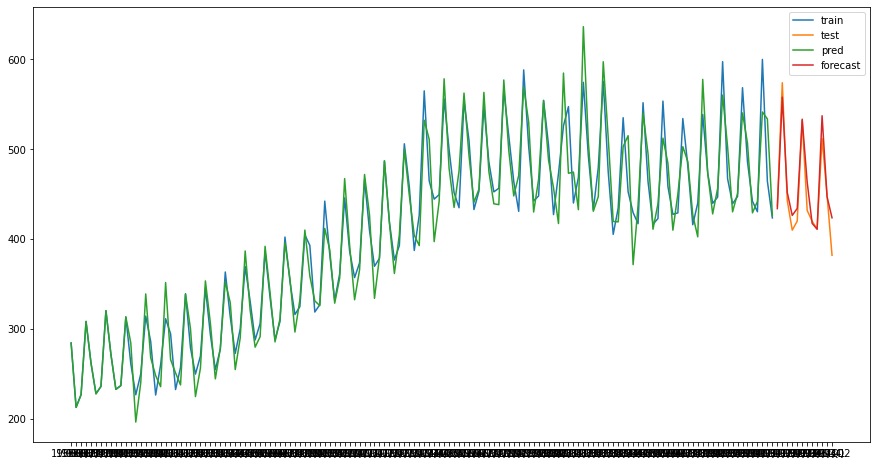

In [ ]:
fit1=ES(train_beer['Quarterly beer production in Australia: megalitres. March 1956 ? June 1994'],seasonal='mul',trend='mul',damped=True,seasonal_periods=12).fit(
    smoothing_level=best_param[0],
    smoothing_slope=best_param[1],
    smoothing_seasonal=best_param[2])
pred=fit1.fittedvalues
forecast=fit1.forecast(len(test_beer))

plt.figure(figsize=(15,8))
plt.plot(train_beer.index,train_beer.values,label='train')
plt.plot(test_beer.index,test_beer.values,label='test')
plt.plot(train_beer.index,pred,label='pred')
plt.plot(test_beer.index,forecast,label='forecast')
plt.legend(loc='best')
plt.show()